In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [2]:
from matplotlib import rcParams

# Set global font properties to Arial
rcParams.update(
    {
        "font.family": "sans-serif",
        "font.sans-serif": "Arial",
        # "font.sans-serif": "Liberation Sans",
        "pdf.fonttype": 42,  # Embed fonts as Type 3 fonts for compatibility
        "ps.fonttype": 42,
        "text.usetex": False,
        "svg.fonttype": "none",
    }
)

rcParams.update(
    {
        "font.size": 24,  # Set a default font size
        "legend.fontsize": 16,
        "legend.handlelength": 2,
        "axes.linewidth": 2,
    }
)

plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["axes.labelsize"] = 20


In [ ]:
d1 = "#BF1D2D"
d2 = "#262626"
d3 = "#293890"

e1 = "#2F2D54"
e2 = "#9193B4"
e3 = "#BD9AAD"
e4 = "#E8D2B3"

f1 = "#377eb8"
f2 = "#4daf4a"

g1 = "#b7bec8ff"
g2 = "#ff8080ff"
g3 = "#ff9999ff"
g4 = "#ffb3b3ff"

t1 = "#00a087ff"
t2 = "#9fc8c8ff"

# SV Evaluation


In [53]:
444197 + 7193

451390

In [7]:
# CNN for mk1c
# Data for stacked bar chart (TP/FP composition)
# Format: Set_Name, TP, FP, Total
# Set_A   7193    444197  451390
# Set_B   6586    293841  300427
# Set_C   6542    159109  165651

# Data for TP retention & decomposition chart
# Set A TP
# A_TP    7193
# Set C TP and retention
# C_TP    6542
# Retention_percentage    0.9095
# Set B TP decomposition
# B_TP_total      6586
# B_intersect_D   5837
# Overkill        749


# Hyena for mk1c

# Data for stacked bar chart (TP/FP composition)
# Format: Set_Name, TP, FP, Total
# Set_A   7193    444197  451390
# Set_B   6818    420891  427709
# Set_C   6269    32163   38432

# Data for TP retention & decomposition chart
# Set A TP
# A_TP    7193
# Set C TP and retention
# C_TP    6269
# Retention_percentage    0.8715
# Set B TP decomposition
# B_TP_total      6818
# B_intersect_D   5828
# Overkill        990

# hyena for p2

# Data for stacked bar chart (TP/FP composition)
# Format: Set_Name, TP, FP, Total
# Set_A   8815    3601099 3609914
# Set_B   8416    3503114 3511530
# Set_C   8067    297503  305570

# Data for TP retention & decomposition chart
# Set A TP
# A_TP    8815
# Set C TP and retention
# C_TP    8067
# Retention_percentage    0.9151
# Set B TP decomposition
# B_TP_total      8416
# B_intersect_D   7337
# Overkill        1079


In [4]:
def draw_stacked_bar_chart(
    data,
    group_name,
    file_name=None,
    group1_color=g2,
    group2_color=g1,
    reduction_percentage_y_shift=10000,
):
    # Extracting data for plotting
    sets = list(data.keys())

    group1_name = group_name[0]
    group2_name = group_name[1]

    bulk_values = [data[set_name][group1_name] for set_name in sets]
    no_support_values = [data[set_name][group2_name] for set_name in sets]

    # Define colors for Bulk and No support
    bulk_color = group1_color
    no_support_color = group2_color

    # Plotting the stacked bar chart
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(sets, bulk_values, label=group1_name, color=bulk_color)
    ax.bar(
        sets,
        no_support_values,
        bottom=bulk_values,
        label=group2_name,
        color=no_support_color,
    )

    # Adding total number on the top of each bar
    for i, set_name in enumerate(sets):
        total_value = bulk_values[i] + no_support_values[i]
        ax.text(
            i,
            total_value + 5000,
            f"{total_value}",
            ha="center",
            va="bottom",
            fontsize=10,
        )

        # Calculate and display the total number reduction percentage for ChimeraLM compared to MDA
        if set_name == "ChimeraLM Dataset":
            mda_total = (
                bulk_values[sets.index("MDA Dataset")]
                + no_support_values[sets.index("MDA Dataset")]
            )
            reduction_percentage = ((mda_total - total_value) / mda_total) * 100
            ax.text(
                i,
                total_value + reduction_percentage_y_shift,
                f"Reduction: {reduction_percentage:.2f}%",
                ha="center",
                va="bottom",
                fontsize=10,
                color="red",
            )

    # Adding labels and title
    ax.set_ylabel("Count (1000 X)", fontsize=16)

    # Adjust y-tick labels to be in thousands
    y_ticks = ax.get_yticks()
    ax.set_yticklabels([f"{int(tick / 1000)}" for tick in y_ticks])

    ax.legend()

    # Improve layout
    sns.despine(offset=10, trim=True)
    plt.tight_layout()

    if file_name is not None:
        plt.savefig(file_name, dpi=300)


def draw_support_bar_chart(
    data, group_name, file_name=None, group1_color=g2, group2_color=g1
):
    # Extracting data for plotting
    sets = list(data.keys())

    group1_name = group_name[0]
    group2_name = group_name[1]

    supported_values = [data[set_name][group1_name] for set_name in sets]

    # Define colors for supported
    supported_color = group1_color

    # Plot bar chart for only supported
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(sets, supported_values, label=group1_name, color=supported_color)

    # Calculate and display the percentage of ChimeraLM support relative to MDA support
    mda_support = data["MDA Dataset"][group1_name]
    chimera_support = data["ChimeraLM Dataset"][group1_name]
    percentage_support = (chimera_support / mda_support) * 100

    # Adding percentage text on the plot
    ax.text(
        1,
        chimera_support + 500,
        f"Retention: {percentage_support:.2f}%",
        ha="center",
        va="bottom",
        fontsize=10,
        color="red",
    )

    ax.set_ylabel("Count", fontsize=16)

    sns.despine(offset=10, trim=True)
    plt.tight_layout()

    if file_name is not None:
        plt.savefig(file_name, dpi=300)

In [ ]:
def draw_group_bar_chart(
    data,
    group_name,
    file_name=None,
    group1_color=g2,
    group2_color=g1,
    reduction_percentage_y_shift=10000,
    log_scale=False,
    figsize=(8, 6),
):
    # Extracting data for plotting
    sets = list(data.keys())

    group1_name = group_name[0]
    group2_name = group_name[1]

    bulk_values = [data[set_name][group1_name] for set_name in sets]
    no_support_values = [data[set_name][group2_name] for set_name in sets]

    # Define colors for Bulk and No support
    bulk_color = group1_color
    no_support_color = group2_color

    # Plotting the grouped bar chart
    fig, ax = plt.subplots(figsize=figsize)
    bar_width = 0.35
    index = range(len(sets))

    ax.bar(index, bulk_values, bar_width, label=group1_name, color=bulk_color)
    ax.bar(
        [i + bar_width for i in index],
        no_support_values,
        bar_width,
        label=group2_name,
        color=no_support_color,
    )

    # Adding total number on the top of each group
    for i, set_name in enumerate(sets):
        ax.text(
            i,
            bulk_values[i] + 5000,
            f"{bulk_values[i]}",
            ha="center",
            va="bottom",
            fontsize=10,
        )
        ax.text(
            i + bar_width,
            no_support_values[i] + 5000,
            f"{no_support_values[i]}",
            ha="center",
            va="bottom",
            fontsize=10,
        )

        # Calculate and display the total number reduction percentage for ChimeraLM compared to MDA
        if set_name == "ChimeraLM Dataset":
            mda_total = (
                bulk_values[sets.index("MDA Dataset")]
                + no_support_values[sets.index("MDA Dataset")]
            )
            total_value = bulk_values[i] + no_support_values[i]
            reduction_percentage = ((mda_total - total_value) / mda_total) * 100
            ax.text(
                i + bar_width / 2,
                max(bulk_values[i], no_support_values[i])
                + reduction_percentage_y_shift,
                f"Reduction: {reduction_percentage:.2f}%",
                ha="center",
                va="bottom",
                fontsize=10,
                color="red",
            )

    if not log_scale:
        # Adding labels and title
        ax.set_ylabel("Count (1000 X)", fontsize=16)
        ax.set_xticks([i + bar_width / 2 for i in index])
        ax.set_xticklabels(sets)
        # Adjust y-tick labels to be in thousands
        y_ticks = ax.get_yticks()
        ax.set_yticklabels([f"{int(tick / 1000)}" for tick in y_ticks])
        sns.despine(offset=10, trim=True)
    else:
        ax.set_yscale("log")
        ax.set_ylabel("Count (log10)", fontsize=16)
        ax.set_xticks([i + bar_width / 2 for i in index])
        ax.set_xticklabels(sets)
        sns.despine()

    ax.legend()
    plt.tight_layout()

    if file_name is not None:
        plt.savefig(file_name, dpi=300)

In [ ]:
def draw_group_bar_with_two_scale(
    data,
    group_name,
    file_name=None,
    set_names=None,
    group1_color=t1,
    group2_color=t2,
    bar_width=0.5,
    bar_label_y_shift=0.1,
    bar_label_font_size=13,
    figsize=(12, 8),
):
    """Generate a grouped bar chart with two independent scales.

    the supported bar is on the bottom (or x axis with negative y value)
    the unsupported bar is on the top (or x axis with positive y value)
    Each uses its own scale so smaller values are visually prominent.
    """
    # Extracting data for plotting
    sets = list(data.keys())

    group1_name = group_name[0]
    group2_name = group_name[1]

    # Get values for each group
    supported_values = [data[set_name][group1_name] for set_name in sets]
    unsupported_values = [data[set_name][group2_name] for set_name in sets]

    # Define colors
    supported_color = group1_color
    unsupported_color = group2_color

    # Normalize values to 0-1 range for each scale independently
    max_supported = max(supported_values)
    max_unsupported = max(unsupported_values)

    # Scale to make bars visually balanced (both go to ±1)
    supported_scaled = [v / max_supported for v in supported_values]
    unsupported_scaled = [v / max_unsupported for v in unsupported_values]

    # Create the diverging bar chart
    fig, ax = plt.subplots(figsize=figsize)
    index = range(len(sets))

    # Plot unsupported bars (positive values, above x-axis) - scaled
    bars_unsupported = ax.bar(
        index,
        unsupported_scaled,
        bar_width,
        label=group2_name,
        color=unsupported_color,
        edgecolor="k",
        linewidth=2,
        alpha=0.9,
    )

    # Plot supported bars (negative values, below x-axis) - scaled
    bars_supported = ax.bar(
        index,
        [-v for v in supported_scaled],  # Make negative for bottom
        bar_width,
        label=group1_name,
        color=supported_color,
        edgecolor="k",
        linewidth=2,
        alpha=0.9,
    )

    # Add value labels on bars with actual values
    for i, set_name in enumerate(sets):
        # Label for unsupported (top) - show actual value
        ax.text(
            i,
            unsupported_scaled[i] + bar_label_y_shift,
            f"{unsupported_values[i]:,}",
            ha="center",
            va="center",
            fontsize=bar_label_font_size,
            color="black",
        )

        # Label for supported (bottom) - show actual value
        ax.text(
            i,
            -supported_scaled[i] / 2,
            f"{supported_values[i]:,}",
            ha="center",
            va="center",
            fontsize=bar_label_font_size,
            color="black",
        )

    ax.axhline(0, color="#333333", linewidth=2.5, linestyle="-", zorder=3)

    # Create custom y-tick labels showing the two scales
    # Helper function to generate nice round numbers for tick labels
    def get_nice_ticks(max_value):
        """Generate nice round tick labels (like 100, 200, 500, 1000, 2000, etc.)"""
        max_k = max_value / 1000  # Convert to thousands
        # Determine the order of magnitude
        magnitude = 10 ** np.floor(np.log10(max_k))
        print(magnitude)
        # Try nice multipliers
        for multiplier in [1, 2, 5]:
            interval = magnitude * multiplier
            num_ticks = int(np.ceil(max_k / interval))
            if 2 <= num_ticks <= 5:
                labels = [int(interval * i) for i in range(0, num_ticks + 1)]
                ticks = [v * 1000 / max_value for v in labels]
                return ticks, labels

        # Fallback: use 3 equal intervals
        interval = magnitude
        labels = [int(interval * i) for i in range(0, 5)]
        ticks = [v * 1000 / max_value for v in labels]
        return ticks, labels

    # Top scale (unsupported) - use nice round numbers
    top_ticks, top_label_values = get_nice_ticks(max_unsupported)
    top_labels = [f"{v}" for v in top_label_values]

    # Bottom scale (supported) - use nice round numbers
    print(max_supported)
    bottom_ticks_pos, bottom_label_values = get_nice_ticks(max_supported)
    print(bottom_ticks_pos, bottom_label_values)
    bottom_ticks = [-t for t in bottom_ticks_pos]  # Make negative for bottom scale
    bottom_labels = [f"{v}" for v in bottom_label_values]

    # Combine ticks and labels
    all_ticks = bottom_ticks + [0] + top_ticks
    all_labels = bottom_labels + ["0"] + top_labels

    ax.set_yticks(all_ticks)
    ax.set_yticklabels(all_labels, fontsize=14)
    # Set labels
    ax.set_ylabel("Count (X 1000)", fontsize=16)
    ax.set_xticks(index)
    ax.set_xticklabels(sets if set_names is None else set_names, fontsize=14)

    # Add subtle grid for readability
    ax.grid(axis="y", alpha=0.2, linestyle="--", linewidth=0.8, zorder=0)

    # Clean up the plot
    sns.despine(left=False, bottom=False)
    plt.tight_layout()

    # Save figure if filename provided
    if file_name is not None:
        plt.savefig(file_name, dpi=300, bbox_inches="tight")

In [6]:
cnn_mk1c_data = {
    "MDA Dataset": {"Supported": 7193, "Unsupported": 444197},
    "ChimeraLM Dataset": {"Supported": 6542, "Unsupported": 159109},
}

hyena_mk1c_data = {
    "MDA Dataset": {"Supported": 7193, "Unsupported": 444197},
    "ChimeraLM Dataset": {"Supported": 6269, "Unsupported": 32163},
}

hyena_p2_data = {
    "MDA Dataset": {"Supported": 8815, "Unsupported": 3601099},
    "ChimeraLM Dataset": {"Supported": 8067, "Unsupported": 297503},
}

# The SV number in bulk mk1c is 25864, SV number in MDA mk1c is 451390.
# The SV number in bulk P2 is 109863, SV number in MDA P2 is 3609914.

# Model   Dataset Bulk_SVs        MDA_SVs       AfterLLM_SVs    Bulk_MDA_Intersection Bulk_AfterLLM_Intersection
# Hyena_P2_765108 Mk1c    25864   451390  38432   5647    4917
# Hyena_P2_765108 P2      109863  3609914 305570  13792   9914

compared_with_bulk_hyena_mk1c_data = {
    "MDA Dataset": {"Supported": 5647, "Unsupported": 451390 - 5647},
    "ChimeraLM Dataset": {"Supported": 4917, "Unsupported": 38432 - 4917},
}

compared_with_bulk_hyena_p2_data = {
    "MDA Dataset": {"Supported": 13792, "Unsupported": 3609914 - 13792},
    "ChimeraLM Dataset": {"Supported": 9914, "Unsupported": 305570 - 9914},
}


def print_supported_rate(data):
    supported_rates = {}
    for key, value in data.items():
        supported_rate = value["Supported"] / (
            value["Supported"] + value["Unsupported"]
        )
        supported_rates[key] = supported_rate
        print(f"{key}: {supported_rate:.2%}")

    print(
        f"Increased by {supported_rates['ChimeraLM Dataset'] / supported_rates['MDA Dataset']:.2f} fold\n"
    )


print_supported_rate(hyena_mk1c_data)
print_supported_rate(hyena_p2_data)
print_supported_rate(compared_with_bulk_hyena_mk1c_data)
print_supported_rate(compared_with_bulk_hyena_p2_data)

MDA Dataset: 1.59%
ChimeraLM Dataset: 16.31%
Increased by 10.24 fold

MDA Dataset: 0.24%
ChimeraLM Dataset: 2.64%
Increased by 10.81 fold

MDA Dataset: 1.25%
ChimeraLM Dataset: 12.79%
Increased by 10.23 fold

MDA Dataset: 0.38%
ChimeraLM Dataset: 3.24%
Increased by 8.49 fold



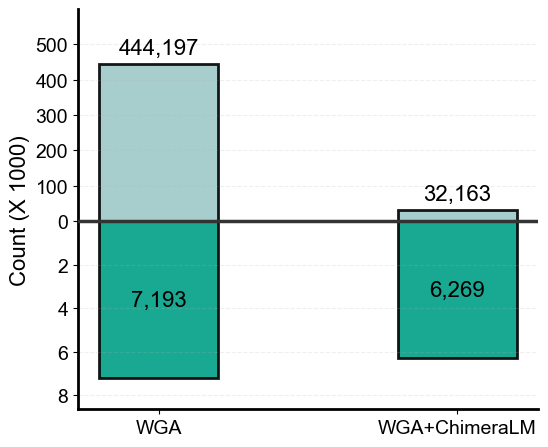

In [48]:
draw_group_bar_with_two_scale(
    hyena_mk1c_data,
    ["Supported", "Unsupported"],
    set_names=["WGA", "WGA+ChimeraLM"],
    figsize=(6, 5),
    bar_width=0.4,
    bar_label_font_size=16,
    file_name="hyena_mk1c_group_bar_two_scale.pdf",
)

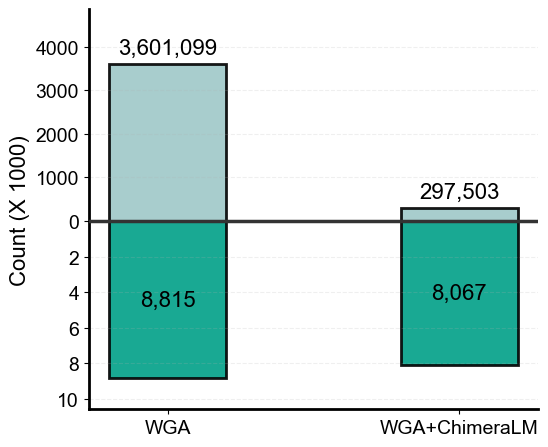

In [49]:
draw_group_bar_with_two_scale(
    hyena_p2_data,
    ["Supported", "Unsupported"],
    set_names=["WGA", "WGA+ChimeraLM"],
    figsize=(6, 5),
    bar_width=0.4,
    bar_label_font_size=16,
    file_name="hyena_p2_group_bar_two_scale.pdf",
)

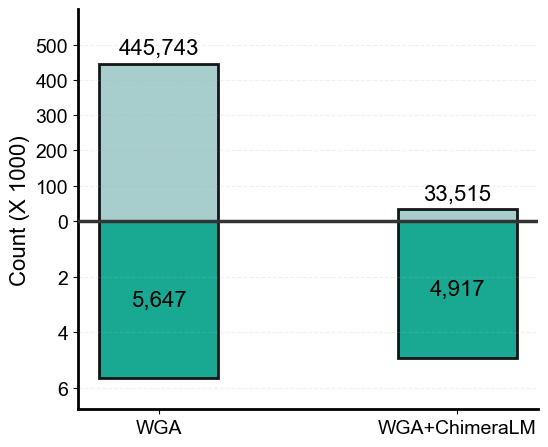

In [58]:
draw_group_bar_with_two_scale(
    compared_with_bulk_hyena_mk1c_data,
    ["Supported", "Unsupported"],
    set_names=["WGA", "WGA+ChimeraLM"],
    figsize=(6, 5),
    bar_width=0.4,
    bar_label_font_size=16,
    file_name="compared_with_bulk_hyena_mk1c_group_bar_two_scale.pdf",
)

1000.0
13792
10.0
[0.0, 0.7250580046403712, 1.4501160092807424] [0, 10, 20]


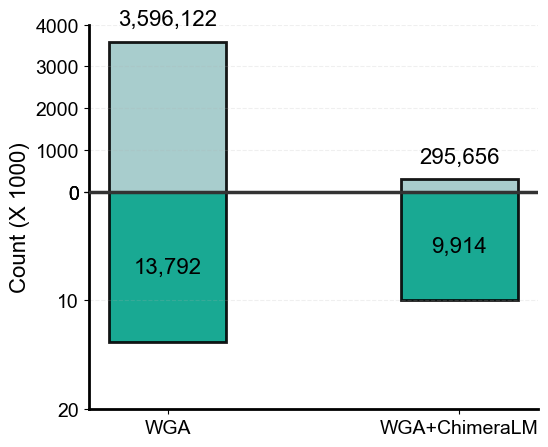

In [19]:
draw_group_bar_with_two_scale(
    compared_with_bulk_hyena_p2_data,
    ["Supported", "Unsupported"],
    set_names=["WGA", "WGA+ChimeraLM"],
    figsize=(6, 5),
    bar_width=0.4,
    bar_label_y_shift=0.15,
    bar_label_font_size=16,
    file_name="compared_with_bul_hyena_p2_group_bar_chart_two_scale.pdf",
)

/tmp/ipykernel_45032/1407858057.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{int(tick/1000)}" for tick in y_ticks])


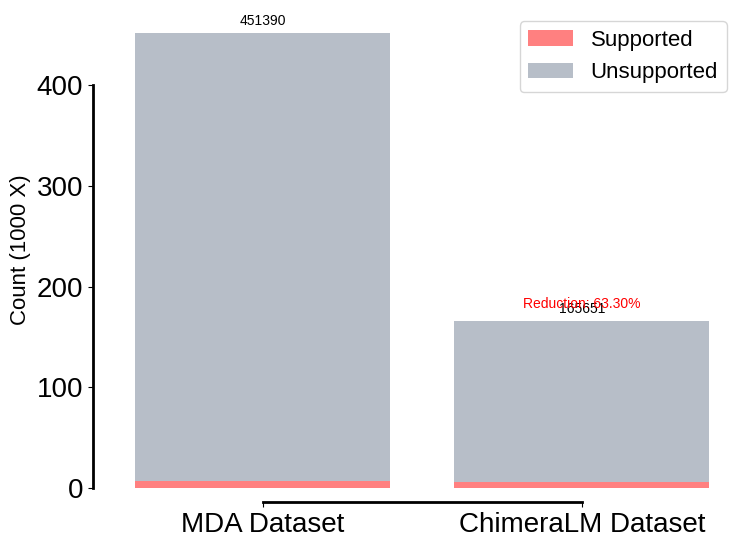

In [16]:
# Data for stacked bar chart (Bulk/No support composition)
draw_stacked_bar_chart(cnn_mk1c_data, ["Supported", "Unsupported"], "cnn_mk1c.pdf")

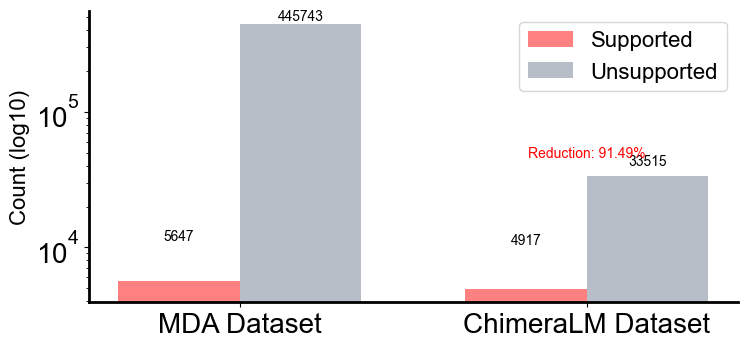

In [ ]:
draw_group_bar_chart(
    compared_with_bul_hyena_mk1c_data,
    ["Supported", "Unsupported"],
    log_scale=True,
    file_name="compared_with_bul_hyena_mk1c_group_bar_chart.pdf",
    figsize=(8, 4),
)

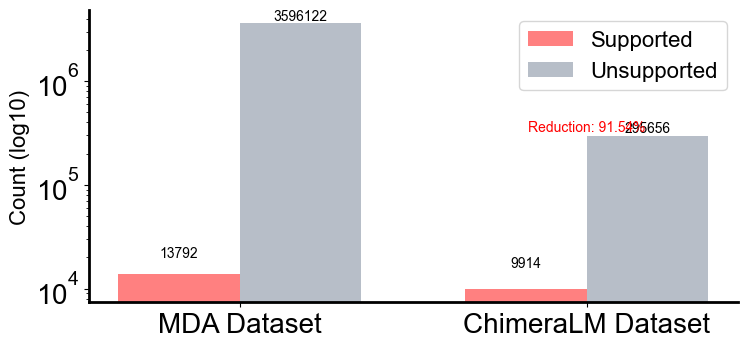

In [11]:
draw_group_bar_chart(
    compared_with_bul_hyena_p2_data,
    ["Supported", "Unsupported"],
    log_scale=True,
    file_name="compared_with_bul_hyena_p2_group_bar_chart.pdf",
    figsize=(8, 4),
)

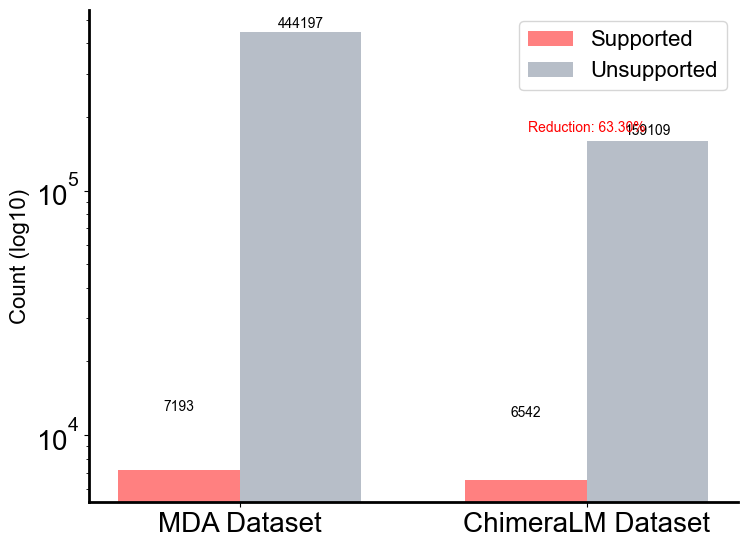

In [101]:
draw_group_bar_chart(
    cnn_mk1c_data,
    ["Supported", "Unsupported"],
    log_scale=True,
    file_name="cnn_mk1c_group_bar_chart.pdf",
)

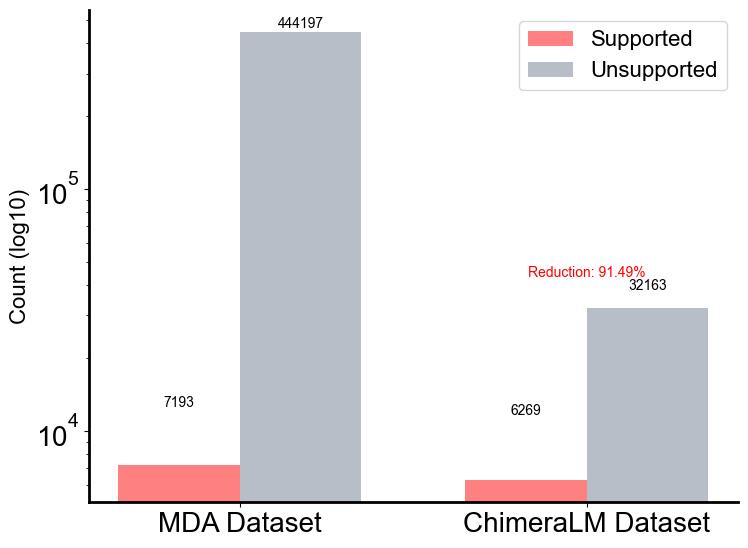

In [ ]:
draw_group_bar_chart(
    hyena_mk1c_data,
    ["Supported", "Unsupported"],
    log_scale=True,
    file_name="hyena_mk1c_group_bar_chart.pdf",
)

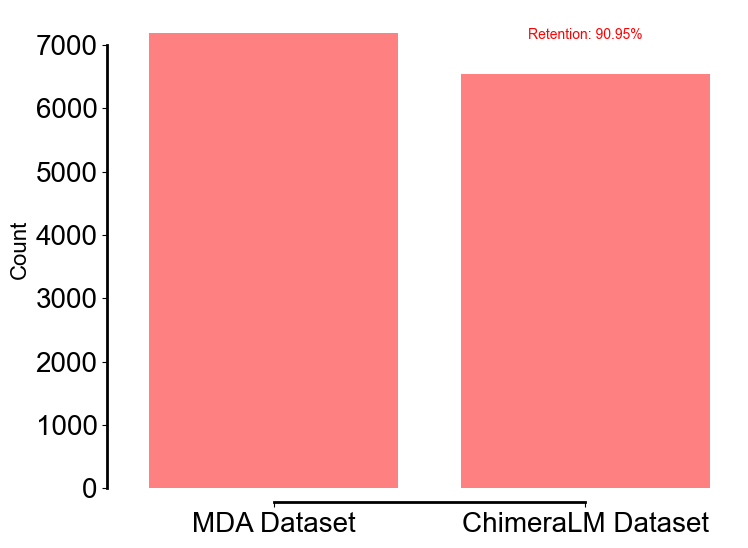

In [ ]:
draw_support_bar_chart(
    cnn_mk1c_data, ["Supported", "Unsupported"], "cnn_mk1c_support.pdf"
)

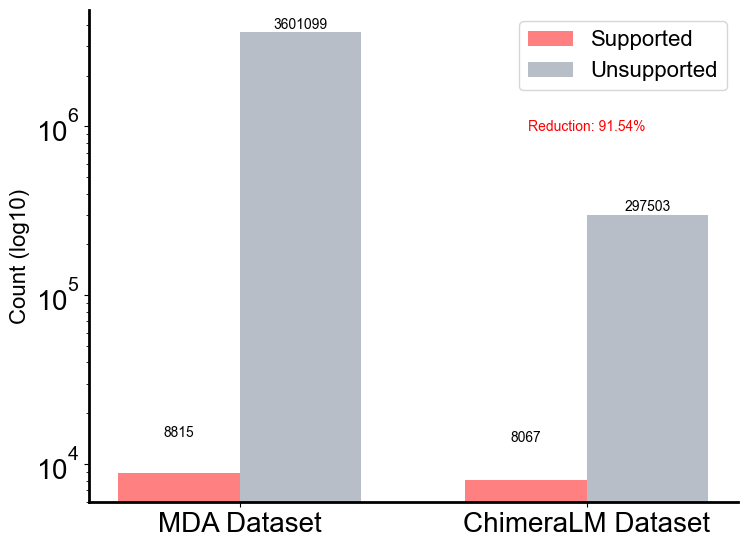

In [102]:
draw_group_bar_chart(
    hyena_p2_data,
    ["Supported", "Unsupported"],
    reduction_percentage_y_shift=600000,
    log_scale=True,
    file_name="hyena_p2_group_bar_chart.pdf",
)

/var/folders/s3/vs6nrrg52sdfjk3z90p7ndt94gg4tq/T/ipykernel_83800/1407858057.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{int(tick/1000)}" for tick in y_ticks])


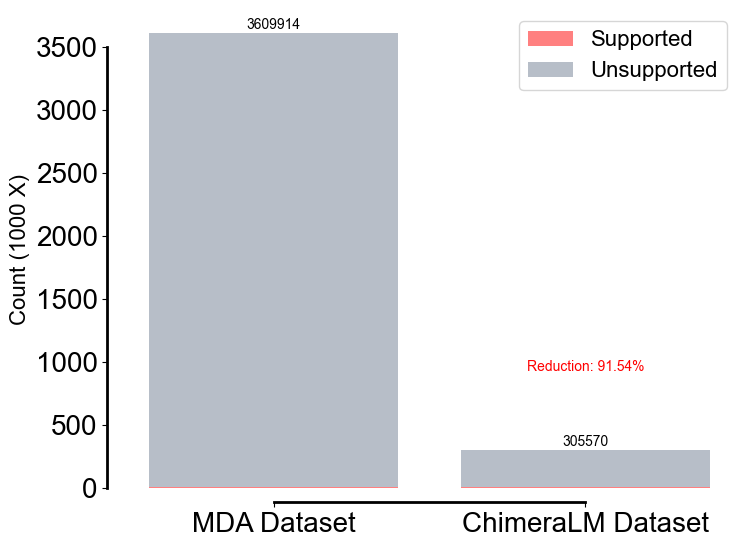

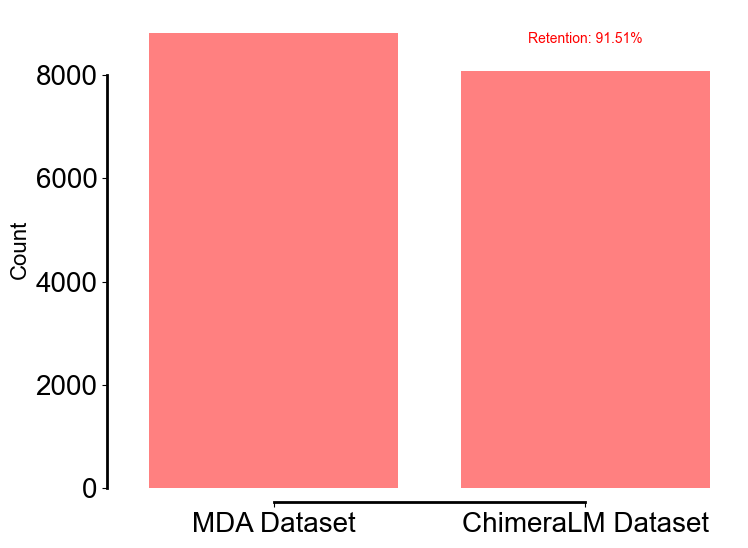

In [ ]:
draw_stacked_bar_chart(
    hyena_p2_data,
    ["Supported", "Unsupported"],
    "hyena_p2.pdf",
    reduction_percentage_y_shift=600000,
)
draw_support_bar_chart(
    hyena_p2_data, ["Supported", "Unsupported"], "hyena_p2_support.pdf"
)

# Chimeric Reads




| Sample | No. chimeric reads  | No. total reads | ratio |
|---|---|---|---|
| P2 MDA | 12963576 | 28027667  | 0.46 |  
| P2 Bulk |  233740  | 10065403  | 0.023  | 
| mk1c MDA | 1666427 |7193945  | 0.23 | 
| mk1c Bulk | 28748 |1140363  | 0.025  | 




| Sample | No. chimeric reads  | No. total reads | ratio |
|---|---|---|---|
| P2 MDA | 12963576 | 28027667  | 0.46 |  
| P2 Bulk |  233740  | 10065403  | 0.023  | 
| P2 ChimeraLM |  769743  | 15833834  | 0.0486  | 
| mk1c MDA | 1666427 |7193945  | 0.23 | 
| mk1c Bulk | 28748 |1140363  | 0.025  |
| mk1c ChimeraLM | 82734 |5610252  | 0.0147  |



mk1c prediction: {1: 1583693, 0: 82734}
p2 prediction: {1: 12193833, 0: 769743}

In [20]:
(12963576 - 769743) / 12963576
(1666427 - 82734) / 1666427

0.9503524606838464

<Figure size 1500x600 with 0 Axes>

<BarContainer object of 6 artists>

<BarContainer object of 6 artists>

Text(0, 0.5, 'No. of Reads')

Text(0, 29429050.35, 'Percentage: 46.0%')

Text(1, 10568673.15, 'Percentage: 2.3%')

Text(2, 16625525.7, 'Percentage: 4.9%')

Text(3, 7553642.25, 'Percentage: 23.0%')

Text(4, 1197381.15, 'Percentage: 2.5%')

Text(5, 5890764.6, 'Percentage: 1.5%')

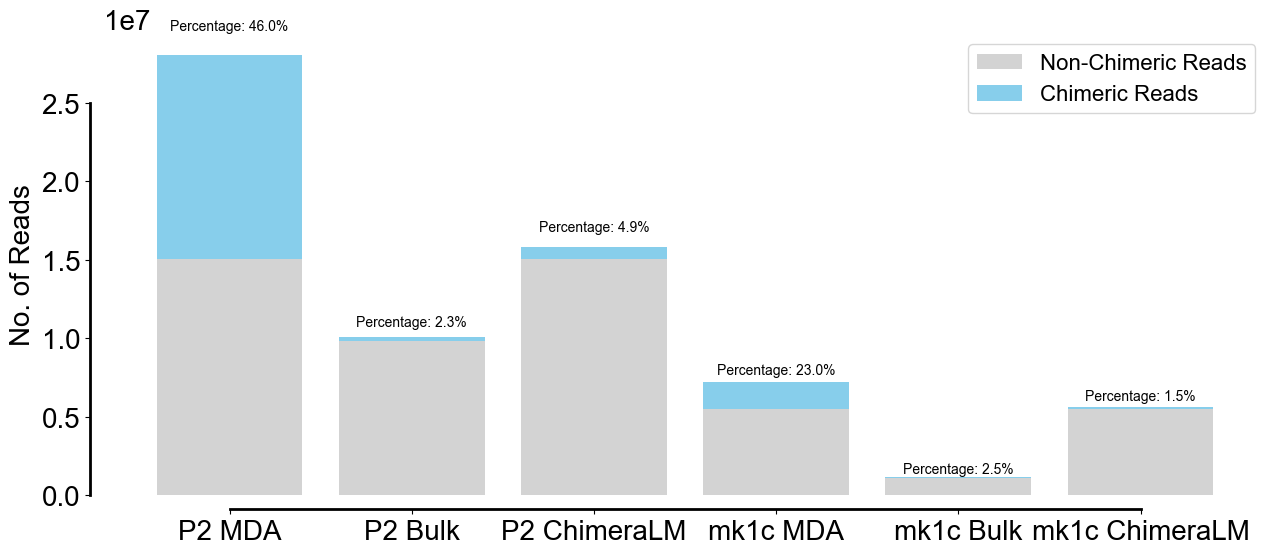

In [ ]:
# Define the new data
samples_new = [
    "P2 MDA",
    "P2 Bulk",
    "P2 ChimeraLM",
    "mk1c MDA",
    "mk1c Bulk",
    "mk1c ChimeraLM",
]
chimeric_reads_new = [12963576, 233740, 769743, 1666427, 28748, 82734]
total_reads_new = [28027667, 10065403, 15833834, 7193945, 1140363, 5610252]
ratios_new = [0.46, 0.023, 0.0486, 0.23, 0.025, 0.0147]

# Create a stacked bar chart for the new data
plt.figure(figsize=(15, 6))
ax_new = plt.gca()

# Plot the non-chimeric reads at the bottom
non_chimeric_reads_new = [
    total - chimeric for total, chimeric in zip(total_reads_new, chimeric_reads_new)
]
ax_new.bar(
    samples_new,
    non_chimeric_reads_new,
    label="Non-Chimeric Reads",
    color="lightgrey",
)

# Plot the chimeric reads on top
ax_new.bar(
    samples_new,
    chimeric_reads_new,
    bottom=non_chimeric_reads_new,
    label="Chimeric Reads",
    color="skyblue",
)

# Add labels and title
plt.ylabel("No. of Reads")
ax_new.legend()

# Annotate the bars with the chimeric ratio
for i, ratio in enumerate(ratios_new):
    percentage = ratio * 100
    ax_new.text(
        i,
        total_reads_new[i] + 0.05 * total_reads_new[i],
        f"Percentage: {percentage:.1f}%",
        ha="center",
        va="bottom",
        fontsize=10,
    )

sns.despine(offset=10, trim=True)

plt.savefig("chimeric_reads_stacked_bar_chart_with_chimera_lm.pdf", dpi=300)

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

Text(0, 0.5, 'No. of Reads')

Text(0, 29429050.35, 'Percentage: 46.0%')

Text(1, 10568673.15, 'Percentage: 2.3%')

Text(2, 7553642.25, 'Percentage: 23.0%')

Text(3, 1197381.15, 'Percentage: 2.5%')

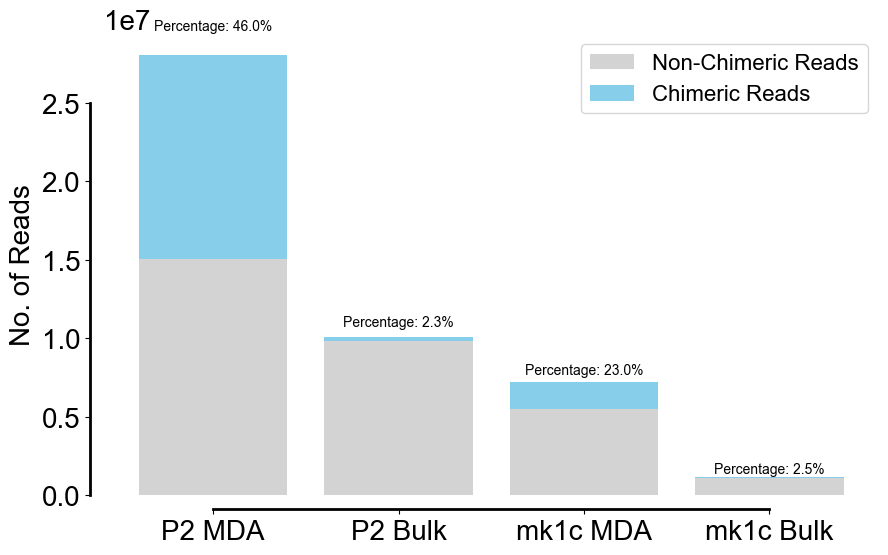

In [ ]:
samples = ["P2 MDA", "P2 Bulk", "mk1c MDA", "mk1c Bulk"]
chimeric_reads = [12963576, 233740, 1666427, 28748]
total_reads = [28027667, 10065403, 7193945, 1140363]
ratios = [0.46, 0.023, 0.23, 0.025]

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plot the non-chimeric reads at the bottom
non_chimeric_reads = [
    total - chimeric for total, chimeric in zip(total_reads, chimeric_reads)
]
ax.bar(
    samples,
    non_chimeric_reads,
    label="Non-Chimeric Reads",
    color="lightgrey",
)

# Plot the chimeric reads on top
ax.bar(
    samples,
    chimeric_reads,
    bottom=non_chimeric_reads,
    label="Chimeric Reads",
    color="skyblue",
)

# Add labels and title
plt.ylabel("No. of Reads")
ax.legend()

# Annotate the bars with the chimeric ratio
for i, ratio in enumerate(ratios):
    percentage = ratio * 100
    ax.text(
        i,
        total_reads[i] + 0.05 * total_reads[i],
        f"Percentage: {percentage:.1f}%",
        ha="center",
        va="bottom",
        fontsize=10,
    )

sns.despine(offset=10, trim=True)
plt.savefig("chimeric_reads_stacked_bar_chart.png", dpi=300)

<Figure size 800x600 with 0 Axes>

Text(0, 0.5, 'No. chimeric reads')

[Text(0, 0, '12670396.00'),
 Text(0, 0, '190309.00'),
 Text(0, 0, '101094.00'),
 Text(0, 0, '1777.00')]

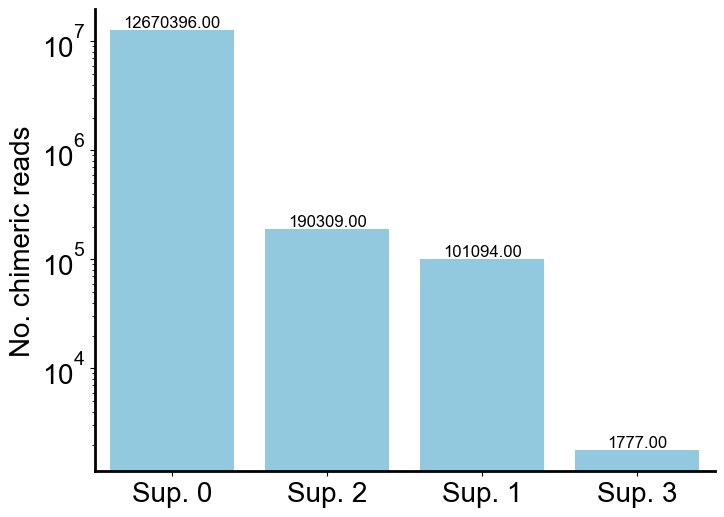

In [ ]:
# Data for the bar chart
samples = ["Sup. 0", "Sup. 2", "Sup. 1", "Sup. 3"]
values = [12670396, 190309, 101094, 1777]

# Create a bar chart
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=samples, y=values, color="skyblue")

# Add labels and title
plt.ylabel("No. chimeric reads")
ax.bar_label(ax.containers[0], fmt="%.2f", fontsize=12)
plt.yscale("log")
sns.despine()

plt.savefig("p2_sup_by_bulk_chimeric_reads.pdf", dpi=300)

<Figure size 800x600 with 0 Axes>

/var/folders/s3/vs6nrrg52sdfjk3z90p7ndt94gg4tq/T/ipykernel_83800/414810031.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=metrics, y=values, palette='muted')


Text(0, 0.8545590519905091, '0.805')

Text(1, 0.7497780203819275, '0.700')

Text(2, 0.9962446570396425, '0.946')

Text(0, 0.5, 'Values')

(0.0, 1.0)

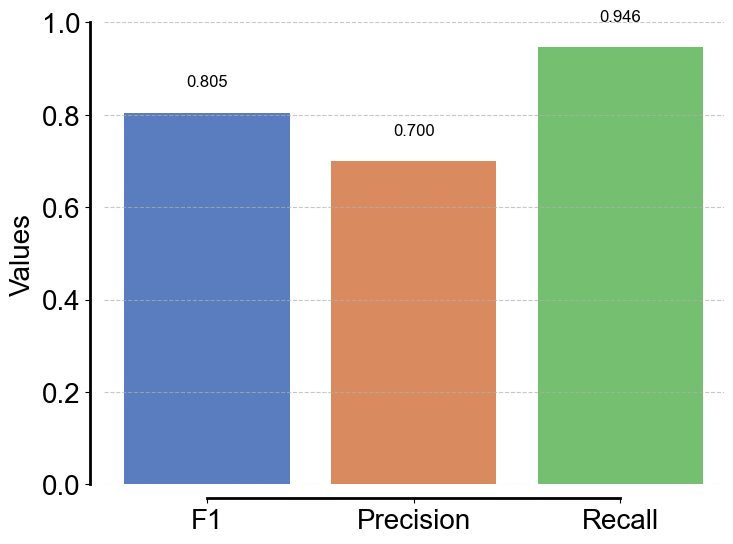

In [ ]:
# Data for the bar plot
metrics = ["F1", "Precision", "Recall"]
values = [0.804559051990509, 0.6997780203819275, 0.9462446570396424]

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=metrics, y=values, palette="muted")

# Annotate the bars with the values
for i, value in enumerate(values):
    ax.text(i, value + 0.05, f"{value:.3f}", ha="center", va="bottom", fontsize=12)

# Add labels and title
plt.ylabel("Values")
plt.ylim(0, 1)  # Set y-axis limits for better comparison
plt.grid(axis="y", linestyle="--", alpha=0.7)
sns.despine(offset=10, trim=True)

plt.savefig("performance_metrics_bar_plot.pdf", dpi=300)

# Read length and Number of chimeric alignments



In [ ]:
import numpy as np

read_length_data = {
    "P2 MDA": "./data/prediction_and_chimeric/PC3_10_cells_MDA_P2_dirty.npz",
    "P2 Bulk": "./data/prediction_and_chimeric/PC3_bulk_WGS_P2_clean_read_lengths.npz",
    "mk1c MDA": "./data/prediction_and_chimeric/PC3_10_cells_MDA_Mk1c_dirty.chimeric.npz",
    "mk1c Bulk": "./data/prediction_and_chimeric/PC3_bulk_WGS_mk1c_clean_read_lengths.npz",
}


def load_npz_data(npz_file_path):
    results = {}
    for key, value in npz_file_path.items():
        data = np.load(value)
        results[key] = data["read_lengths"]
    return results


def plot_read_length_distribution_from_npz(
    read_length_data,
    figsize=(12, 8),
    figure_name=None,
    max_y_value=None,
    max_x_value=None,
    plot_type="boxen",
):
    """
    Plot the distribution of values from multiple numpy arrays stored in npz files.

    Parameters:
    read_length_data (dict): Dictionary where keys are dataset names and values are paths to the npz files.
    """
    plt.figure(figsize=figsize)
    # Create a box plot for all datasets
    if plot_type == "boxen":
        sns.boxenplot(data=read_length_data)
    elif plot_type == "box":
        sns.boxplot(data=read_length_data)
    elif plot_type == "kde":
        sns.kdeplot(data=read_length_data, fill=True)
    elif plot_type == "violin":
        sns.violinplot(data=read_length_data)
    elif plot_type == "hist":
        sns.histplot(data=read_length_data)

    plt.xlabel("Datasets")
    plt.ylabel("Read Length")

    # set max y value
    if max_y_value is not None:
        plt.ylim(0, max_y_value)

    if max_x_value is not None:
        plt.xlim(0, max_x_value)

    sns.despine(offset=10, trim=True)

    if figure_name is not None:
        plt.savefig(figure_name, dpi=300)


In [5]:
read_length_array = load_npz_data(read_length_data)

In [6]:
read_length_array

{'P2 MDA': array([ 584,  517,  646, ..., 1304, 6372,  739], shape=(12963576,)),
 'P2 Bulk': array([ 2111, 62071, 23792, ..., 46520,  2255,  1049], shape=(233740,)),
 'mk1c MDA': array([3895, 3139, 5973, ...,  854, 1228,  857], shape=(1666427,)),
 'mk1c Bulk': array([30988, 29496,  6327, ...,  8509, 72181, 14390], shape=(28748,))}

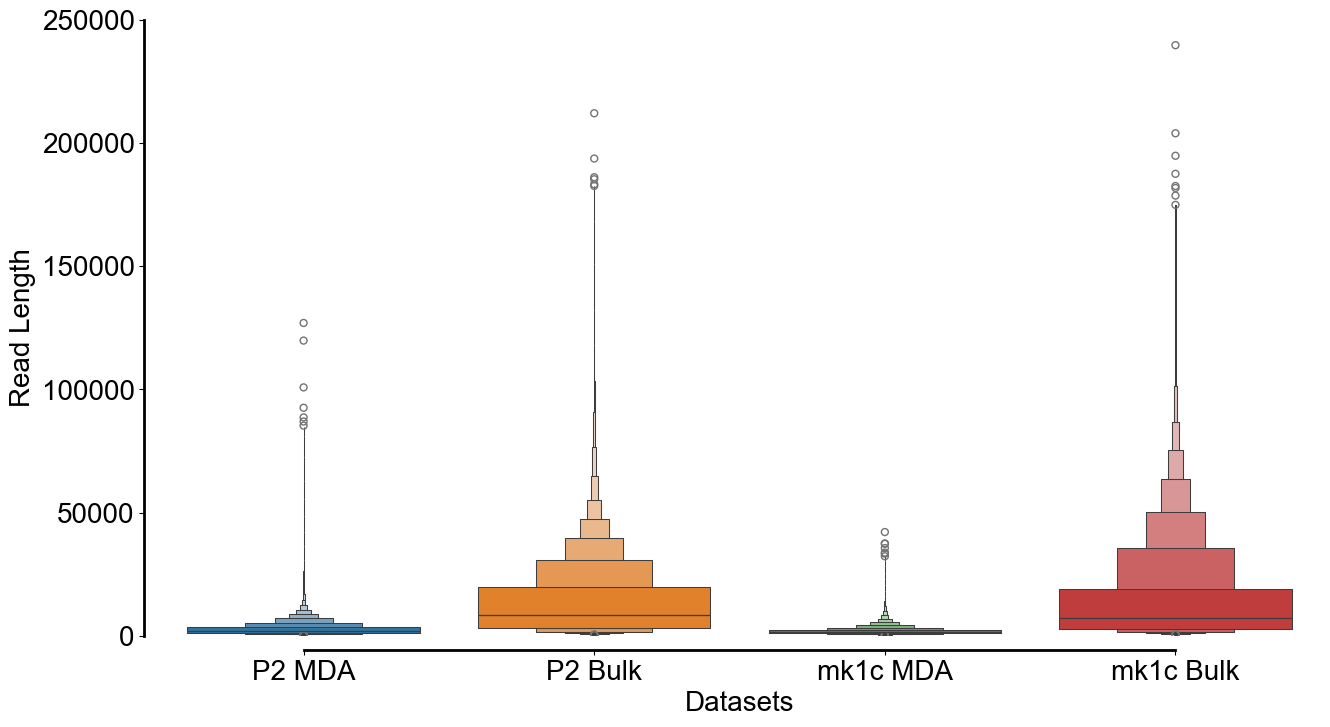

In [ ]:
plot_read_length_distribution_from_npz(
    read_length_array,
    figsize=(15, 8),
    figure_name="chimeric_read_length_distribution.pdf",
    max_y_value=250000,
)

In [ ]:
def load_number_of_chimeric_alignments_from_file(file_path):
    results = []
    with open(file_path, "r") as file:
        for line in file:
            content = line.strip().split()
            num_chimeric_alignments = int(content[1])
            results.append(num_chimeric_alignments)
    return np.array(results)


num_chimeric_alignment_files = {
    "P2 MDA": "./data/prediction_and_chimeric/PC3_10_cells_MDA_P2_dirty.chimeric_events.txt",
    "P2 Bulk": "./data/prediction_and_chimeric/PC3_bulk_WGS_P2_clean.chimeric_events.txt",
    "mk1c MDA": "./data/prediction_and_chimeric/PC3_10_cells_MDA_Mk1c_dirty.chimeric_events.txt",
    "mk1c Bulk": "./data/prediction_and_chimeric/PC3_bulk_WGS_mk1c_clean.chimeric_events.txt",
}


def draw_number_of_chimeric_alignments_distribution(
    num_chimeric_alignment_files: dict[str, list[int]],
    figsize=(12, 8),
    figure_name=None,
):
    plt.figure(figsize=figsize)

    sns.kdeplot(num_chimeric_alignment_files, fill=True)
    plt.legend(title="Datasets")

    plt.xlabel("Datasets")
    plt.ylabel("Number of Chimeric Alignments")
    plt.title("Number of Chimeric Alignments Distribution")

    if figure_name is not None:
        plt.savefig(figure_name, dpi=300)


In [ ]:
dd = np.load(
    "./data/prediction_and_chimeric/PC3_10_cells_MDA_Mk1c_dirty_chimeric_read_lengths_min_mapq_10.npz"
)

In [13]:
num_chimeric_alignment_files


{'P2 MDA': './data/prediction_and_chimeric/PC3_10_cells_MDA_P2_dirty.chimeric_events.txt',
 'P2 Bulk': './data/prediction_and_chimeric/PC3_bulk_WGS_P2_clean.chimeric_events.txt',
 'mk1c MDA': './data/prediction_and_chimeric/PC3_10_cells_MDA_Mk1c_dirty.chimeric_events.txt',
 'mk1c Bulk': './data/prediction_and_chimeric/PC3_bulk_WGS_mk1c_clean.chimeric_events.txt'}

In [14]:
data_number_of_chimeric_alignments = {
    key: load_number_of_chimeric_alignments_from_file(value)
    for key, value in num_chimeric_alignment_files.items()
}

In [ ]:
def statistical_analysis(data: dict[str, np.ndarray]) -> dict[str, dict[str, float]]:
    """Conduct statistical analysis for each array to get mean, q1, q2, etc."""
    analysis_results = {}
    for key, array in data.items():
        analysis_results[key] = {
            "mean": np.mean(array),
            "q1": np.percentile(array, 25),
            "median": np.median(array),
            "q3": np.percentile(array, 75),
            "min": np.min(array),
            "max": np.max(array),
            "std": np.std(array),
        }
    return analysis_results


# Perform statistical analysis on the data
analysis_results = statistical_analysis(data_number_of_chimeric_alignments)
analysis_results

{'P2 MDA': {'mean': np.float64(2.2860963672369414),
  'q1': np.float64(2.0),
  'median': np.float64(2.0),
  'q3': np.float64(2.0),
  'min': np.int64(2),
  'max': np.int64(91),
  'std': np.float64(0.7962819281538377)},
 'P2 Bulk': {'mean': np.float64(2.661025070591255),
  'q1': np.float64(2.0),
  'median': np.float64(2.0),
  'q3': np.float64(2.0),
  'min': np.int64(2),
  'max': np.int64(169),
  'std': np.float64(3.0026843601949547)},
 'mk1c MDA': {'mean': np.float64(2.1555465675964203),
  'q1': np.float64(2.0),
  'median': np.float64(2.0),
  'q3': np.float64(2.0),
  'min': np.int64(2),
  'max': np.int64(26),
  'std': np.float64(0.4842192282920615)},
 'mk1c Bulk': {'mean': np.float64(2.6177473215528035),
  'q1': np.float64(2.0),
  'median': np.float64(2.0),
  'q3': np.float64(2.0),
  'min': np.int64(2),
  'max': np.int64(109),
  'std': np.float64(3.4506520584341254)}}

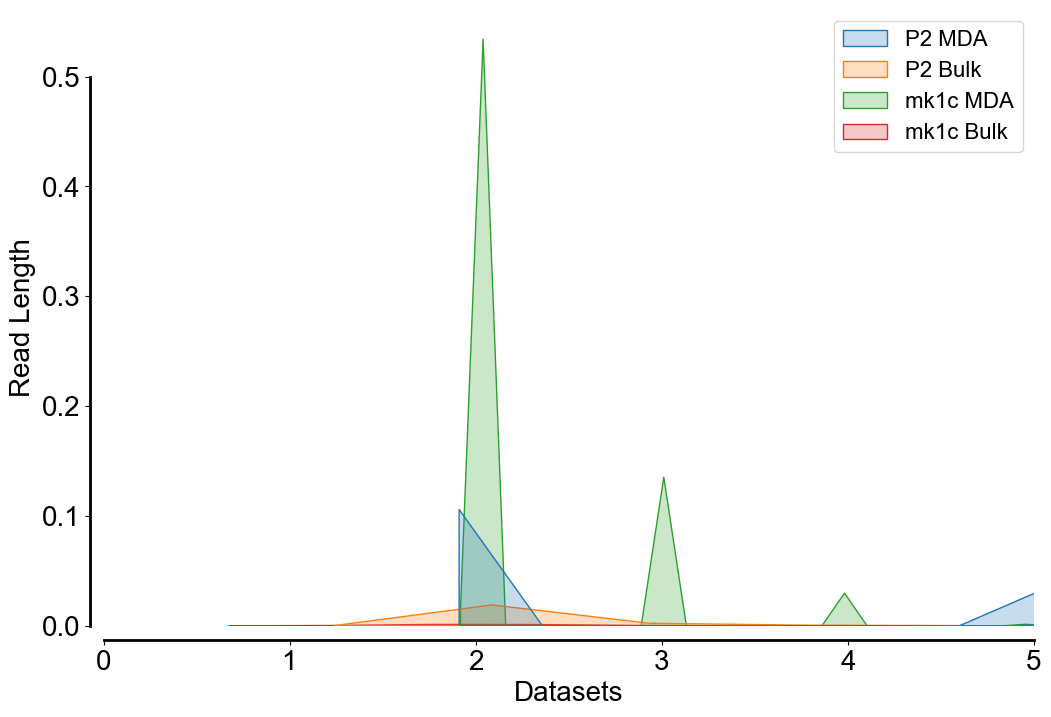

In [ ]:
plot_read_length_distribution_from_npz(
    data_number_of_chimeric_alignments,
    figsize=(12, 8),
    plot_type="kde",
    figure_name="number_of_chimeric_alignments_distribution.pdf",
)

In [ ]:
def filter_data_by_support(
    data: dict[str, np.ndarray], support: int
) -> dict[str, np.ndarray]:
    """Filter data by support level."""
    return {key: array[array <= support] for key, array in data.items()}


filtered_data = filter_data_by_support(data_number_of_chimeric_alignments, 5)
filtered_data


{'P2 MDA': array([4, 3, 3, ..., 2, 2, 2], shape=(12840074,)),
 'P2 Bulk': array([2, 2, 2, ..., 3, 2, 5], shape=(224676,)),
 'mk1c MDA': array([2, 2, 2, ..., 2, 2, 2], shape=(1663151,)),
 'mk1c Bulk': array([2, 3, 3, ..., 5, 3, 2], shape=(27850,))}

<Figure size 1200x800 with 0 Axes>

<Axes: ylabel='Count'>

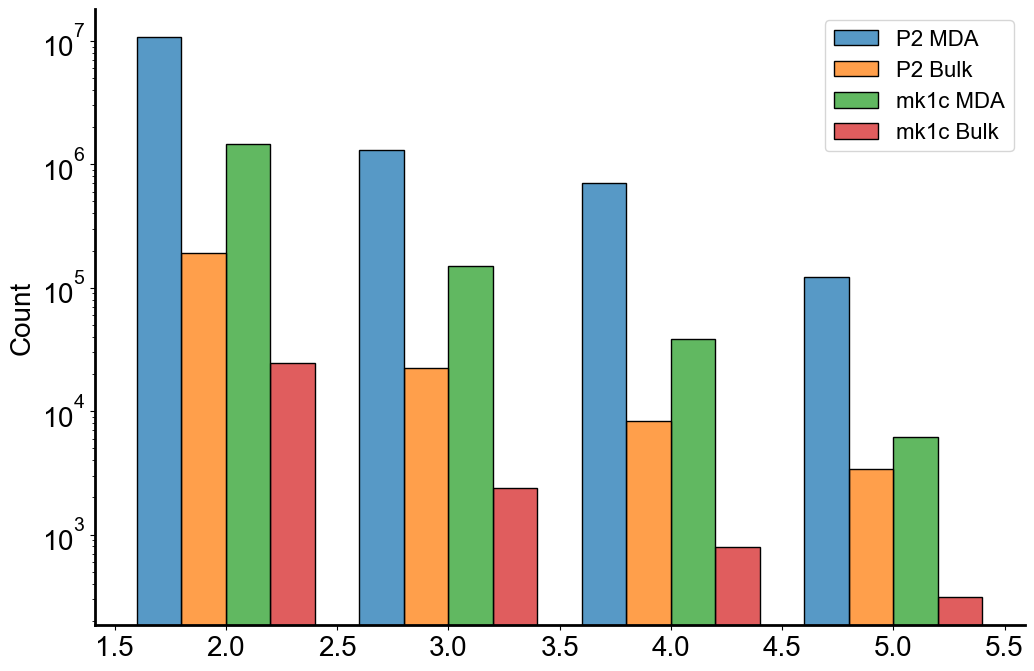

In [32]:
plt.figure(figsize=(12, 8))
sns.histplot(filtered_data, discrete=True, multiple="dodge", shrink=0.8)
plt.yscale("log")
sns.despine()
plt.savefig("number_of_chimeric_alignments_distribution_filtered.pdf", dpi=300)

In [ ]:
# num_chimeric_alignment_files = {
#     "P2 MDA": "./data/prediction_and_chimeric/PC3_10_cells_MDA_P2_dirty.chimeric_events.txt",
#     "P2 Bulk": "./data/prediction_and_chimeric/PC3_bulk_WGS_P2_clean.chimeric_events.txt",
#     "mk1c MDA": "./data/prediction_and_chimeric/PC3_10_cells_MDA_Mk1c_dirty.chimeric_events.txt",
#     "mk1c Bulk": "./data/prediction_and_chimeric/PC3_bulk_WGS_mk1c_clean.chimeric_events.txt",
# }



In [ ]:
from pathlib import Path


def anno(prediction_file: Path, chimeric_events_file: Path):
    result = {}

    with open(chimeric_events_file, "r") as f:
        for line in f:
            content = line.strip().split()
            read_name = content[0]
            number_of_chimeric_alignments = int(content[1])
            result[read_name] = [number_of_chimeric_alignments, None]

    with open(prediction_file, "r") as f:
        for line in f:
            content = line.strip().split()
            read_name = content[0]
            prediction = content[1]
            result[read_name][1] = int(prediction)

    return result


In [ ]:
p2_data_by_prediciton = anno(
    prediction_file=Path(
        "./data/prediction_and_chimeric/hyena_p2_765108_bulk_p2_predicts.txt"
    ),
    chimeric_events_file=Path(
        "./data/prediction_and_chimeric/PC3_10_cells_MDA_P2_dirty.chimeric_events.txt"
    ),
)

mk1c_data_by_prediction = anno(
    prediction_file=Path(
        "./data/prediction_and_chimeric/hyena_p2_765108_bulk_mk1c_predicts.txt"
    ),
    chimeric_events_file=Path(
        "./data/prediction_and_chimeric/PC3_10_cells_MDA_Mk1c_dirty.chimeric_events.txt"
    ),
)

In [11]:
p2_data_by_prediciton

{'142152e2-e537-4d29-b191-370f2fa658ca': [4, 1],
 '54feff57-fed5-4ed7-9f01-f9b445735536': [3, 1],
 '29555a26-cc06-4852-bc94-d851efa9fa42': [3, 1],
 'dc286a6b-8d99-4a94-bc11-166489b7af7a': [2, 1],
 'dd09bdd1-546f-4000-868d-02734787a2cc': [2, 1],
 '84cb4e51-63bb-4017-a012-b7765b722cb0': [2, 1],
 '3faf51dc-e30a-41b8-aac1-a5f7e5987549': [2, 0],
 '5aadec60-07b3-475f-889f-916482183fa5': [2, 1],
 '214269e1-9e3f-45f5-91cc-6c7dca0d48ab': [4, 0],
 '798f80af-df6e-4055-a752-a08704ba885c': [2, 1],
 '5b3a7d2d-fd28-4098-a3d1-e73f481846f4': [2, 1],
 '838d597b-93db-460f-8955-c0e8e594a395_1': [2, 0],
 'cc98fab0-7236-43e0-808f-d6fb06ab5f11': [2, 1],
 '7f6ca7dd-9175-42f9-be61-1f8f38cd9825': [2, 1],
 'e3bc54d9-5569-4c2f-b48e-dda25c395c60': [2, 1],
 '364cd768-f317-4035-a55d-9d5f98207685': [2, 1],
 '54291f68-182a-42a1-aa72-85b17ea806c4': [2, 1],
 '379d06c5-c730-43e6-a90e-5e464875c3f9': [2, 1],
 '1e1e845d-59c0-4174-b08d-f10ec7cde046': [2, 1],
 '0dfe7f8f-e3a6-407d-89ff-dfaf0cdabddd': [2, 1],
 'f37618f5-24d7-44

In [ ]:
import pandas as pd

result_df = pd.DataFrame(
    [(key, *value) for key, value in mk1c_data_by_prediction.items()],
    columns=["read_name", "num_chimeric_alignments", "prediction"],
)
filter_result_df = result_df[result_df["num_chimeric_alignments"] <= 5]

In [18]:
filter_result_df.query("num_chimeric_alignments >= 3")

,read_name,num_chimeric_alignments,prediction
4,6550def7-3c47-4811-884e-26174009a6ae,3,1
17,c75b8ec6-d3ee-41a0-903f-e24413182d4d,4,1
18,295f8323-0398-4c75-aae0-0713a6ee67ef,3,1
26,6e9b8405-5fdc-4523-ae83-73608a919e2e,4,1
37,4930304a-351b-492a-ac38-f92388a93a2c,3,1
...,...,...,...
1666400,64411ea5-3995-489b-9be3-7ed58128fe56,3,1
1666407,4f62f40a-e858-434c-9a6d-81ced181e578;84ee4805-...,3,1
1666412,e48e0470-328b-4cfe-91f4-2cf6dbf0e004,3,1
1666415,3c9c81b6-3931-40f2-b670-12d47cf531a0,3,0


In [ ]:
def draw_chimeric_alignments_histogram_by_prediction(
    result: dict[str, list[int]],
    figsize=(10, 6),
    filter_num_chimeric_alignments=5,
    figname=None,
):
    result_df = pd.DataFrame(
        [(key, *value) for key, value in result.items()],
        columns=["read_name", "num_chimeric_alignments", "prediction"],
    )
    filter_result_df = result_df[
        result_df["num_chimeric_alignments"] <= filter_num_chimeric_alignments
    ]
    # Draw a histogram for num_chimeric_alignments with hue by prediction
    plt.figure(figsize=figsize)
    sns.histplot(
        data=filter_result_df,
        x="num_chimeric_alignments",
        hue="prediction",
        multiple="dodge",
        palette="muted",
        discrete=True,
        shrink=0.8,
    )
    sns.despine()
    plt.xlabel("Number of Chimeric Alignments")
    plt.ylabel("Count")

    if figname is not None:
        plt.savefig(figname, dpi=300)


In [13]:
len(p2_data_by_prediciton)


12963576

In [12]:
len(mk1c_data_by_prediction)

1666427

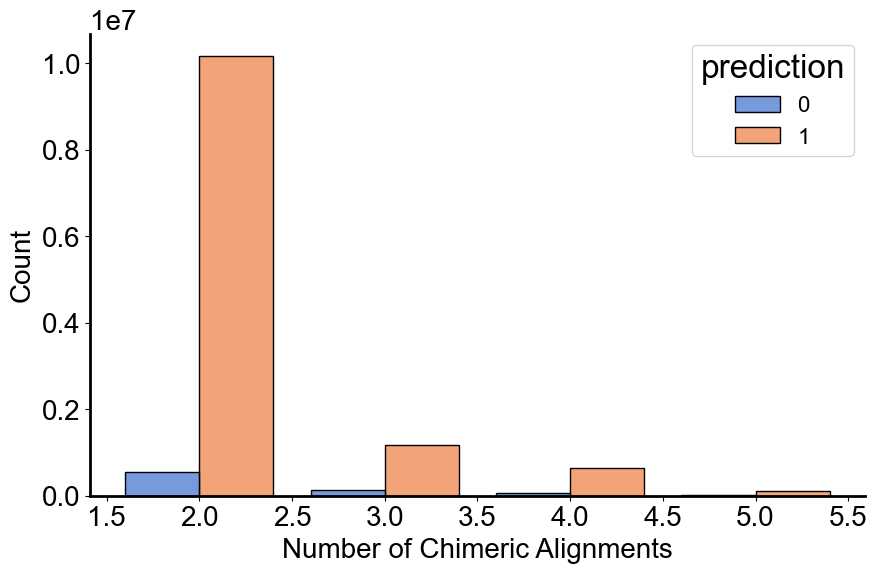

In [ ]:
draw_chimeric_alignments_histogram_by_prediction(
    p2_data_by_prediciton, figname="p2_chimeric_alignments_histogram_by_prediction.pdf"
)

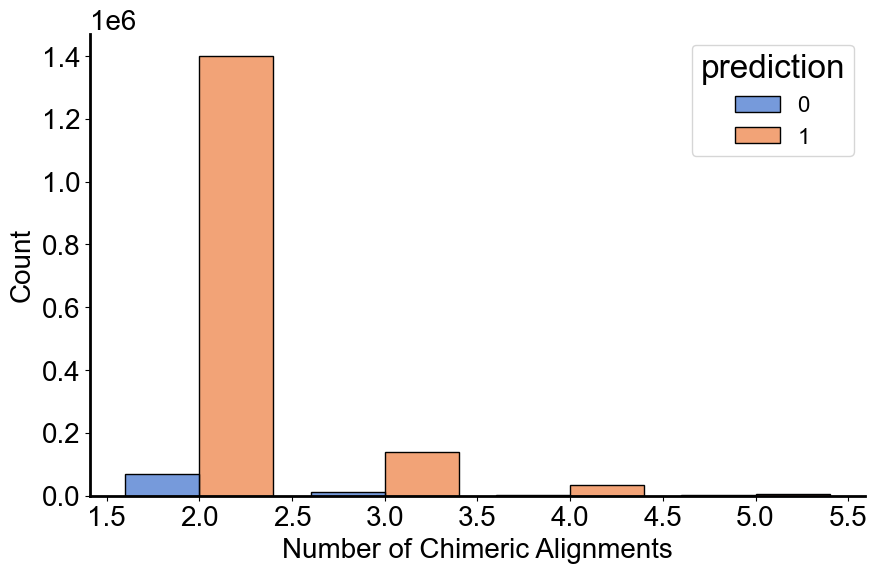

In [ ]:
draw_chimeric_alignments_histogram_by_prediction(
    mk1c_data_by_prediction,
    figname="mk1c_chimeric_alignments_histogram_by_prediction.pdf",
)

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='num_chimeric_alignments', ylabel='Count'>

Text(0.5, 0, 'Number of Chimeric Alignments')

Text(0, 0.5, 'Frequency')

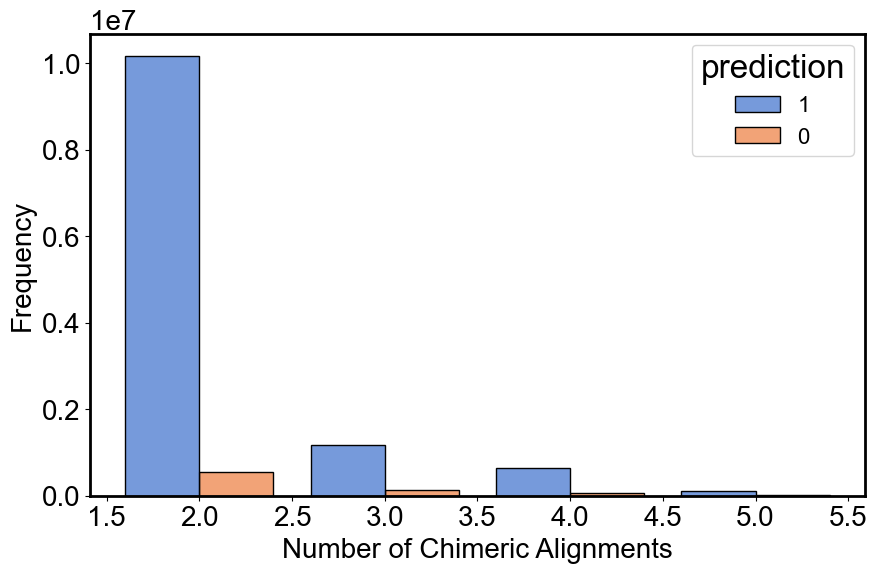

# SV Pattern


In [12]:
# read excel file
sv_data = pd.read_excel("./data/SV_Pattern_Change_Analysis .xlsx")

In [ ]:
sv_data
sv_data.columns

,Model,Dataset,Set,Sample_Type,Filename,TRA_count,TRA_percentage,DEL_count,DEL_percentage,INV_count,INV_percentage,DUP_count,DUP_percentage,INS_count,INS_percentage,Full_Path
0,Bulk,Mk1c,Reference,Bulk_Clean,sniffles_PC3_bulk_WGS_Mk1c_clean_sv_stats.txt,552,2.05,12942,48.03,1431,5.31,176,0.65,11842,43.95,./bulk_clean_references/sniffles_PC3_bulk_WGS_...
1,Bulk,P2,Reference,Bulk_Clean,sniffles_PC3_bulk_WGS_P2_clean_sv_stats.txt,5293,4.44,72178,60.53,11089,9.30,1027,0.86,29655,24.87,./bulk_clean_references/sniffles_PC3_bulk_WGS_...
2,Bulk,PacBio,Reference,Bulk_Clean,sniffles_PC3_pacbio_sv_stats.txt,588,1.35,18413,42.21,1730,3.97,768,1.76,22119,50.71,./bulk_clean_references/sniffles_PC3_pacbio_sv...
3,CNN,Mk1c,Set_C,Model_Filtered,sniffles_SetC_cnn_p2_765108_bulk_mk1c_predicts...,919,0.55,18598,11.03,137042,81.29,4009,2.38,8026,4.76,./cnn_p2_765108_bulk_model_on_mk1c_dataset_set...
4,CNN,P2,Set_C,Model_Filtered,sniffles_SetC_cnn_p2_765108_bulk_p2_predicts_s...,11712,1.28,92126,10.11,722961,79.30,26852,2.95,57977,6.36,./cnn_p2_765108_bulk_model_on_P2_dataset_setC/...
5,Hyena,Mk1c,Set_C,Model_Filtered,sniffles_SetC_hyena_p2_765108_bulk_mk1c_predic...,276,0.70,13480,34.39,18121,46.23,788,2.01,6530,16.66,./hyena_p2_765108_bulk_model_on_mk1c_dataset_s...
6,Hyena,P2,Set_C,Model_Filtered,sniffles_SetC_hyena_p2_765108_bulk_p2_predicts...,6324,2.01,65667,20.88,190835,60.67,8622,2.74,43073,13.69,./hyena_p2_765108_bulk_model_on_P2_dataset_set...
7,Original,Mk1c,Set_A,Original_Dirty,sniffles_SetA_Mk1c_dirty_sv_stats.txt,2892,0.63,28471,6.19,406305,88.29,10892,2.37,11613,2.52,./original_data_setA_P2_mk1c/sniffles_SetA_Mk1...
8,Original,P2,Set_A,Original_Dirty,sniffles_SetA_P2_dirty_sv_stats.txt,57911,1.57,262527,7.11,3064158,83.00,155695,4.22,151394,4.10,./original_data_setA_P2_mk1c/sniffles_SetA_P2_...


Index(['Model', 'Dataset', 'Set', 'Sample_Type', 'Filename', 'TRA_count',
       'TRA_percentage', 'DEL_count', 'DEL_percentage', 'INV_count',
       'INV_percentage', 'DUP_count', 'DUP_percentage', 'INS_count',
       'INS_percentage', 'Full_Path'],
      dtype='object')

In [14]:
hyena_sv_data = sv_data[sv_data["Model"] != "CNN"]

In [15]:
hyena_sv_data

,Model,Dataset,Set,Sample_Type,Filename,TRA_count,TRA_percentage,DEL_count,DEL_percentage,INV_count,INV_percentage,DUP_count,DUP_percentage,INS_count,INS_percentage,Full_Path
0,Bulk,Mk1c,Reference,Bulk_Clean,sniffles_PC3_bulk_WGS_Mk1c_clean_sv_stats.txt,552,2.05,12942,48.03,1431,5.31,176,0.65,11842,43.95,./bulk_clean_references/sniffles_PC3_bulk_WGS_...
1,Bulk,P2,Reference,Bulk_Clean,sniffles_PC3_bulk_WGS_P2_clean_sv_stats.txt,5293,4.44,72178,60.53,11089,9.30,1027,0.86,29655,24.87,./bulk_clean_references/sniffles_PC3_bulk_WGS_...
2,Bulk,PacBio,Reference,Bulk_Clean,sniffles_PC3_pacbio_sv_stats.txt,588,1.35,18413,42.21,1730,3.97,768,1.76,22119,50.71,./bulk_clean_references/sniffles_PC3_pacbio_sv...
5,Hyena,Mk1c,Set_C,Model_Filtered,sniffles_SetC_hyena_p2_765108_bulk_mk1c_predic...,276,0.70,13480,34.39,18121,46.23,788,2.01,6530,16.66,./hyena_p2_765108_bulk_model_on_mk1c_dataset_s...
6,Hyena,P2,Set_C,Model_Filtered,sniffles_SetC_hyena_p2_765108_bulk_p2_predicts...,6324,2.01,65667,20.88,190835,60.67,8622,2.74,43073,13.69,./hyena_p2_765108_bulk_model_on_P2_dataset_set...
7,Original,Mk1c,Set_A,Original_Dirty,sniffles_SetA_Mk1c_dirty_sv_stats.txt,2892,0.63,28471,6.19,406305,88.29,10892,2.37,11613,2.52,./original_data_setA_P2_mk1c/sniffles_SetA_Mk1...
8,Original,P2,Set_A,Original_Dirty,sniffles_SetA_P2_dirty_sv_stats.txt,57911,1.57,262527,7.11,3064158,83.00,155695,4.22,151394,4.10,./original_data_setA_P2_mk1c/sniffles_SetA_P2_...


/tmp/ipykernel_2061997/2441453035.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette=colors, ax=ax)


<Axes: >

Text(0, 681.4200000000001, '552')

Text(1, 13071.42, '12942')

Text(2, 1560.42, '1431')

Text(3, 305.42, '176')

Text(4, 11971.42, '11842')

Text(0.5, 1.0, 'SV Pattern Distribution for Row 0')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'SV Type')

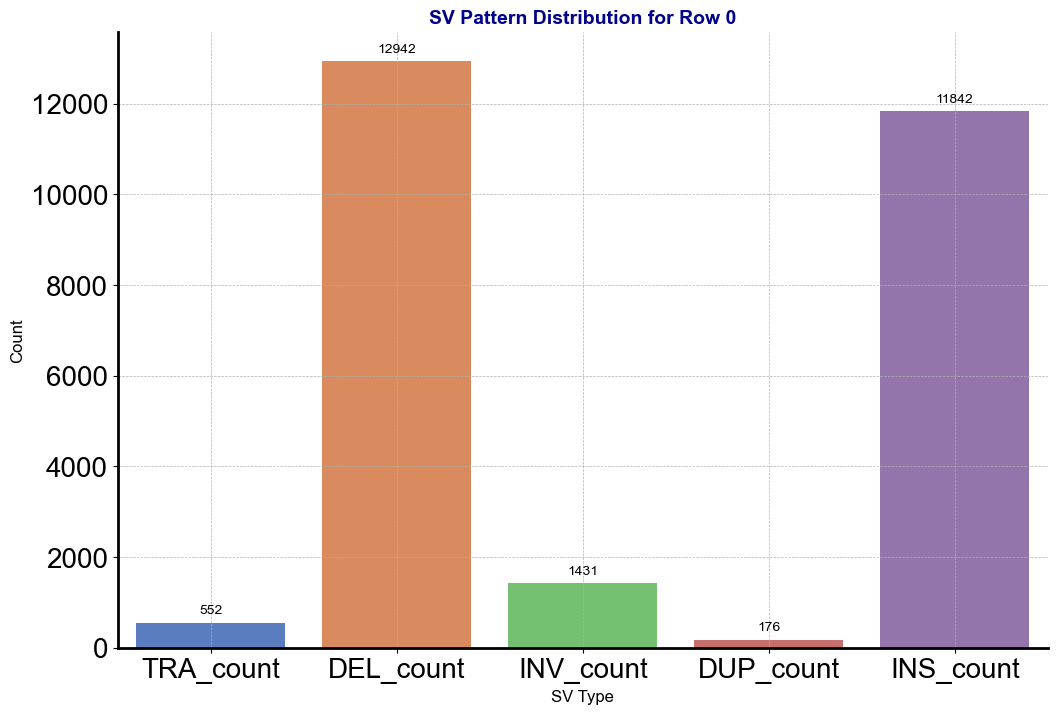

/tmp/ipykernel_2061997/2441453035.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette=colors, ax=ax)


<Axes: title={'center': 'SV Pattern Distribution for Row 0'}, xlabel='SV Type', ylabel='Count'>

Text(0, 6014.78, '5293')

Text(1, 72899.78, '72178')

Text(2, 11810.78, '11089')

Text(3, 1748.78, '1027')

Text(4, 30376.78, '29655')

Text(0.5, 1.0, 'SV Pattern Distribution for Row 1')

Text(24.999999999999986, 0.5, 'Count')

Text(0.5, 25.000000000000007, 'SV Type')

<Figure size 640x480 with 0 Axes>

/tmp/ipykernel_2061997/2441453035.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette=colors, ax=ax)


<Axes: title={'center': 'SV Pattern Distribution for Row 1'}, xlabel='SV Type', ylabel='Count'>

Text(0, 809.19, '588')

Text(1, 18634.19, '18413')

Text(2, 1951.19, '1730')

Text(3, 989.19, '768')

Text(4, 22340.19, '22119')

Text(0.5, 1.0, 'SV Pattern Distribution for Row 2')

Text(24.999999999999986, 0.5, 'Count')

Text(0.5, 25.000000000000007, 'SV Type')

<Figure size 640x480 with 0 Axes>

/tmp/ipykernel_2061997/2441453035.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette=colors, ax=ax)


<Axes: title={'center': 'SV Pattern Distribution for Row 2'}, xlabel='SV Type', ylabel='Count'>

Text(0, 457.21000000000004, '276')

Text(1, 13661.21, '13480')

Text(2, 18302.21, '18121')

Text(3, 969.21, '788')

Text(4, 6711.21, '6530')

Text(0.5, 1.0, 'SV Pattern Distribution for Row 5')

Text(24.999999999999986, 0.5, 'Count')

Text(0.5, 25.000000000000007, 'SV Type')

<Figure size 640x480 with 0 Axes>

/tmp/ipykernel_2061997/2441453035.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette=colors, ax=ax)


<Axes: title={'center': 'SV Pattern Distribution for Row 5'}, xlabel='SV Type', ylabel='Count'>

Text(0, 8232.35, '6324')

Text(1, 67575.35, '65667')

Text(2, 192743.35, '190835')

Text(3, 10530.35, '8622')

Text(4, 44981.35, '43073')

Text(0.5, 1.0, 'SV Pattern Distribution for Row 6')

Text(24.999999999999986, 0.5, 'Count')

Text(0.5, 25.000000000000007, 'SV Type')

<Figure size 640x480 with 0 Axes>

/tmp/ipykernel_2061997/2441453035.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette=colors, ax=ax)


<Axes: title={'center': 'SV Pattern Distribution for Row 6'}, xlabel='SV Type', ylabel='Count'>

Text(0, 6955.05, '2892')

Text(1, 32534.05, '28471')

Text(2, 410368.05, '406305')

Text(3, 14955.05, '10892')

Text(4, 15676.05, '11613')

Text(0.5, 1.0, 'SV Pattern Distribution for Row 7')

Text(24.999999999999986, 0.5, 'Count')

Text(0.5, 25.000000000000007, 'SV Type')

<Figure size 640x480 with 0 Axes>

/tmp/ipykernel_2061997/2441453035.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette=colors, ax=ax)


<Axes: title={'center': 'SV Pattern Distribution for Row 7'}, xlabel='SV Type', ylabel='Count'>

Text(0, 88552.58, '57911')

Text(1, 293168.58, '262527')

Text(2, 3094799.58, '3064158')

Text(3, 186336.58000000002, '155695')

Text(4, 182035.58000000002, '151394')

Text(0.5, 1.0, 'SV Pattern Distribution for Row 8')

Text(24.999999999999986, 0.5, 'Count')

Text(0.5, 25.000000000000007, 'SV Type')

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the categories and colors for the bar chart
categories = ["TRA_count", "DEL_count", "INV_count", "DUP_count", "INS_count"]
colors = sns.color_palette("muted", len(categories))

# Set up the figure
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate over each row in hyena_sv_data
for index, row in hyena_sv_data.iterrows():
    counts = [row[category] for category in categories]

    # Create a bar chart for each row
    sns.barplot(x=categories, y=counts, palette=colors, ax=ax)

    # Add value annotations on top of each bar
    for i, count in enumerate(counts):
        ax.text(
            i,
            count + max(counts) * 0.01,
            f"{count}",
            ha="center",
            va="bottom",
            color="black",
            fontsize=10,
        )

    ax.set_title(
        f"SV Pattern Distribution for Row {index}",
        fontsize=14,
        fontweight="bold",
        color="darkblue",
    )
    ax.set_ylabel("Count", fontsize=12)
    ax.set_xlabel("SV Type", fontsize=12)

    # Apply Nature Methods styling
    sns.despine()
    ax.grid(True, which="both", linestyle="--", linewidth=0.5)

    # Display the plot
    plt.show()

In [17]:
hyena_sv_data

,Model,Dataset,Set,Sample_Type,Filename,TRA_count,TRA_percentage,DEL_count,DEL_percentage,INV_count,INV_percentage,DUP_count,DUP_percentage,INS_count,INS_percentage,Full_Path
0,Bulk,Mk1c,Reference,Bulk_Clean,sniffles_PC3_bulk_WGS_Mk1c_clean_sv_stats.txt,552,2.05,12942,48.03,1431,5.31,176,0.65,11842,43.95,./bulk_clean_references/sniffles_PC3_bulk_WGS_...
1,Bulk,P2,Reference,Bulk_Clean,sniffles_PC3_bulk_WGS_P2_clean_sv_stats.txt,5293,4.44,72178,60.53,11089,9.30,1027,0.86,29655,24.87,./bulk_clean_references/sniffles_PC3_bulk_WGS_...
2,Bulk,PacBio,Reference,Bulk_Clean,sniffles_PC3_pacbio_sv_stats.txt,588,1.35,18413,42.21,1730,3.97,768,1.76,22119,50.71,./bulk_clean_references/sniffles_PC3_pacbio_sv...
5,Hyena,Mk1c,Set_C,Model_Filtered,sniffles_SetC_hyena_p2_765108_bulk_mk1c_predic...,276,0.70,13480,34.39,18121,46.23,788,2.01,6530,16.66,./hyena_p2_765108_bulk_model_on_mk1c_dataset_s...
6,Hyena,P2,Set_C,Model_Filtered,sniffles_SetC_hyena_p2_765108_bulk_p2_predicts...,6324,2.01,65667,20.88,190835,60.67,8622,2.74,43073,13.69,./hyena_p2_765108_bulk_model_on_P2_dataset_set...
7,Original,Mk1c,Set_A,Original_Dirty,sniffles_SetA_Mk1c_dirty_sv_stats.txt,2892,0.63,28471,6.19,406305,88.29,10892,2.37,11613,2.52,./original_data_setA_P2_mk1c/sniffles_SetA_Mk1...
8,Original,P2,Set_A,Original_Dirty,sniffles_SetA_P2_dirty_sv_stats.txt,57911,1.57,262527,7.11,3064158,83.00,155695,4.22,151394,4.10,./original_data_setA_P2_mk1c/sniffles_SetA_P2_...


In [ ]:
plot_data = hyena_sv_data.loc[
    :, ["TRA_count", "DEL_count", "INV_count", "DUP_count", "INS_count"]
]

In [19]:
plot_data["Dataset"] = hyena_sv_data["Set"]
plot_data["Model"] = hyena_sv_data["Model"] + "_" + hyena_sv_data["Dataset"]

In [20]:
plot_data

,TRA_count,DEL_count,INV_count,DUP_count,INS_count,Dataset,Model
0,552,12942,1431,176,11842,Reference,Bulk_Mk1c
1,5293,72178,11089,1027,29655,Reference,Bulk_P2
2,588,18413,1730,768,22119,Reference,Bulk_PacBio
5,276,13480,18121,788,6530,Set_C,Hyena_Mk1c
6,6324,65667,190835,8622,43073,Set_C,Hyena_P2
7,2892,28471,406305,10892,11613,Set_A,Original_Mk1c
8,57911,262527,3064158,155695,151394,Set_A,Original_P2


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for Mk1c and P2 models
mk1c_data = plot_data[plot_data["Model"].str.contains("Mk1c")]
p2_data = plot_data[plot_data["Model"].str.contains("P2")]

# Combine Mk1c and P2 data for plotting
combined_data = pd.concat([mk1c_data, p2_data])

# Convert SV count columns to numeric, handling errors by coercing them to NaN
for col in ["TRA_count", "DEL_count", "INV_count", "DUP_count", "INS_count"]:
    combined_data[col] = pd.to_numeric(combined_data[col], errors="coerce")


In [22]:
combined_data

,TRA_count,DEL_count,INV_count,DUP_count,INS_count,Dataset,Model
0,552,12942,1431,176,11842,Reference,Bulk_Mk1c
5,276,13480,18121,788,6530,Set_C,Hyena_Mk1c
7,2892,28471,406305,10892,11613,Set_A,Original_Mk1c
1,5293,72178,11089,1027,29655,Reference,Bulk_P2
6,6324,65667,190835,8622,43073,Set_C,Hyena_P2
8,57911,262527,3064158,155695,151394,Set_A,Original_P2


In [ ]:
def draw_pie_chart_for_sv_type_distribution(data, figsize=(30, 20), figname=None):
    """
    Draw elegant donut charts for SV type distribution showing Bulk, Original, and Hyena for both Mk1c and P2.

    Parameters:
    -----------
    data : pd.DataFrame
        Combined data with columns: Model, TRA_count, DEL_count, INV_count, DUP_count, INS_count
    figsize : tuple
        Figure size
    figname : str
        Filename to save the figure
    """
    import numpy as np

    # Define SV types and custom colors for consistency with bar charts
    sv_types = ["TRA", "DEL", "INV", "DUP", "INS"]
    sv_colors = {
        "INV": "#C98BB1",  # Pink/mauve
        "DEL": "#6AA995",  # Teal/green
        "DUP": "#D68B6D",  # Orange/coral
        "INS": "#8A97B3",  # Blue/purple
        "TRA": "#96B85E",  # Yellow-green/lime
    }
    colors = [sv_colors[sv] for sv in sv_types]

    # Define dataset types and their identifiers
    dataset_order = [("bulk", "Bulk"), ("original", "MDA"), ("hyena", "ChimeraLM")]

    # Create figure with 2 rows and 3 columns (Mk1c row and P2 row)
    fig, axes = plt.subplots(2, 3, figsize=figsize)

    # Add more spacing between subplots to prevent overlap
    # plt.subplots_adjust(hspace=0.35, wspace=0.25)

    # Function to format percentage - only show inside for larger slices
    def make_autopct(values):
        def my_autopct(pct):
            return f"{pct:.1f}%" if pct > 8 else ""

        return my_autopct

    # Function to create a donut chart with annotations for small slices
    def create_donut(ax, values, title):
        # Create donut chart (pie with a hole in the middle)
        wedges, texts, autotexts = ax.pie(
            values,
            colors=colors,
            autopct=make_autopct(values),
            startangle=90,
            pctdistance=0.82,
            wedgeprops=dict(width=0.6, edgecolor="white", linewidth=3),
            textprops={"fontsize": 14, "fontweight": "bold"},
        )

        # Style the percentage text (white for better contrast)
        for autotext in autotexts:
            autotext.set_color("white")
            autotext.set_fontsize(13)
            autotext.set_fontweight("bold")

        # Style the label text - hide them initially
        for text in texts:
            text.set_fontsize(0)

        # Add annotations for ALL slices with leader lines
        # This ensures small percentages are shown outside
        total = sum(values)
        for i, (wedge, value) in enumerate(zip(wedges, values)):
            pct = (value / total) * 100

            # Calculate the angle for positioning
            ang = (wedge.theta2 - wedge.theta1) / 2.0 + wedge.theta1

            # For small slices, add annotation with leader line
            if pct <= 8 and pct > 0.1:  # Show annotation for slices between 0.1% and 8%
                # Position for the end of the line (outside the donut)
                x = np.cos(np.deg2rad(ang))
                y = np.sin(np.deg2rad(ang))

                # Determine horizontal alignment based on which side
                horizontalalignment = "left" if x >= 0 else "right"

                # Position text further out
                connectionstyle = f"angle,angleA=0,angleB={ang}"

                # Add vertical offset based on nearby annotations to avoid overlap
                # Group annotations by quadrant
                y_offset = 0
                if ang > 45 and ang < 135:  # Top quadrant
                    y_offset = (i % 3 - 1) * 0.2  # Spread vertically
                elif ang > 225 and ang < 315:  # Bottom quadrant
                    y_offset = (i % 3 - 1) * 0.2

                ax.annotate(
                    f"{sv_types[i]}: {pct:.1f}%",
                    xy=(x * 0.75, y * 0.75),  # Point on the donut
                    xytext=(x * 1.5, y * 1.5 + y_offset),  # Text position with offset
                    ha=horizontalalignment,
                    va="center",
                    fontsize=11,
                    fontweight="bold",
                    color="#2c3e50",
                    bbox=dict(
                        boxstyle="round,pad=0.4",
                        facecolor="white",
                        edgecolor=colors[i],
                        linewidth=2,
                        alpha=0.95,
                    ),
                    arrowprops=dict(
                        arrowstyle="-", color=colors[i], linewidth=2, alpha=0.8
                    ),
                )

        # Add center text with total - LARGER
        ax.text(
            0,
            0,
            f"{total:,}\nSVs",
            ha="center",
            va="center",
            fontsize=17,
            fontweight="bold",
            color="#333333",
        )

        # Add title - LARGER
        ax.set_title(title, fontsize=18, fontweight="bold", pad=25, color="#2c3e50")

        # Set axis limits to accommodate annotations - MORE SPACE
        ax.set_xlim(-1.9, 1.9)
        ax.set_ylim(-1.9, 1.9)

        return wedges

    # Process Mk1c data (first row)
    print("\n" + "=" * 70)
    print("SV TYPE DISTRIBUTION SUMMARY")
    print("=" * 70)
    print("\nMinION Mk1c:")

    for idx, (dataset_key, dataset_label) in enumerate(dataset_order):
        # Filter data for this dataset
        mk1c_subset = data[
            data["Model"].str.contains("Mk1c", case=False)
            & data["Model"].str.contains(dataset_key, case=False)
        ]

        # Calculate totals
        values = []
        for sv in sv_types:
            col_name = f"{sv}_count"
            total = mk1c_subset[col_name].sum()
            values.append(total)

        # Create donut chart
        wedges = create_donut(axes[0, idx], values, f"Mk1c {dataset_label}")

        # Print statistics
        print(f"\n  {dataset_label}:")
        for i, sv in enumerate(sv_types):
            pct = (values[i] / sum(values)) * 100 if sum(values) > 0 else 0
            print(f"    {sv}: {values[i]:8,} ({pct:5.1f}%)")
        print(f"    Total: {sum(values):8,}")

    # Process P2 data (second row)
    print("\nPromethION P2:")

    for idx, (dataset_key, dataset_label) in enumerate(dataset_order):
        # Filter data for this dataset
        p2_subset = data[
            data["Model"].str.contains("P2", case=False)
            & data["Model"].str.contains(dataset_key, case=False)
        ]

        # Calculate totals
        values = []
        for sv in sv_types:
            col_name = f"{sv}_count"
            total = p2_subset[col_name].sum()
            values.append(total)

        # Create donut chart
        wedges = create_donut(axes[1, idx], values, f"P2 {dataset_label}")

        # Print statistics
        print(f"\n  {dataset_label}:")
        for i, sv in enumerate(sv_types):
            pct = (values[i] / sum(values)) * 100 if sum(values) > 0 else 0
            print(f"    {sv}: {values[i]:8,} ({pct:5.1f}%)")
        print(f"    Total: {sum(values):8,}")

    print("=" * 70)

    # Add main title with elegant styling - LARGER
    fig.suptitle(
        "SV Type Distribution: Bulk vs MDA vs ChimeraLM",
        fontsize=24,
        fontweight="bold",
        y=0.98,
        color="#2c3e50",
    )

    # Add platform labels on the left with elegant styling - LARGER
    fig.text(
        0.015,
        0.73,
        "MinION Mk1c",
        fontsize=17,
        fontweight="bold",
        rotation=90,
        va="center",
        ha="center",
        bbox=dict(
            boxstyle="round,pad=0.5",
            facecolor="#ecf0f1",
            edgecolor="#bdc3c7",
            linewidth=2,
        ),
    )
    fig.text(
        0.015,
        0.27,
        "PromethION P2",
        fontsize=17,
        fontweight="bold",
        rotation=90,
        va="center",
        ha="center",
        bbox=dict(
            boxstyle="round,pad=0.5",
            facecolor="#ecf0f1",
            edgecolor="#bdc3c7",
            linewidth=2,
        ),
    )

    # Create custom legend with colored squares
    from matplotlib.patches import Rectangle

    legend_elements = []
    for sv in sv_types:
        legend_elements.append(
            Rectangle(
                (0, 0),
                1,
                1,
                facecolor=sv_colors[sv],
                edgecolor="white",
                linewidth=2,
                label=sv,
            )
        )

    # Add legend at the bottom with elegant styling - LARGER
    legend = fig.legend(
        handles=legend_elements,
        labels=sv_types,
        title="SV Types",
        loc="lower center",
        ncol=5,
        frameon=True,
        fontsize=14,
        title_fontsize=15,
        bbox_to_anchor=(0.5, -0.01),
        shadow=True,
        fancybox=True,
    )
    legend.get_frame().set_facecolor("#f8f9fa")
    legend.get_frame().set_edgecolor("#bdc3c7")
    legend.get_frame().set_linewidth(2)

    # Adjust layout
    plt.tight_layout(rect=[0.03, 0.04, 1, 0.96])

    # Save figure if filename provided
    if figname is not None:
        plt.savefig(figname, dpi=300, bbox_inches="tight")



SV TYPE DISTRIBUTION SUMMARY

MinION Mk1c:

  Bulk:
    TRA:      552 (  2.0%)
    DEL:   12,942 ( 48.0%)
    INV:    1,431 (  5.3%)
    DUP:      176 (  0.7%)
    INS:   11,842 ( 44.0%)
    Total:   26,943

  MDA:
    TRA:    2,892 (  0.6%)
    DEL:   28,471 (  6.2%)
    INV:  406,305 ( 88.3%)
    DUP:   10,892 (  2.4%)
    INS:   11,613 (  2.5%)
    Total:  460,173

  ChimeraLM:
    TRA:      276 (  0.7%)
    DEL:   13,480 ( 34.4%)
    INV:   18,121 ( 46.2%)
    DUP:      788 (  2.0%)
    INS:    6,530 ( 16.7%)
    Total:   39,195

PromethION P2:

  Bulk:
    TRA:    5,293 (  4.4%)
    DEL:   72,178 ( 60.5%)
    INV:   11,089 (  9.3%)
    DUP:    1,027 (  0.9%)
    INS:   29,655 ( 24.9%)
    Total:  119,242

  MDA:
    TRA:   57,911 (  1.6%)
    DEL:  262,527 (  7.1%)
    INV: 3,064,158 ( 83.0%)
    DUP:  155,695 (  4.2%)
    INS:  151,394 (  4.1%)
    Total: 3,691,685

  ChimeraLM:
    TRA:    6,324 (  2.0%)
    DEL:   65,667 ( 20.9%)
    INV:  190,835 ( 60.7%)
    DUP:    8,622 ( 

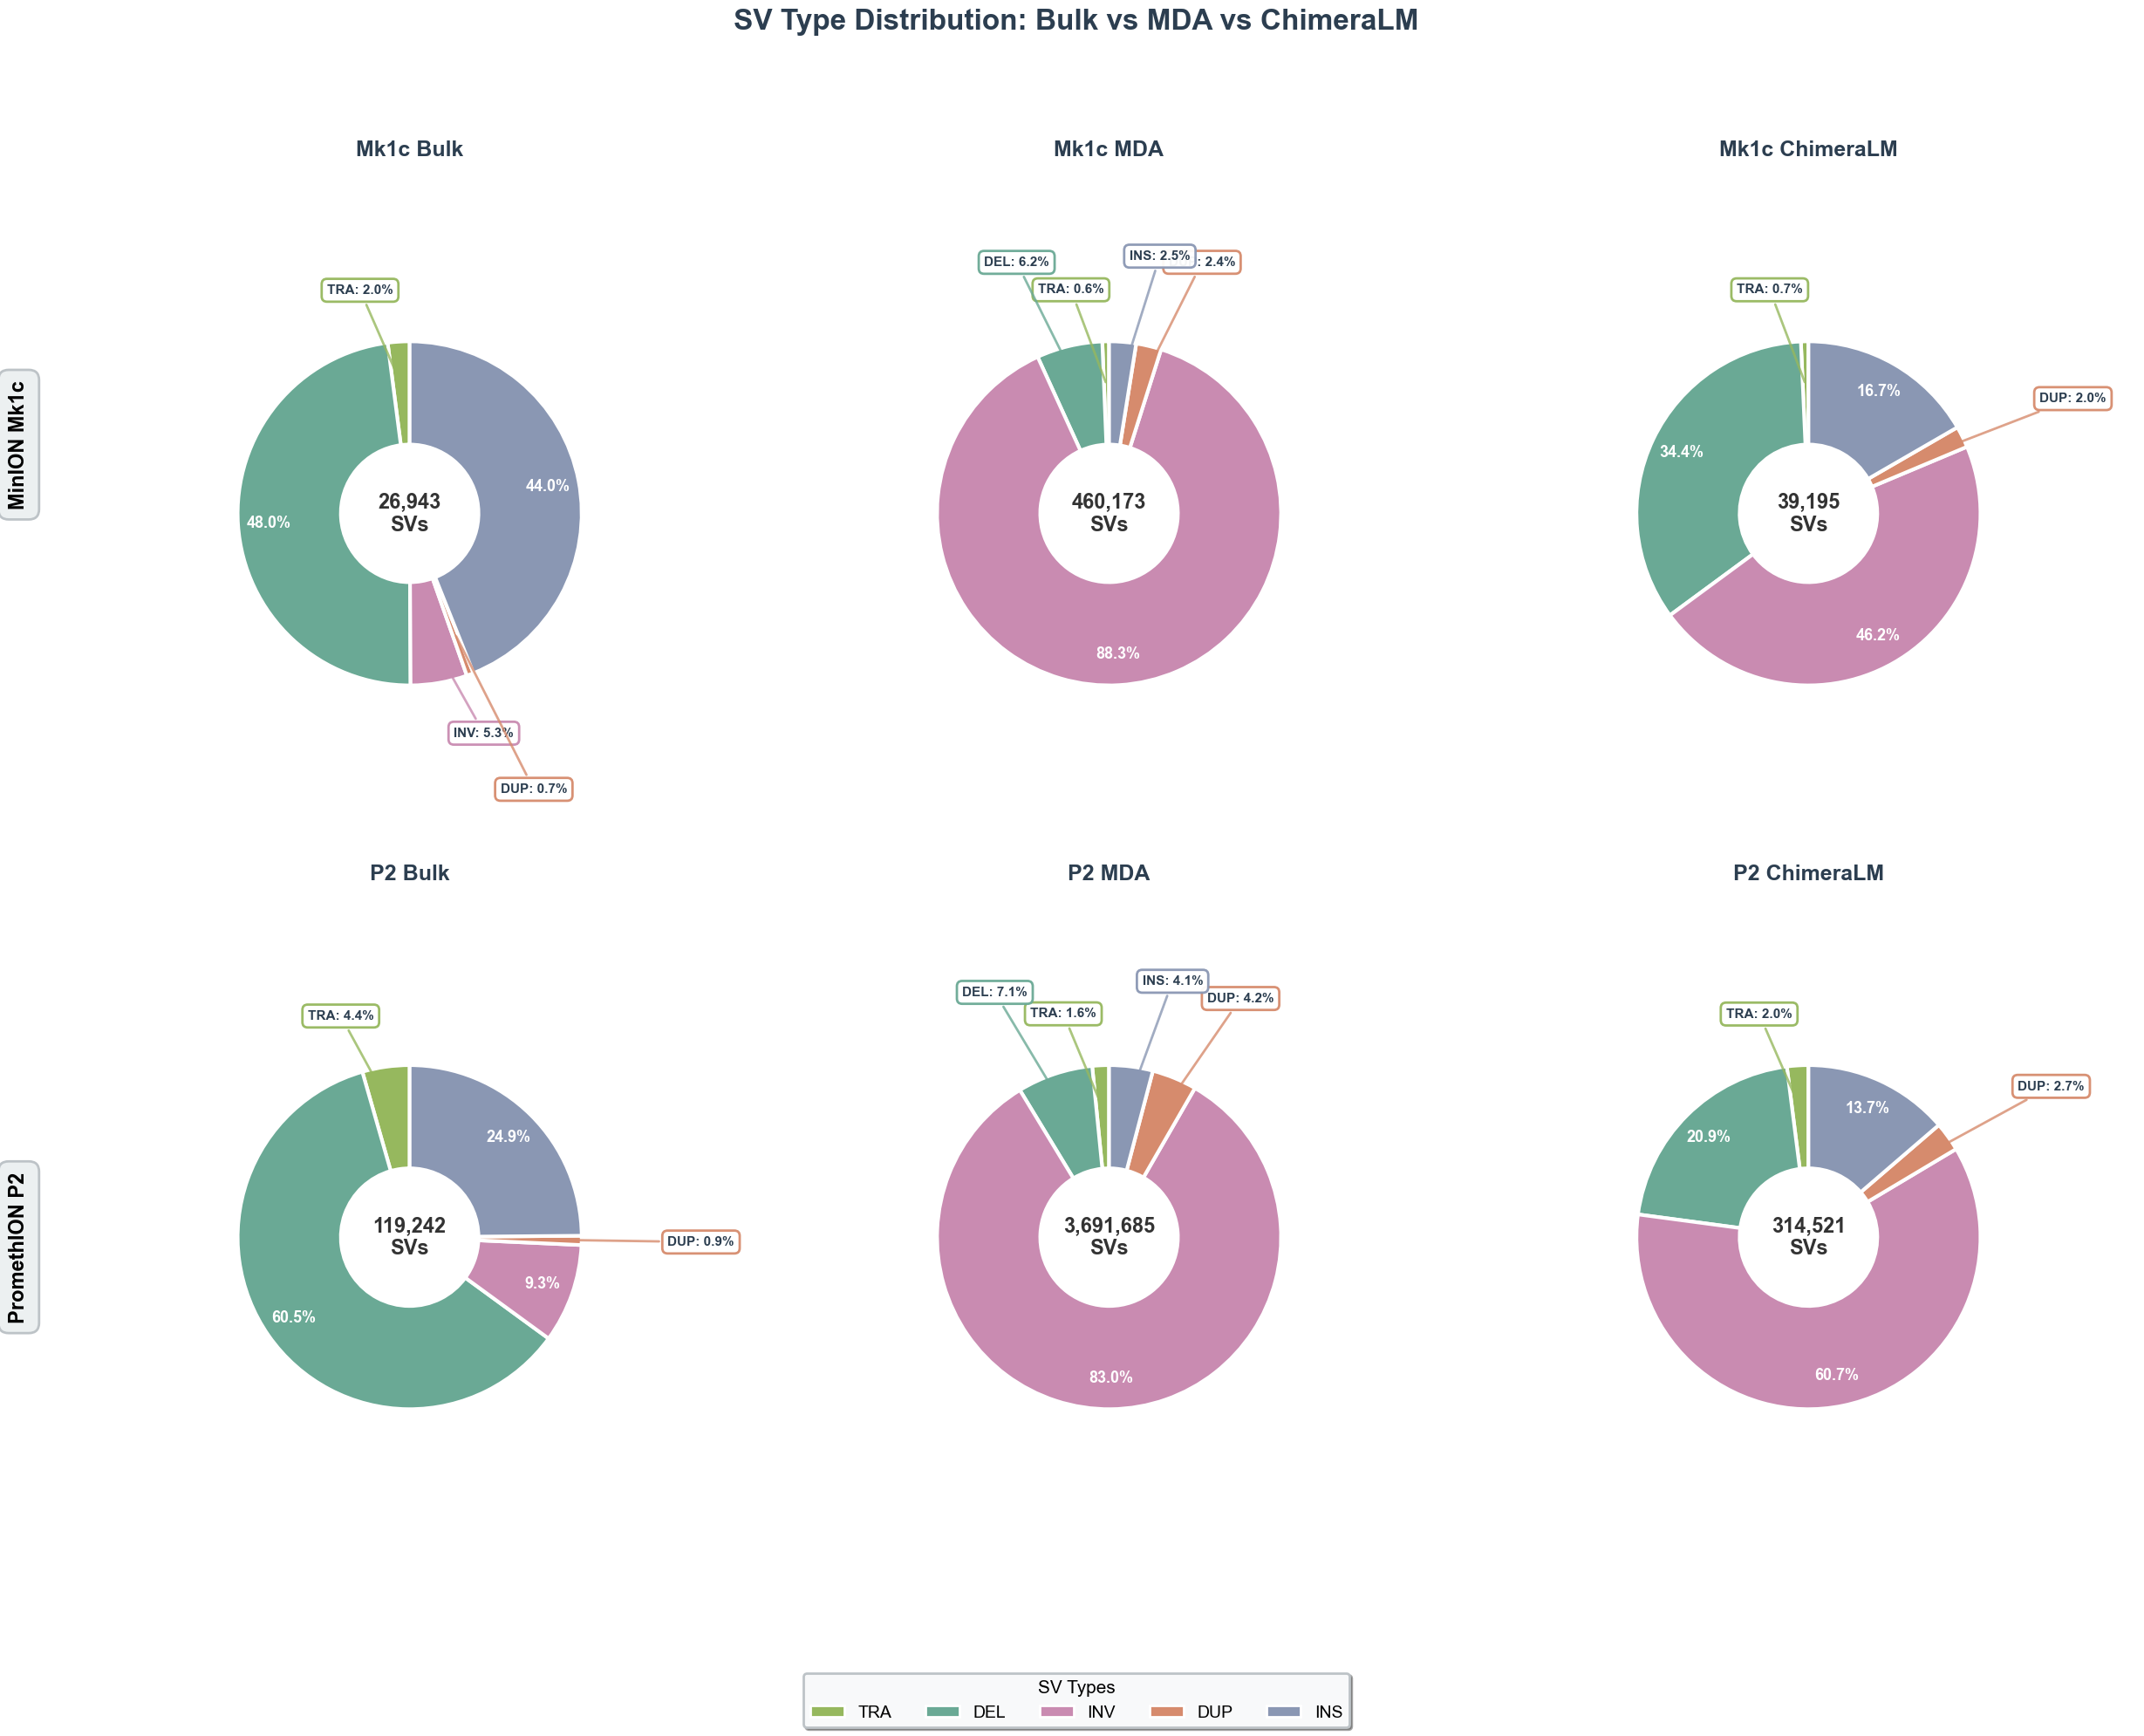

In [ ]:
# Test the pie chart function with combined_data
draw_pie_chart_for_sv_type_distribution(
    combined_data, figsize=(25, 20), figname="sv_type_distribution_pie_charts.pdf"
)


<Axes: xlabel='Model', ylabel='Count'>

Text(0.5, 1.0, 'Mk1c Models - SV Type Distribution')

Text(0, 0.5, 'Count (×10⁶)')

<Axes: xlabel='Model', ylabel='Count'>

Text(0.5, 1.0, 'P2 Models - SV Type Distribution')

Text(0, 0.5, 'Count')

/var/folders/s3/vs6nrrg52sdfjk3z90p7ndt94gg4tq/T/ipykernel_10603/2921565574.py:61: UserWarning: Glyph 8310 (\N{SUPERSCRIPT SIX}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/s3/vs6nrrg52sdfjk3z90p7ndt94gg4tq/T/ipykernel_10603/2921565574.py:62: UserWarning: Glyph 8310 (\N{SUPERSCRIPT SIX}) missing from font(s) Arial.
  fig.savefig("sv_pattern_distribution.pdf", dpi=300)
/Users/ylk4626/miniforge3/envs/chimera/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8310 (\N{SUPERSCRIPT SIX}) missing from font(s) Arial.
  func(*args, **kwargs)
/Users/ylk4626/miniforge3/envs/chimera/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8310 (\N{SUPERSCRIPT SIX}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


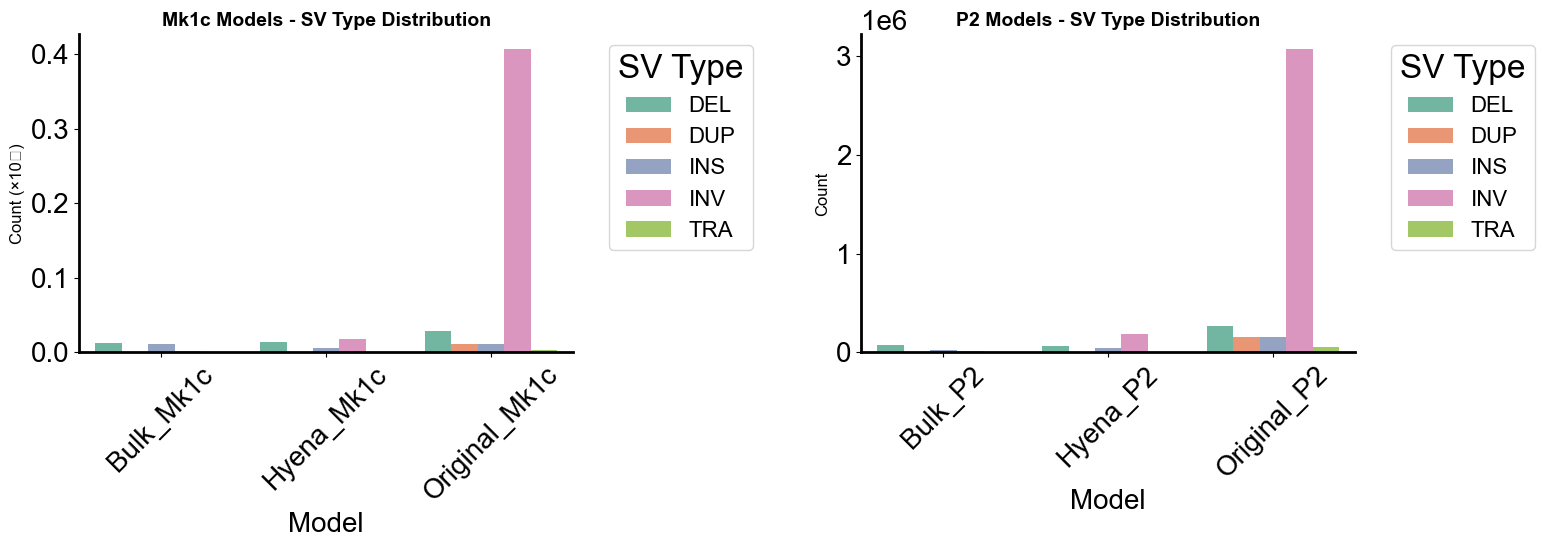

In [ ]:
# Melt the data and ensure Count column is numeric
melted_data = combined_data.melt(
    id_vars=["Model"], var_name="SV Type", value_name="Count"
)
melted_data["Count"] = pd.to_numeric(melted_data["Count"], errors="coerce")

# Remove rows with NaN values (which were non-numeric strings like "Reference")
melted_data = melted_data.dropna()

# Clean up SV Type labels by removing "_count" suffix
melted_data["SV Type"] = melted_data["SV Type"].str.replace("_count", "")

# Clean up Model labels for better readability
melted_data["Model"] = melted_data["Model"].str.replace("bulk", "Mk1c bulk")
melted_data["Model"] = melted_data["Model"].str.replace("original_mk1c", "Mk1c MDA")
melted_data["Model"] = melted_data["Model"].str.replace("hyena_mk1c", "Mk1c ChimeraLM")

# Group by Model and SV Type to get proper counts
grouped_data = melted_data.groupby(["Model", "SV Type"])["Count"].sum().reset_index()

# Create two separate figures - one for Mk1c models, one for P2 models
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Figure 1: All Mk1c Models - Grouped by Model with SV types as hue
mk1c_data = grouped_data[grouped_data["Model"].str.contains("Mk1c")]
sns.barplot(
    data=mk1c_data,
    x="Model",
    y="Count",
    hue="SV Type",
    palette="Set2",
    ax=ax1,
    dodge=True,
)
ax1.set_title("Mk1c Models - SV Type Distribution", fontsize=14, fontweight="bold")
ax1.set_ylabel("Count (×10⁶)", fontsize=12)
ax1.tick_params(axis="x", rotation=45)
ax1.legend(title="SV Type", bbox_to_anchor=(1.05, 1), loc="upper left")

# Format y-axis to show values in millions (1e6 scale)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x / 1e6:.1f}"))

sns.despine()

# Figure 2: All P2 Models - Grouped by Model with SV types as hue
p2_data = grouped_data[grouped_data["Model"].str.contains("P2")]
sns.barplot(
    data=p2_data,
    x="Model",
    y="Count",
    hue="SV Type",
    palette="Set2",
    ax=ax2,
    dodge=True,
)
ax2.set_title("P2 Models - SV Type Distribution", fontsize=14, fontweight="bold")
ax2.set_ylabel("Count", fontsize=12)
ax2.tick_params(axis="x", rotation=45)
ax2.legend(title="SV Type", bbox_to_anchor=(1.05, 1), loc="upper left")
sns.despine()

# Adjust layout to prevent label cutoff
plt.tight_layout()
fig.savefig("sv_pattern_distribution.pdf", dpi=300)

In [ ]:
# Import necessary libraries
from cProfile import label
import matplotlib.pyplot as plt


def draw_sv_type_support_statistics(sv_artifact_data, figsize=(15, 6), figname=None):
    # Figure 1: Basic Statistics - Stacked Bar Chart
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    ax1 = axs[0]
    # ax1.bar('Total Reads', sv_artifact_data['Total Reads'], label='Total Reads', color='lightgrey')
    ax1.bar(
        "Total Reads",
        sv_artifact_data["Non-supporting Reads"],
        label="Non-supporting Reads",
        color="salmon",
    )
    ax1.bar(
        "Total Reads",
        sv_artifact_data["Supporting SV Reads"],
        bottom=sv_artifact_data["Non-supporting Reads"],
        label="Supporting SV Reads",
        color="skyblue",
    )
    ax1.set_title("Basic Statistics", fontsize=14, fontweight="bold")
    ax1.set_ylabel("Number of Reads", fontsize=12)
    ax1.legend(loc="upper right")
    sns.despine()
    plt.tight_layout()

    # Figure 2: SV Type Support Statistics - Donut Pie Chart
    ax = axs[1]
    wedges, texts, autotexts = ax.pie(
        sv_artifact_data["SV Counts"],
        wedgeprops=dict(width=0.5),
        startangle=40,
        colors=plt.cm.Set2.colors,
        autopct="%1.1f%%",
    )
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1) / 2.0 + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(
            f"{sv_artifact_data['SV Types'][i]} ({autotexts[i].get_text()})",
            xy=(x, y),
            xytext=(1.8 * np.sign(x), 1.6 * y),
            horizontalalignment=horizontalalignment,
            **kw,
        )

    centre_circle = plt.Circle((0, 0), 0.70, fc="white")
    fig.gca().add_artist(centre_circle)
    ax.set_title("SV Type Support Statistics", fontsize=14, fontweight="bold")
    plt.tight_layout()

    if figname is not None:
        plt.savefig(figname, dpi=300)


In [154]:
p2_sv_artifact_data = {
    "Total Reads": 12193833,
    "Supporting SV Reads": 4300568,
    "Non-supporting Reads": 7893265,
    "SV Types": ["INV", "DEL", "DUP", "INS"],
    "SV Counts": [4348379, 251965, 169126, 147988],
}


In [155]:
mk1c_sv_artifact_data = {
    "Total Reads": 1571412,
    "Supporting SV Reads": 406283,
    "Non-supporting Reads": 1165129,
    "SV Types": ["INV", "DEL", "DUP", "INS"],
    "SV Counts": [404309, 16787, 10515, 5986],
}

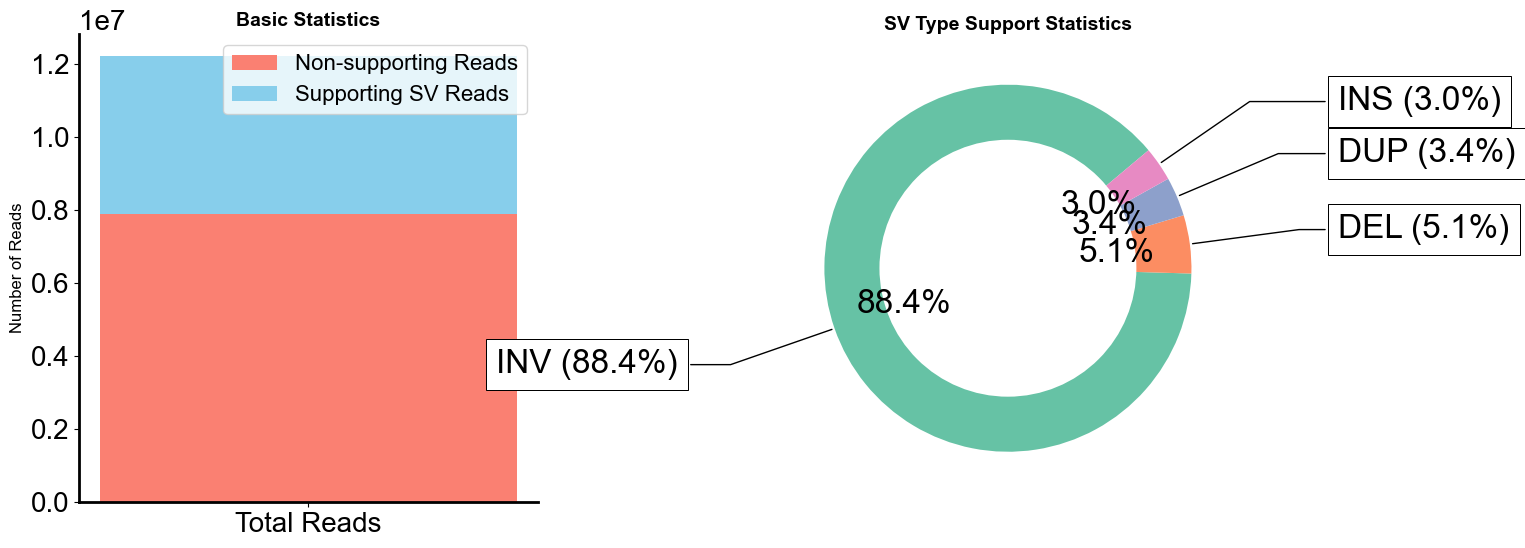

In [ ]:
draw_sv_type_support_statistics(
    p2_sv_artifact_data, figname="p2_sv_type_support_statistics.pdf"
)

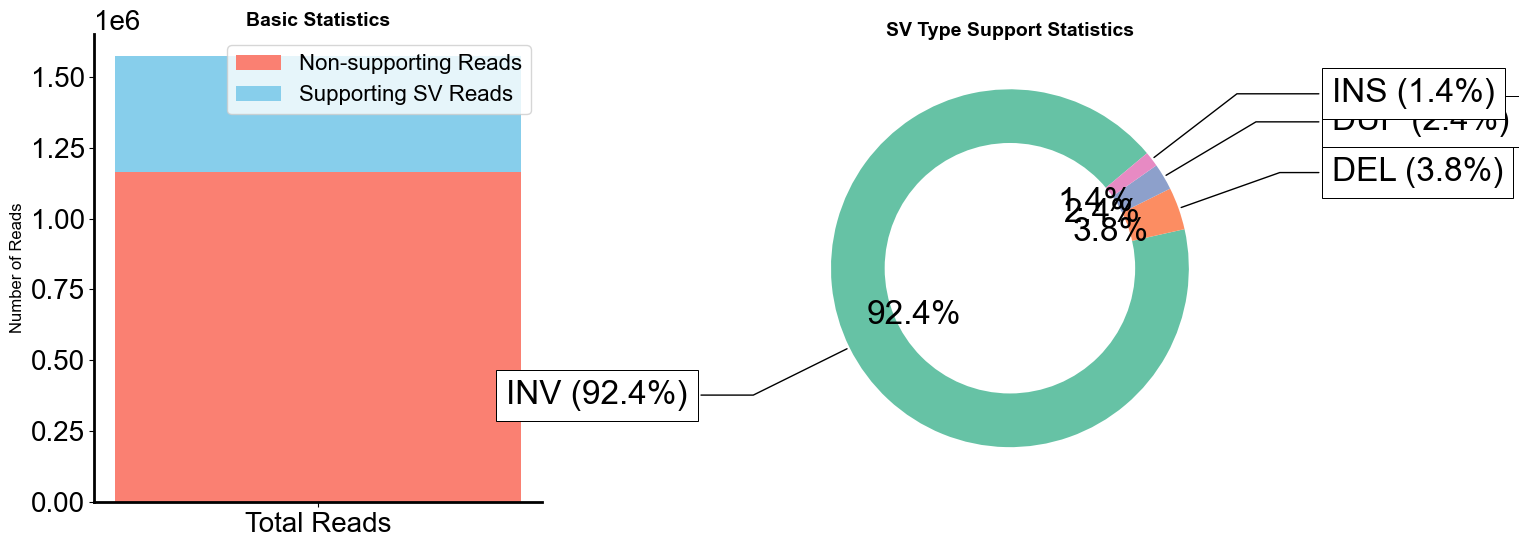

In [ ]:
draw_sv_type_support_statistics(
    mk1c_sv_artifact_data, figname="mk1c_sv_type_support_statistics.pdf"
)

# Benchmark


In [23]:
444197 + 7193

451390

In [42]:
# Define the new data
def construct_chimeric_info():
    samples_new = [
        "P2 WGA",
        "P2 Bulk",
        "P2 ChimeraLM",
        "mk1c WGA",
        "mk1c Bulk",
        "mk1c ChimeraLM",
    ]
    chimeric_reads_new = [12963576, 233740, 769743, 1666427, 28748, 82734]
    total_reads_new = [28027667, 10065403, 15833834, 7193945, 1140363, 5610252]
    df = pd.DataFrame(
        {
            "Sample": samples_new,
            "Chimeric Reads": chimeric_reads_new,
            "Total Reads": total_reads_new,
        }
    )
    df["Ratio"] = df["Chimeric Reads"] / df["Total Reads"]

    # add group column
    df["Group"] = df["Sample"].str.split(" ").str[0]
    # remove the group from the Sample column
    df["Sample"] = df["Sample"].str.split(" ").str[1]
    return df


In [43]:
df_chimeric_info = construct_chimeric_info()

In [44]:
df_chimeric_info

,Sample,Chimeric Reads,Total Reads,Ratio,Group
0,WGA,12963576,28027667,0.462528,P2
1,Bulk,233740,10065403,0.023222,P2
2,ChimeraLM,769743,15833834,0.048614,P2
3,WGA,1666427,7193945,0.231643,mk1c
4,Bulk,28748,1140363,0.025210,mk1c
5,ChimeraLM,82734,5610252,0.014747,mk1c


In [ ]:
def add_benchmarking_result(df):
    # Append benchmarking results for mk1c and P2 to the given DataFrame
    benchmarking_data = [
        {
            "Sample": "3rd-ChimeraMiner",
            "Chimeric Reads": 1666427,
            "Total Reads": 7193945,
            "Group": "mk1c",
        },
        {
            "Sample": "CADECT",
            "Chimeric Reads": 1590521,
            "Total Reads": 6779306,
            "Group": "mk1c",
        },
        {
            "Sample": "3rd-ChimeraMiner",
            "Chimeric Reads": 12963576,
            "Total Reads": 28027667,
            "Group": "P2",
        },
        {
            "Sample": "CADECT",
            "Chimeric Reads": 11889416,
            "Total Reads": 26097849,
            "Group": "P2",
        },
    ]

    benchmarking_df = pd.DataFrame(benchmarking_data)
    benchmarking_df["Ratio"] = (
        benchmarking_df["Chimeric Reads"] / benchmarking_df["Total Reads"]
    )

    return pd.concat([df, benchmarking_df], ignore_index=True).sort_values(by="Group")


df_chimeric_info_with_benchmark = add_benchmarking_result(df_chimeric_info)


In [53]:
df_chimeric_info_with_benchmark

,Sample,Chimeric Reads,Total Reads,Ratio,Group
0,WGA,12963576,28027667,0.462528,P2
1,Bulk,233740,10065403,0.023222,P2
2,ChimeraLM,769743,15833834,0.048614,P2
8,3rd-ChimeraMiner,12963576,28027667,0.462528,P2
9,CADECT,11889416,26097849,0.455571,P2
3,WGA,1666427,7193945,0.231643,mk1c
4,Bulk,28748,1140363,0.025210,mk1c
5,ChimeraLM,82734,5610252,0.014747,mk1c
6,3rd-ChimeraMiner,1666427,7193945,0.231643,mk1c
7,CADECT,1590521,6779306,0.234614,mk1c


In [ ]:
def draw_stack_bar_for_benchmarking(
    df,
    group="P2",
    figname=None,
    figsize=(12, 6),
    g1c="#9fc8c8ff",
    g2c="#009688ff",
    stack_plot=True,
    width=0.7,
    line_width=2,
    bar_order=["Bulk", "WGA", "3rd-ChimeraMiner", "CADECT", "ChimeraLM"],
):
    df_plot = df[df["Group"] == group]
    fig, ax = plt.subplots(figsize=figsize)
    # Compute Non-chimeric Reads
    df_plot = df_plot.copy()
    df_plot["Non-chimeric Reads"] = df_plot["Total Reads"] - df_plot["Chimeric Reads"]

    # Sort for preferred order if present
    order = [
        "WGA",
        "Bulk",
        "ChimericLM",
        "ChimeraLM",
        "3rd-ChimeraMiner",
        "CADECT",
    ]  # Added ChimericLM for typo compatibility
    df_plot["Sample"] = pd.Categorical(
        df_plot["Sample"], categories=order, ordered=True
    )
    df_plot = df_plot.sort_values("Sample")

    samples = df_plot["Sample"]
    chimeric_reads = df_plot["Chimeric Reads"]
    non_chimeric_reads = df_plot["Non-chimeric Reads"]

    # Ensure 'ChimericLM' typo is handled for order consistency
    ordered_samples = [s for s in bar_order if s in list(df_plot["Sample"].unique())]

    # Reindex chimeric and non-chimeric arrays to match desired bar_order
    df_plot = df_plot.set_index("Sample").reindex(ordered_samples)
    samples = df_plot.index

    chimeric_reads = df_plot["Chimeric Reads"]
    non_chimeric_reads = df_plot["Non-chimeric Reads"]

    if stack_plot:
        bar1 = ax.bar(
            samples,
            non_chimeric_reads,
            label="Non-chimeric Reads",
            color=g1c,
            width=width,
            linewidth=line_width,
            edgecolor="k",
        )
        bar2 = ax.bar(
            samples,
            chimeric_reads,
            bottom=non_chimeric_reads,
            label="Chimeric Reads",
            color=g2c,
            width=width,
            linewidth=line_width,
            edgecolor="k",
        )

        # Show chimeric read ratio at top of each bar
        for bar, chim, tot, ratio in zip(
            bar2, chimeric_reads, df_plot["Total Reads"], df_plot["Ratio"]
        ):
            height = bar.get_height() + bar.get_y()
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f"{ratio:.2%}",
                ha="center",
                va="bottom",
                fontsize=12,
                color="black",
            )

        ax.legend()
        ax.set_ylabel("No. of Reads")
    else:
        # show absoluate number of chimeric reads as bar
        bar1 = ax.bar(
            samples,
            chimeric_reads,
            color=g1c,
            width=width,
            linewidth=line_width,
            edgecolor="k",
        )
        ax.set_ylabel("No. of chimeric reads")

    sns.despine(offset=10, trim=True)

    if figname:
        fig.tight_layout()
        fig.savefig(figname, dpi=300)
    plt.show()

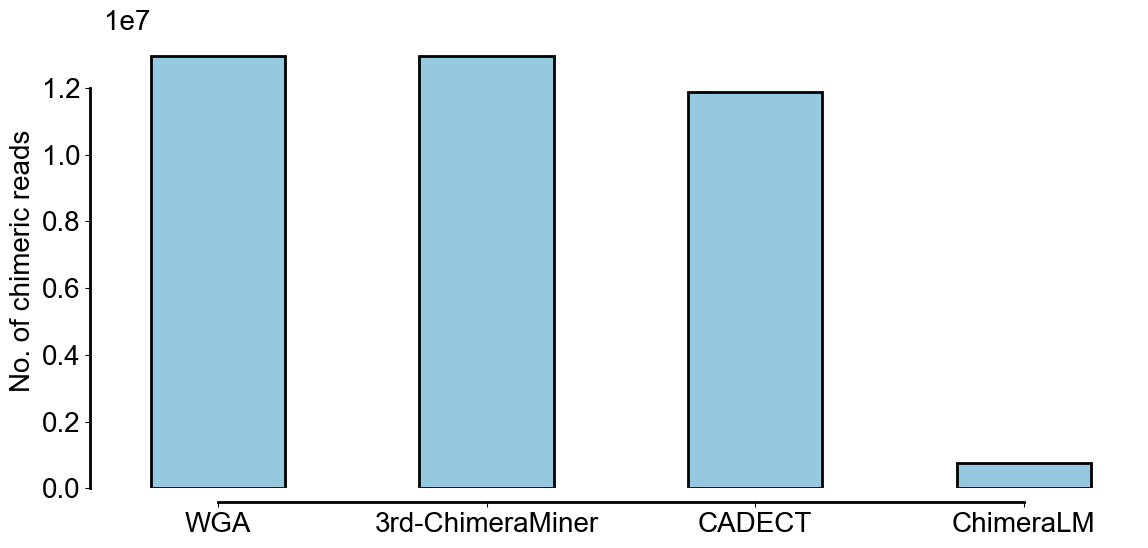

In [98]:
draw_stack_bar_for_benchmarking(
    df_chimeric_info_with_benchmark,
    stack_plot=False,
    g1c="#94c9dfff",
    group="P2",
    width=0.5,
    bar_order=["WGA", "3rd-ChimeraMiner", "CADECT", "ChimeraLM"],
    figname="hyena_p2_total_chimeric_reads_benchmark.pdf"
)

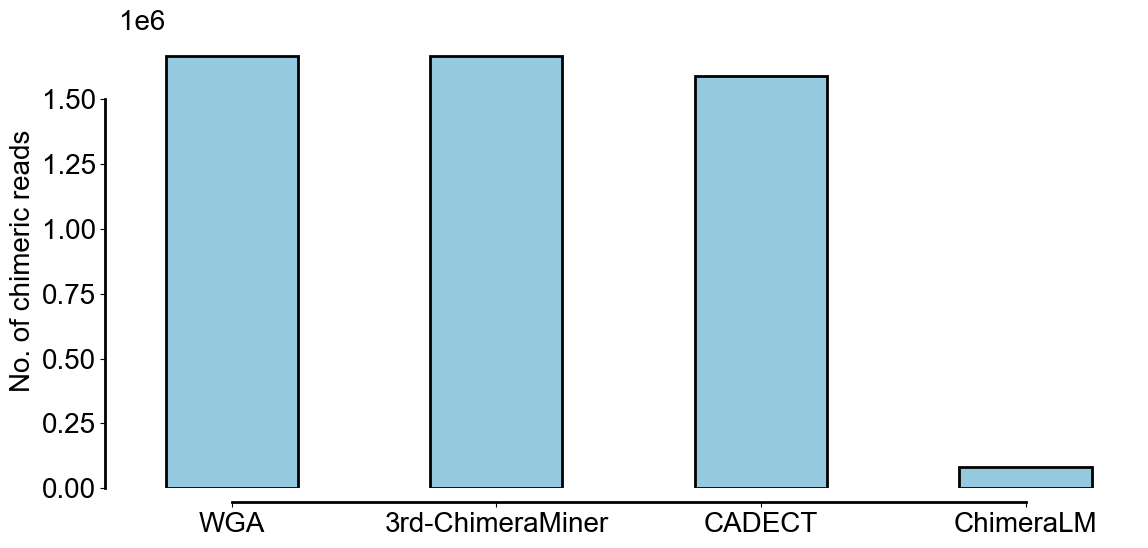

In [99]:
draw_stack_bar_for_benchmarking(
    df_chimeric_info_with_benchmark,
    stack_plot=False,
    g1c="#94c9dfff",
    group="mk1c",
    width=0.5,
    bar_order=["WGA", "3rd-ChimeraMiner", "CADECT", "ChimeraLM"],
    figname="hyena_mk1c_total_chimeric_reads_benchmark.pdf",
)

In [ ]:
# Here is the details for CADECT mk1c:
# Processing: ./CADECT_filtered.bam
# ==================================================
# Results
# ==================================================
# Total unique reads:       6,779,306
# Chimeric reads:           1,590,521
# Chimeric rate:              23.461%
# ==================================================
# 11:45
# Here is the details for CADECT P2:
# Processing: ./CADECT_filtered.bam
# ==================================================
# Results
# ==================================================
# Total unique reads:      26,097,849
# Chimeric reads:          11,889,416
# Chimeric rate:              45.557%

# hyena_mk1c_data = {
#     "WGA": {"Supported": 7193, "Unsupported": 444197, "total reads": 0},
#     "ChimeraLM": {"Supported": 6269, "Unsupported": 32163, "total reads": 0},
#     "SACRA": {"Supported": 7193, "Unsupported": 444197, "total reads": 0},
#     "3rd-ChimeraMiner": {"Supported": 7193, "Unsupported": 444197, "total reads": 0},
#     "CADECT": {"Supported": 0, "Unsupported": 1590521, "total reads": 0},
# }

# # Data for hyena_p2
# hyena_p2_data = {
#     "WGA": {"Supported": 8815, "Unsupported": 3601099, "total reads": 0},
#     "ChimeraLM": {"Supported": 8067, "Unsupported": 297503, "total reads": 0},
#     "SACRA": {"Supported": 8815, "Unsupported": 3601099, "total reads": 0},
#     "3rd-ChimeraMiner": {"Supported": 8815, "Unsupported": 3601099, "total reads": 0},
#     "CADECT": {"Supported": 0, "Unsupported": 11889416, "total reads": 0},
# }


def calculate_reduction_in_chimeric_reads(data):
    # Calculate total chimeric reads for each dataset
    total_chimeric_reads = {
        key: value["Supported"] + value["Unsupported"] for key, value in data.items()
    }

    # Calculate reduction in chimeric reads compared to MDA, excluding MDA itself
    mda_total = total_chimeric_reads["WGA"]
    reduction = {
        key: (mda_total - total) / mda_total * 100
        for key, total in total_chimeric_reads.items()
        if key != "WGA"
    }

    return reduction


def plot_reduction(data, figsize=(12, 8), figname=None):
    reduction = calculate_reduction_in_chimeric_reads(data)
    print(reduction)
    # Plotting
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(
        x=reduction.keys(),
        y=reduction.values(),
        color="skyblue",
        ax=ax,
        width=0.5,
        edgecolor="black",
        linewidth=2,
    )
    ax.set_ylabel("Reduction in Chimeric Reads (%)")

    sns.despine(offset=10, trim=True)
    plt.tight_layout()

    if figname is not None:
        plt.savefig(figname, dpi=300)


def plot_total_chimeric_reads(data, figsize=(12, 8), figname=None, format_ytick=False):
    total_chimeric_reads = {
        key: value["Supported"] + value["Unsupported"] for key, value in data.items()
    }
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(
        x=total_chimeric_reads.keys(),
        y=total_chimeric_reads.values(),
        order=[
            "WGA",
            "SACRA",
            "3rd-ChimeraMiner",
            "CADECT",
            "ChimeraLM",
        ],
        color="skyblue",
        ax=ax,
        width=0.5,
        edgecolor="black",
        linewidth=2,
    )
    if format_ytick:
        unit = 1000000
        ax.set_ylabel(f"Total Chimeric Reads (X {unit:.2E})")
        ax.set_yticklabels([f"{x / unit}" for x in ax.get_yticks()])
    else:
        ax.set_ylabel("Total Chimeric Reads")

    sns.despine(offset=10, trim=True)
    plt.tight_layout()
    if figname is not None:
        plt.savefig(figname, dpi=300)

/tmp/ipykernel_2433923/4222198600.py:97: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{x / unit}" for x in ax.get_yticks()])


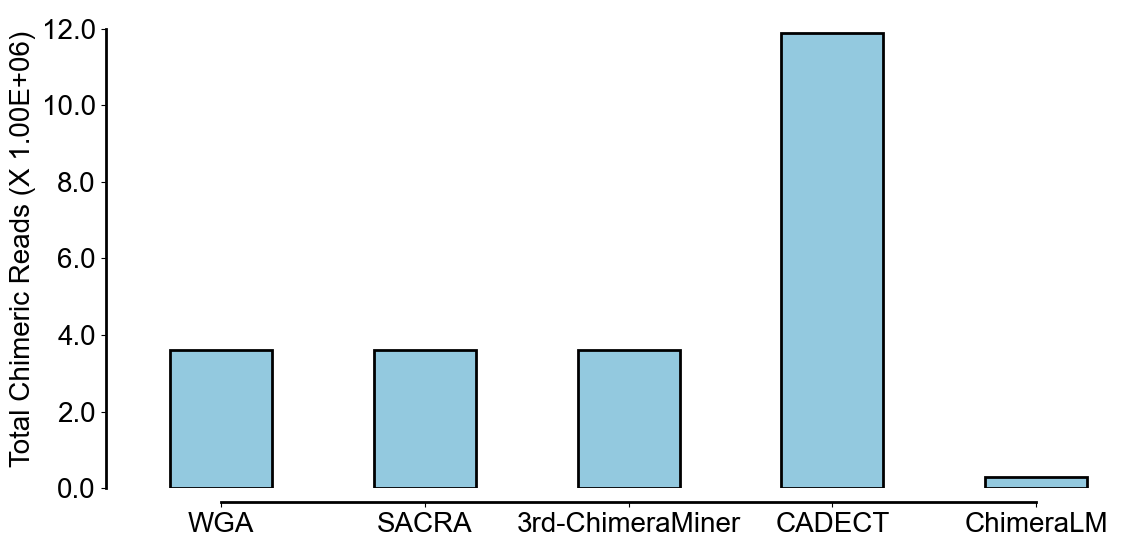

In [21]:
plot_total_chimeric_reads(
    hyena_p2_data,
    figsize=(12, 6),
    figname="hyena_p2_total_chimeric_reads_benchmark.pdf",
    format_ytick=True,
)

/tmp/ipykernel_2433923/4222198600.py:97: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{x / unit}" for x in ax.get_yticks()])


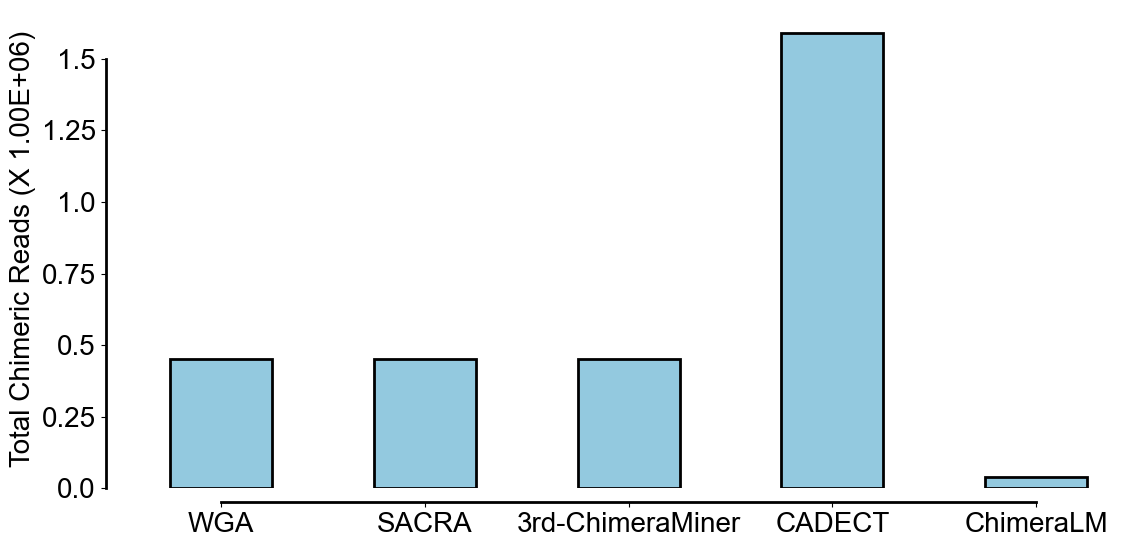

In [22]:
plot_total_chimeric_reads(
    hyena_mk1c_data,
    figsize=(12, 6),
    figname="hyena_mk1c_total_chimeric_reads_benchmark.pdf",
    format_ytick=True,
)

{'ChimeraLM Dataset': 91.5352554105167, 'SACRA': 0.0, '3rd-ChimeraMiner': 0.0}


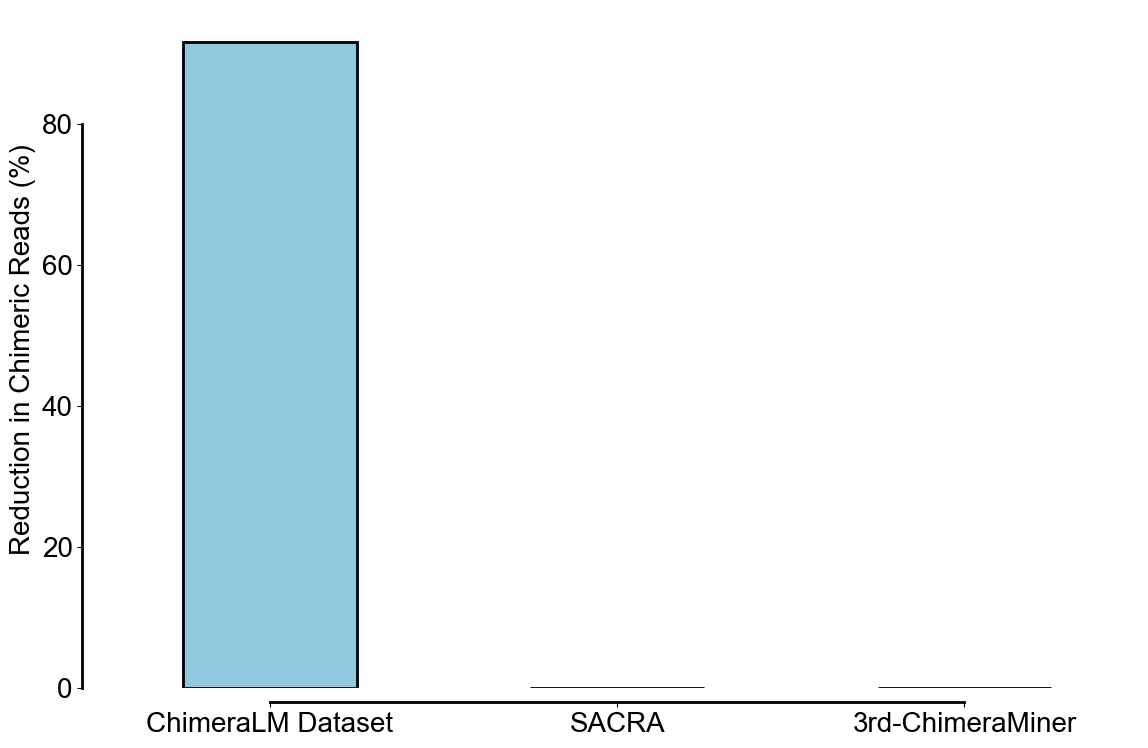

In [ ]:
plot_reduction(hyena_p2_data, figname="hyena_p2_reduction_benchmark.pdf")

{'ChimeraLM Dataset': 91.48585480404972, 'SACRA': 0.0, '3rd-ChimeraMiner': 0.0}


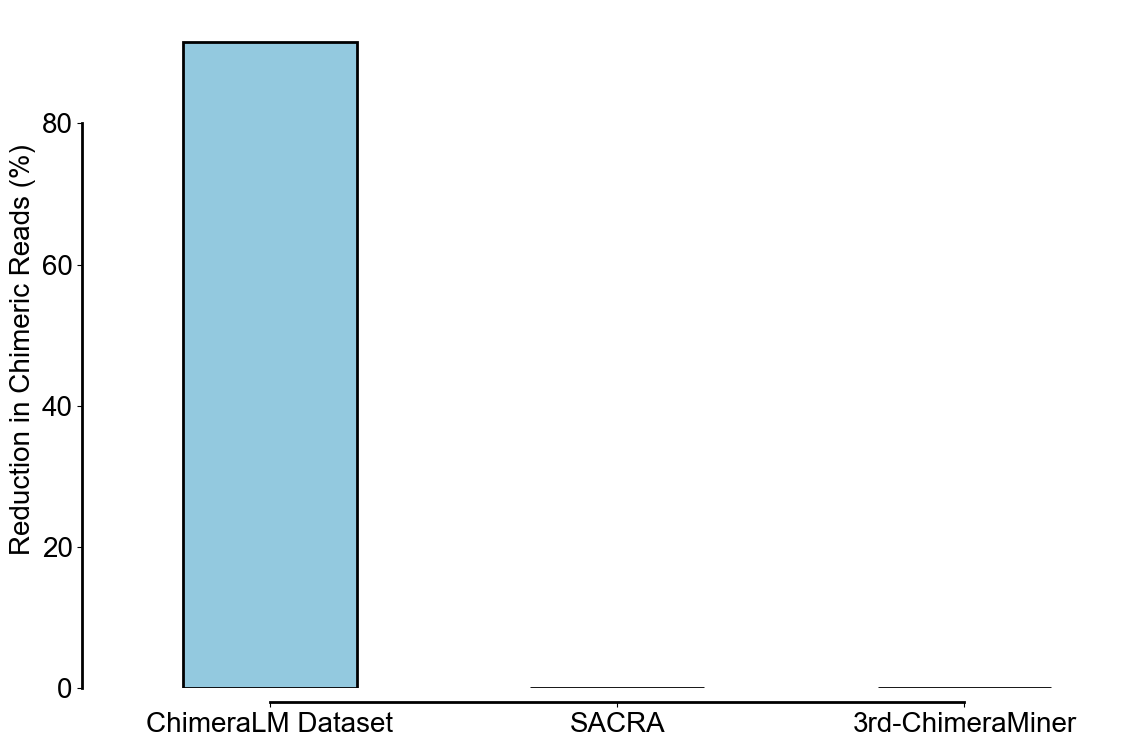

In [140]:
plot_reduction(hyena_mk1c_data, figname="hyena_mk1c_reduction_benchmark.pdf")

# Attention weights


In [195]:
# 6f4568e5-3543-48c7-a64b-f4010c03804c
# 5.3341041609175965e-14

# 1c66d41b-de5a-4e3d-b54d-69d41bfc3160
# 6.844094571419971e-15

In [ ]:
# 6f4568e5-3543-48c7-a64b-f4010c03804c

# chr1        1584378 Sniffles2.INV.16E1S0    C       <INV>   60      PASS    PRECISE;SVTYPE=INV;SVLEN=1562;END=1585940;SUPPORT=1;RNAMES=6f4568e5-3543-48c7-a64b-f4010c03804c;COVERAGE=1,1,2,3,1;STRAND=-;STDEV_LEN=0;STDEV_POS=0;VAF=1.000       GT:GQ:DR:DV     1/1:2:0:1

# Read name: 6f4568e5-3543-48c7-a64b-f4010c03804c
# Read length: 2540
# is forward: False
# Reference name: chr1
# Reference start: 1582828
# Reference end: 1584378
# Reference length: 1550
# Query alignment start: 11
# Query alignment end: 1554
# Query alignment length: 1543
# CIGAR string: 11S25M3I99M2D4M1I2M1D31M1I372M1D8M1I4M1D138M1I33M1D78M1D63M1D117M1D40M1I31M1D59M1D292M4D139M986S
# SA tag: chr1,1584867,+,30S1073M1D1437S,60,29;


# 1c66d41b-de5a-4e3d-b54d-69d41bfc3160

# chr1        1123612 Sniffles2.INV.16D1S0    A       <INV>   60      PASS    PRECISE;SVTYPE=INV;SVLEN=3709;END=1127321;SUPPORT=1;RNAMES=1c66d41b-de5a-4e3d-b54d-69d41bfc3160;COVERAGE=0,0,1,1,1;STRAND=-;STDEV_LEN=0;STDEV_POS=0;VAF=1.000       GT:GQ:DR:DV     1/1:2:0:1

# Read name: 1c66d41b-de5a-4e3d-b54d-69d41bfc3160
# Read length: 2802
# is forward: True
# Reference name: chr1
# Reference start: 1125166
# Reference end: 1127321
# Reference length: 2155
# Query alignment start: 0
# Query alignment end: 2149
# Query alignment length: 2149
# CIGAR string: 23M1I7M1D54M1I49M2D34M1D6M1D41M1D28M1I240M2D118M1D4M1I56M1I253M1D45M1D159M1D16M2I536M1D473M653S
# SA tag: chr1,1122965,-,12S646M2D2144S,60,5;


In [119]:
1584867 - 1584378

489

In [120]:
1125166 - 1123612


1554

In [ ]:
import pickle

# 1c66d41b-de5a-4e3d-b54d-69d41bfc3160_attention.pkl

with open(
    "./data/attention_weight/1c66d41b-de5a-4e3d-b54d-69d41bfc3160_attention.pkl", "rb"
) as f:
    attention_weights = pickle.load(f)

attention_weights

{'attention_data': {'position_data': {0: {'position_attention': np.float32(0.00023508341),
    'window_attention': array([2.3508341e-04, 2.1059420e-04, 2.5548760e-04, 3.2239518e-04,
           3.2470434e-04, 4.4081785e-04, 2.3957803e-04, 1.5317209e-04,
           8.7439854e-05, 1.8686656e-04, 1.7199729e-04, 1.5529121e-04,
           2.2014066e-04, 1.4408946e-04, 1.7446592e-04, 1.8072886e-04,
           1.4122899e-04, 1.9735344e-04, 1.7024025e-04, 1.8033492e-04,
           1.9032953e-04, 1.7815633e-04, 1.5224359e-04, 1.5048827e-04,
           1.2999598e-04, 1.6093011e-04, 1.8086829e-04, 1.7535083e-04,
           1.4402378e-04, 1.7197625e-04, 1.6070803e-04, 2.0751925e-04,
           2.0160788e-04, 1.5007443e-04, 1.2519868e-04, 1.0937422e-04,
           1.4133479e-04, 2.1051028e-04, 2.0964992e-04, 1.8818383e-04,
           1.6217679e-04, 1.7334496e-04, 1.7343405e-04, 1.8502265e-04,
           2.4198114e-04, 1.9810733e-04, 1.3986407e-04, 1.5904978e-04,
           1.5228796e-04, 1.7894447e-

In [ ]:
print(attention_weights["report"])

STATISTICAL ANALYSIS REPORT

1. POSITION SIGNIFICANCE TESTS
--------------------------------------------------

Position 0 (Unknown):
  Position vs Background (Z-test):
    - Position attention: 0.0002
    - Background mean: 0.0004 ± 0.0004
    - Z-score: -0.33
    - P-value: 0.7381
    - P-value (corrected): 1.0000
    - Significant: No
  Window vs Background:
    - Window mean: 0.0002 ± 0.0001
    - Background mean: 0.0004 ± 0.0004
    - Cohen's d: -0.47
    - T-test p-value: 0.0000
    - T-test p-value (corrected): 0.0000
    - T-test significant: Yes
    - Mann-Whitney p-value: 0.0000
    - Mann-Whitney p-value (corrected): 0.0000
    - Mann-Whitney significant: Yes

Position 2148 (Unknown):
  Position vs Background (Z-test):
    - Position attention: 0.0017
    - Background mean: 0.0003 ± 0.0003
    - Z-score: 4.87
    - P-value: 0.0000
    - P-value (corrected): 0.0000
    - Significant: Yes
  Window vs Background:
    - Window mean: 0.0012 ± 0.0010
    - Background mean: 0.0003 

In [ ]:
attention_weights["attention_data"]["position_data"]

{0: {'position_attention': np.float32(0.00023508341),
  'window_attention': array([2.3508341e-04, 2.1059420e-04, 2.5548760e-04, 3.2239518e-04,
         3.2470434e-04, 4.4081785e-04, 2.3957803e-04, 1.5317209e-04,
         8.7439854e-05, 1.8686656e-04, 1.7199729e-04, 1.5529121e-04,
         2.2014066e-04, 1.4408946e-04, 1.7446592e-04, 1.8072886e-04,
         1.4122899e-04, 1.9735344e-04, 1.7024025e-04, 1.8033492e-04,
         1.9032953e-04, 1.7815633e-04, 1.5224359e-04, 1.5048827e-04,
         1.2999598e-04, 1.6093011e-04, 1.8086829e-04, 1.7535083e-04,
         1.4402378e-04, 1.7197625e-04, 1.6070803e-04, 2.0751925e-04,
         2.0160788e-04, 1.5007443e-04, 1.2519868e-04, 1.0937422e-04,
         1.4133479e-04, 2.1051028e-04, 2.0964992e-04, 1.8818383e-04,
         1.6217679e-04, 1.7334496e-04, 1.7343405e-04, 1.8502265e-04,
         2.4198114e-04, 1.9810733e-04, 1.3986407e-04, 1.5904978e-04,
         1.5228796e-04, 1.7894447e-04], dtype=float32),
  'background_attention': array([2.0290590

In [2]:
pos = 2148

In [14]:
def draw_attention_weights(
    attention_weights,
    pos,
    color="#3c5488",
    window_color="#a00000",
    figname=None,
    window_size=100,
    figsize=(20, 6),
):
    """
    Draw attention weights with highlighted window region.

    Parameters:
    -----------
    attention_weights : dict
        Dictionary containing attention data
    pos : int
        Position to highlight
    color : str
        Color for the attention weights line
    window_color : str
        Color for the window region
    figname : str
        Filename to save the figure
    window_size : int
        Size of the window region (±window_size around pos)
    figsize : tuple
        Figure size
    """
    position_data = attention_weights["attention_data"]["position_data"][pos]
    all_attention = attention_weights["attention_data"]["all_attention"]
    overall_mean_attention = np.mean(all_attention)
    seq = attention_weights["seq"]

    assert len(all_attention) == len(seq), (
        f"len(all_attention) = {len(all_attention)}, len(seq) = {len(seq)}"
    )

    # Calculate window boundaries
    window_size = window_size // 2
    window_start = max(0, pos - window_size)
    window_end = min(len(seq), pos + window_size)

    # Create the plot
    fig, ax = plt.subplots(figsize=figsize)

    # Plot the attention weights line
    ax.plot(
        range(len(seq)),
        all_attention,
        color=color,
        linewidth=1.2,
        label="Attention Weights",
    )

    # Add shaded window region
    ax.axvspan(
        window_start, window_end, alpha=0.3, color=window_color, label="Window Region"
    )

    # Add overall mean attention line
    ax.axhline(
        overall_mean_attention,
        color="black",
        linestyle="--",
        linewidth=1.5,
        label="Overall Mean Attention",
    )

    # add vertical line at pos
    ax.axvline(pos, color="red", linestyle="-", linewidth=2)

    # Labels and formatting
    ax.set_xlabel("Sequence", fontsize=20)
    ax.set_ylabel("Attention Weights", fontsize=20)
    ax.legend(loc="upper right", fontsize=14, frameon=True)

    # Clean up the plot
    sns.despine()
    plt.tight_layout()

    # Save the figure
    if figname is not None:
        plt.savefig(figname, dpi=300, bbox_inches="tight")

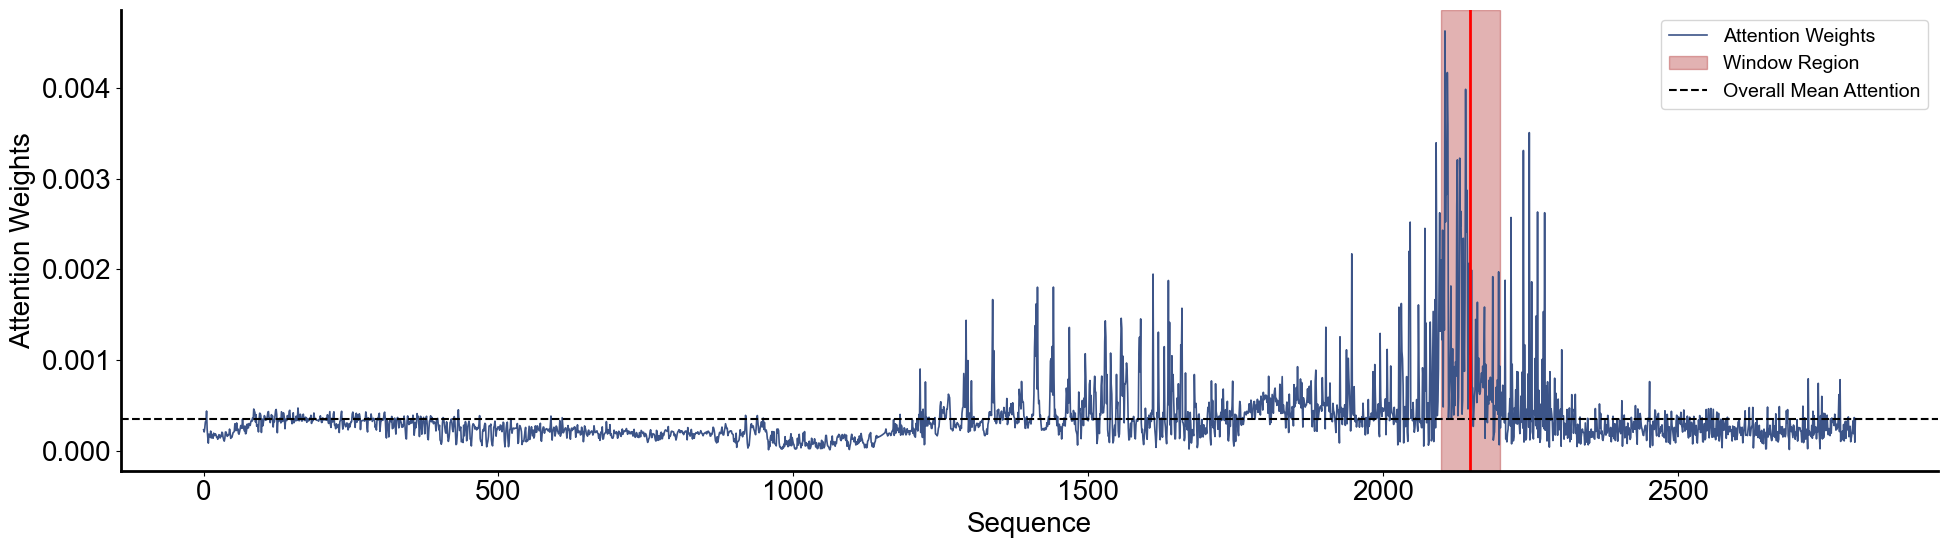

In [15]:
draw_attention_weights(
    attention_weights,
    pos=2148,
    color="#3c5488",
    window_color="#a00000",
    # figname="1c66d41b-de5a-4e3d-b54d-69d41bfc3160_attention_weights_2148.pdf",
)

In [ ]:
def draw_window_attention_weights(
    attention_weights,
    pos,
    colors=["#9fc8c8ff", "#00a087ff"],
    figname=None,
    figsize=(6, 6),
):
    """
    Draw boxplot comparing window vs background attention weights.

    Parameters:
    -----------
    attention_weights : dict
        Dictionary containing attention data
    pos : int
        Position to analyze
    colors : list
        List of two colors [background_color, window_color]
    figname : str
        Filename to save the figure
    figsize : tuple
        Figure size
    """
    # Extract position data
    position_data = attention_weights["attention_data"]["position_data"][pos]
    background_attention = position_data["background_attention"]
    window_attention = position_data["window_attention"]

    # Create figure
    plt.figure(figsize=figsize)

    # Prepare data for boxplot
    data_to_plot = [background_attention, window_attention]
    labels = ["Background", "Window"]

    # Create boxplot
    bp = plt.boxplot(
        data_to_plot,
        labels=labels,
        patch_artist=True,
        widths=0.6,
        showfliers=True,
        flierprops=dict(
            marker="o",
            markerfacecolor="white",
            markeredgecolor="black",
            markersize=6,
            linestyle="none",
            markeredgewidth=1,
        ),
        medianprops=dict(color="black", linewidth=2),
        boxprops=dict(linewidth=1.5),
        whiskerprops=dict(linewidth=1.5),
        capprops=dict(linewidth=1.5),
    )

    # Color the boxes
    for patch, color in zip(bp["boxes"], colors):
        patch.set_facecolor(color)
        patch.set_edgecolor("black")

    # Labels and formatting
    plt.ylabel("Attention Weights", fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    # Clean up the plot
    sns.despine()
    plt.tight_layout()

    # Save the figure
    if figname is not None:
        plt.savefig(figname, dpi=300, bbox_inches="tight")

    plt.show()


/var/folders/s3/vs6nrrg52sdfjk3z90p7ndt94gg4tq/T/ipykernel_99661/2253131374.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(


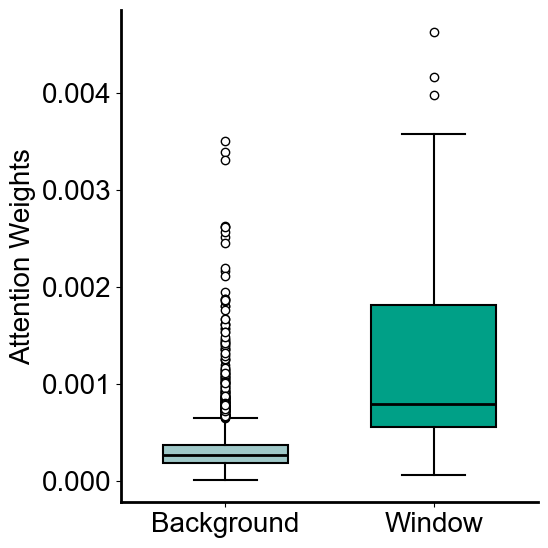

In [200]:
draw_window_attention_weights(
    attention_weights,
    pos=pos,
    colors=[
        "#9fc8c8ff",
        "#00a087ff",
    ],
    figname="1c66d41b-de5a-4e3d-b54d-69d41bfc3160_window_attention_weights_boxplot_2148.pdf",
)

# SV intersection


 | Model           | Dataset | Bulk_SVs | WGA_SVs | ChimeraLM_SVs | Bulk_WGA_Intersection | Bulk_ChimeraLM_Intersection |
 |-----------------|---------|----------|-----------|--------------|-------------------------|----------------------------|
 | Hyena_P2_765108 | Mk1c    | 26943    | 460173    | 39195        | 5330                    | 4616                       |
 | Hyena_P2_765108 | P2      | 119242   | 3691685   | 314521       | 13426                   | 8987                       |

In [ ]:
113601099 + 8815

3609914

# MinION Mk1c
WGA_precision = 5330 / 460173 = 1.16%
ChimeraLM_precision = 4616 / 39195 = 11.78%
Enrichment = 11.78 / 1.16 = 10.2×


# PromethION P2  
WGA_precision = 13426 / 3691685 = 0.36%
ChimeraLM_precision = 8987 / 314521 = 2.86%
Enrichment = 2.86 / 0.36 = 7.9×

# Retention of true SVs
Mk1c_retention = 4616 / 5330 = 86.6%
P2_retention = 8987 / 13426 = 66.9%a

In [ ]:
intersection_data = {
    "MinION_Mk1c": {
        "bulk": 26943,
        "wga": 460173,
        "chimeraLM": 39195,
        "wga_intersection": 5330,
        "chimeraLM_intersection": 4616,
    },
    "PromethION_P2": {
        "bulk": 119242,
        "wga": 3691685,
        "chimeraLM": 314521,
        "wga_intersection": 13426,
        "chimeraLM_intersection": 8987,
    },
}


def draw_intersection_comparison(data, figsize=(14, 6), figname=None):
    import numpy as np
    import matplotlib.patches as mpatches

    # Calculate metrics
    def calculate_metrics(data_dict):
        metrics = {}
        for platform, values in data_dict.items():
            wga_precision = (values["wga_intersection"] / values["wga"]) * 100
            chimeraLM_precision = (
                values["chimeraLM_intersection"] / values["chimeraLM"]
            ) * 100
            enrichment = chimeraLM_precision / wga_precision
            retention = (
                values["chimeraLM_intersection"] / values["wga_intersection"]
            ) * 100

            metrics[platform] = {
                "wga_precision": wga_precision,
                "chimeraLM_precision": chimeraLM_precision,
                "enrichment": enrichment,
                "retention": retention,
                "wga_false_positive": values["wga"] - values["wga_intersection"],
                "chimeraLM_false_positive": values["chimeraLM"]
                - values["chimeraLM_intersection"],
            }
        return metrics

    metrics = calculate_metrics(data)

    # Create figure with two panels
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

    # ============ PANEL A: Precision Improvement ============
    x_positions = np.array([0, 1, 3, 4])
    platforms = ["MinION Mk1c", "MinION Mk1c", "PromethION P2", "PromethION P2"]
    bar_type = ["WGA", "WGA+ChimeraLM", "WGA", "WGA+ChimeraLM"]

    precisions = [
        metrics["MinION_Mk1c"]["wga_precision"],
        metrics["MinION_Mk1c"]["chimeraLM_precision"],
        metrics["PromethION_P2"]["wga_precision"],
        metrics["PromethION_P2"]["chimeraLM_precision"],
    ]

    colors = ["#EF5350", "#66BB6A", "#EF5350", "#66BB6A"]
    edge_colors = ["#C62828", "#2E7D32", "#C62828", "#2E7D32"]

    bars = ax1.bar(
        x_positions,
        precisions,
        width=0.6,
        color=colors,
        edgecolor=edge_colors,
        linewidth=2,
    )

    # Add value labels on bars
    for i, (x, p) in enumerate(zip(x_positions, precisions)):
        ax1.text(
            x,
            p + 0.5,
            f"{p:.1f}%",
            ha="center",
            va="bottom",
            fontsize=11,
            fontweight="bold",
        )

    # Add enrichment arrows and labels
    # MinION arrow
    ax1.annotate(
        "",
        xy=(0.5, metrics["MinION_Mk1c"]["wga_precision"] - 0.3),
        xytext=(0.5, metrics["MinION_Mk1c"]["chimeraLM_precision"] - 0.3),
        arrowprops=dict(arrowstyle="->", color="#FF6F00", lw=2.5),
    )
    ax1.text(
        0.3,
        6,
        f"{metrics['MinION_Mk1c']['enrichment']:.1f}×",
        fontsize=11,
        fontweight="bold",
        color="#FF6F00",
    )

    # PromethION arrow
    ax1.annotate(
        "",
        xy=(3.5, metrics["PromethION_P2"]["wga_precision"] - 0.1),
        xytext=(3.5, metrics["PromethION_P2"]["chimeraLM_precision"] - 0.1),
        arrowprops=dict(arrowstyle="->", color="#FF6F00", lw=2.5),
    )
    ax1.text(
        3.3,
        1.5,
        f"{metrics['PromethION_P2']['enrichment']:.1f}×",
        fontsize=11,
        fontweight="bold",
        color="#FF6F00",
    )

    # Formatting panel A
    ax1.set_ylabel("Intersection with Bulk (%)", fontsize=12, fontweight="bold")
    ax1.set_xticks([0.5, 3.5])
    ax1.set_xticklabels(
        ["MinION Mk1c", "PromethION P2"], fontsize=12, fontweight="bold"
    )
    ax1.set_ylim(0, 14)
    ax1.grid(axis="y", alpha=0.3, linestyle="--")
    ax1.set_axisbelow(True)
    ax1.spines["top"].set_visible(False)
    ax1.spines["right"].set_visible(False)

    # Legend for panel A
    legend_elements_a = [
        mpatches.Rectangle(
            (0, 0),
            1,
            1,
            facecolor="#EF5350",
            edgecolor="#C62828",
            linewidth=2,
            label="WGA",
        ),
        mpatches.Rectangle(
            (0, 0),
            1,
            1,
            facecolor="#66BB6A",
            edgecolor="#2E7D32",
            linewidth=2,
            label="WGA + ChimeraLM",
        ),
    ]
    ax1.legend(handles=legend_elements_a, loc="best", frameon=True, fontsize=10)
    ax1.text(-0.15, 1.05, "a", transform=ax1.transAxes, fontsize=16, fontweight="bold")

    # ============ PANEL B: Redesigned for Clarity ============
    # Show two metrics side by side:
    # 1. Total SVs (showing reduction)
    # 2. Supported SVs (SVs supported by bulk sequencing) (showing retention)

    x_positions_b = np.array([0, 1, 2.5, 3.5, 5.5, 6.5, 8, 9])
    bar_width = 0.8

    # Data in millions
    minion_wga_total = data["MinION_Mk1c"]["wga"] / 1e6
    minion_cl_total = data["MinION_Mk1c"]["chimeraLM"] / 1e6
    minion_wga_true = (
        data["MinION_Mk1c"]["wga_intersection"] / 1e3
    )  # in thousands for scaling
    minion_cl_true = data["MinION_Mk1c"]["chimeraLM_intersection"] / 1e3

    prom_wga_total = data["PromethION_P2"]["wga"] / 1e6
    prom_cl_total = data["PromethION_P2"]["chimeraLM"] / 1e6
    prom_wga_true = data["PromethION_P2"]["wga_intersection"] / 1e3
    prom_cl_true = data["PromethION_P2"]["chimeraLM_intersection"] / 1e3

    # Create twin axis for different scales
    ax2_twin = ax2.twinx()

    # Plot Total SVs (left side of each group) - main axis
    total_bars = [minion_wga_total, minion_cl_total, prom_wga_total, prom_cl_total]
    total_positions = [0, 1, 5.5, 6.5]
    bars_total = ax2.bar(
        total_positions,
        total_bars,
        bar_width,
        color="#BDBDBD",
        edgecolor="#757575",
        linewidth=1.5,
        label="Total SVs",
        alpha=0.8,
    )

    # Plot Supported SVs (right side of each group) - twin axis
    true_bars = [minion_wga_true, minion_cl_true, prom_wga_true, prom_cl_true]
    true_positions = [2.5, 3.5, 8, 9]
    bars_true = ax2_twin.bar(
        true_positions,
        true_bars,
        bar_width,
        color="#66BB6A",
        edgecolor="#2E7D32",
        linewidth=1.5,
        label="Supported SVs (supported by bulk)",
        alpha=0.9,
    )

    # Labels for total SVs
    ax2.text(
        0,
        minion_wga_total + 0.15,
        f"{minion_wga_total:.2f}M",
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="bold",
    )
    ax2.text(
        1,
        minion_cl_total + 0.02,
        f"{minion_cl_total:.2f}M",
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="bold",
    )
    ax2.text(
        5.5,
        prom_wga_total + 0.15,
        f"{prom_wga_total:.2f}M",
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="bold",
    )
    ax2.text(
        6.5,
        prom_cl_total + 0.15,
        f"{prom_cl_total:.2f}M",
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="bold",
    )

    # Labels for supported SVs
    ax2_twin.text(
        2.5,
        minion_wga_true + 0.5,
        f"{minion_wga_true:.1f}k",
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="bold",
        color="#2E7D32",
    )
    ax2_twin.text(
        3.5,
        minion_cl_true + 0.5,
        f"{minion_cl_true:.1f}k",
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="bold",
        color="#2E7D32",
    )
    ax2_twin.text(
        8,
        prom_wga_true + 0.5,
        f"{prom_wga_true:.1f}k",
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="bold",
        color="#2E7D32",
    )
    ax2_twin.text(
        9,
        prom_cl_true + 0.5,
        f"{prom_cl_true:.1f}k",
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="bold",
        color="#2E7D32",
    )

    # Add retention percentage with arrows for supported SVs
    # MinION
    ax2_twin.annotate(
        "",
        xy=(3.5, minion_cl_true - 0.2),
        xytext=(2.5, minion_wga_true - 0.2),
        arrowprops=dict(arrowstyle="->", color="#2E7D32", lw=2),
    )
    ax2_twin.text(
        3,
        minion_wga_true + 1.5,
        f"{metrics['MinION_Mk1c']['retention']:.0f}%\nretained",
        ha="center",
        fontsize=9,
        color="#2E7D32",
        fontweight="bold",
    )

    # PromethION
    ax2_twin.annotate(
        "",
        xy=(9, prom_cl_true - 0.2),
        xytext=(8, prom_wga_true - 0.2),
        arrowprops=dict(arrowstyle="->", color="#2E7D32", lw=2),
    )
    ax2_twin.text(
        8.5,
        prom_wga_true + 1.5,
        f"{metrics['PromethION_P2']['retention']:.0f}%\nretained",
        ha="center",
        fontsize=9,
        color="#2E7D32",
        fontweight="bold",
    )

    # Add reduction percentage for total SVs
    reduction_minion = (1 - minion_cl_total / minion_wga_total) * 100
    reduction_prom = (1 - prom_cl_total / prom_wga_total) * 100

    ax2.text(
        0.5,
        max(minion_wga_total, minion_cl_total) * 0.5,
        f"{reduction_minion:.0f}%\nreduction",
        ha="center",
        fontsize=9,
        color="#757575",
        fontweight="bold",
    )
    ax2.text(
        6,
        max(prom_wga_total, prom_cl_total) * 0.5,
        f"{reduction_prom:.0f}%\nreduction",
        ha="center",
        fontsize=9,
        color="#757575",
        fontweight="bold",
    )

    # Formatting
    ax2.set_ylabel("Total SVs (×10$^{6}$)", fontsize=11, fontweight="bold")
    ax2_twin.set_ylabel(
        "Supported SVs (×10$^{3}$)", fontsize=11, fontweight="bold", color="#2E7D32"
    )
    ax2_twin.tick_params(axis="y", labelcolor="#2E7D32")

    # X-axis labels
    ax2.set_xticks([0, 1, 2.5, 3.5, 5.5, 6.5, 8, 9])
    ax2.set_xticklabels(
        ["WGA", "+CL", "WGA", "+CL", "WGA", "+CL", "WGA", "+CL"], fontsize=9, rotation=0
    )

    # Add section labels
    ax2.text(
        0.5,
        -0.5,
        "Total SVs",
        ha="center",
        fontsize=10,
        fontweight="bold",
        transform=ax2.get_xaxis_transform(),
        color="#757575",
    )
    ax2.text(
        3,
        -0.5,
        "Supported SVs",
        ha="center",
        fontsize=10,
        fontweight="bold",
        transform=ax2.get_xaxis_transform(),
        color="#2E7D32",
    )
    ax2.text(
        6,
        -0.5,
        "Total SVs",
        ha="center",
        fontsize=10,
        fontweight="bold",
        transform=ax2.get_xaxis_transform(),
        color="#757575",
    )
    ax2.text(
        8.5,
        -0.5,
        "Supported SVs",
        ha="center",
        fontsize=10,
        fontweight="bold",
        transform=ax2.get_xaxis_transform(),
        color="#2E7D32",
    )

    # Platform labels
    ax2.text(
        1.75,
        -0.8,
        "MinION Mk1c",
        ha="center",
        fontsize=12,
        fontweight="bold",
        transform=ax2.get_xaxis_transform(),
    )
    ax2.text(
        7.25,
        -0.8,
        "PromethION P2",
        ha="center",
        fontsize=12,
        fontweight="bold",
        transform=ax2.get_xaxis_transform(),
    )

    ax2.set_ylim(0, 4.2)
    ax2_twin.set_ylim(0, 16)
    ax2.grid(axis="y", alpha=0.3, linestyle="--")
    ax2.set_axisbelow(True)
    ax2.spines["top"].set_visible(False)
    ax2_twin.spines["top"].set_visible(False)

    ax2.text(-0.15, 1.05, "b", transform=ax2.transAxes, fontsize=16, fontweight="bold")
    ax2.set_title(
        "SV Filtering: Reduction vs Retention", fontsize=13, fontweight="bold", pad=10
    )

    # # Add note
    # fig.text(
    #     0.5,
    #     0.02,
    #     "ChimeraLM removes ~91% of total SVs while retaining 67-87% of SVs supported by bulk sequencing",
    #     ha="center",
    #     fontsize=10,
    #     style="italic",
    #     color="#666",
    # )

    plt.tight_layout(rect=[0, 0.04, 1, 0.96])

    if figname:
        plt.savefig(figname, bbox_inches="tight")

    # Print summary
    print("\n" + "=" * 60)
    print("SUMMARY STATISTICS")
    print("=" * 60)
    for platform, m in metrics.items():
        print(f"\n{platform}:")
        print(f"  WGA Precision: {m['wga_precision']:.2f}%")
        print(f"  ChimeraLM Precision: {m['chimeraLM_precision']:.2f}%")
        print(f"  Enrichment: {m['enrichment']:.1f}×")
        print(f"  Retention of supported SVs: {m['retention']:.1f}%")



SUMMARY STATISTICS

MinION_Mk1c:
  WGA Precision: 1.16%
  ChimeraLM Precision: 11.78%
  Enrichment: 10.2×
  Retention of supported SVs: 86.6%

PromethION_P2:
  WGA Precision: 0.36%
  ChimeraLM Precision: 2.86%
  Enrichment: 7.9×
  Retention of supported SVs: 66.9%


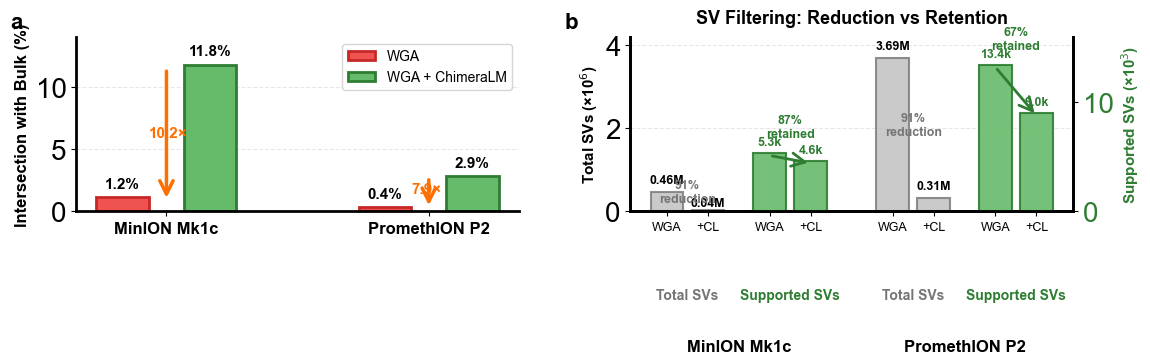

In [51]:
draw_intersection_comparison(
    intersection_data,
    figsize=(12, 10),
)


SUMMARY STATISTICS

MinION_Mk1c:
  WGA Precision: 1.16%
  ChimeraLM Precision: 11.78%
  Enrichment: 10.2×
  Retention of true SVs: 86.6%

PromethION_P2:
  WGA Precision: 0.36%
  ChimeraLM Precision: 2.86%
  Enrichment: 7.9×
  Retention of true SVs: 66.9%


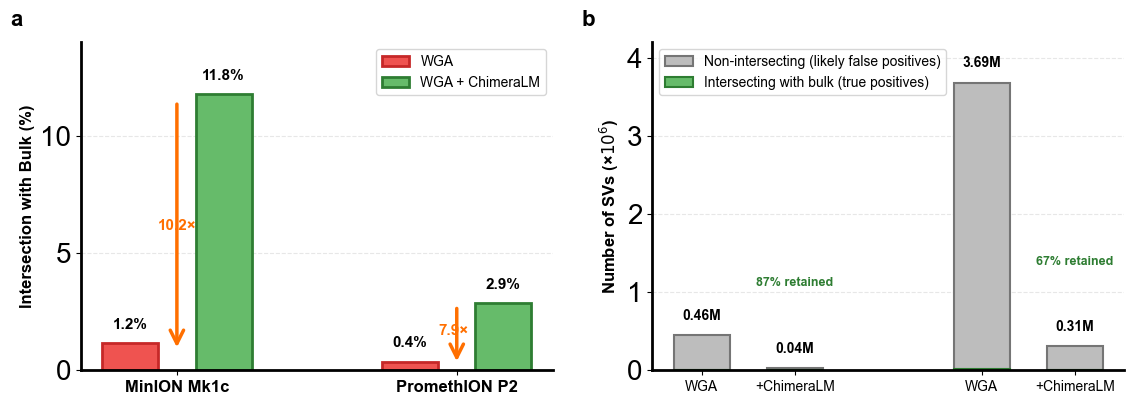

In [ ]:
draw_intersection_comparison(
    intersection_data,
    figsize=(12, 5),
    figname="chimeralm_sv_filtering_efficiency_with_bulk_intersection.pdf",
)

<BarContainer object of 2 artists>

<BarContainer object of 2 artists>

Text(0, 0.5, 'Intersection Count')

Text(0.5, 1.0, 'Absolute Intersection with Bulk')

[Text(0, 0, 'Mk1c'), Text(1, 0, 'P2')]

<BarContainer object of 2 artists>

<BarContainer object of 2 artists>

Text(0, 0.5, 'Intersection Ratio (%)')

Text(0.5, 1.0, 'Intersection Ratio (Bulk ∩ X / X)')

[Text(0, 0, 'Mk1c'), Text(1, 0, 'P2')]

Text(0, 10, '10.2x')

Text(0, 10, '7.9x')

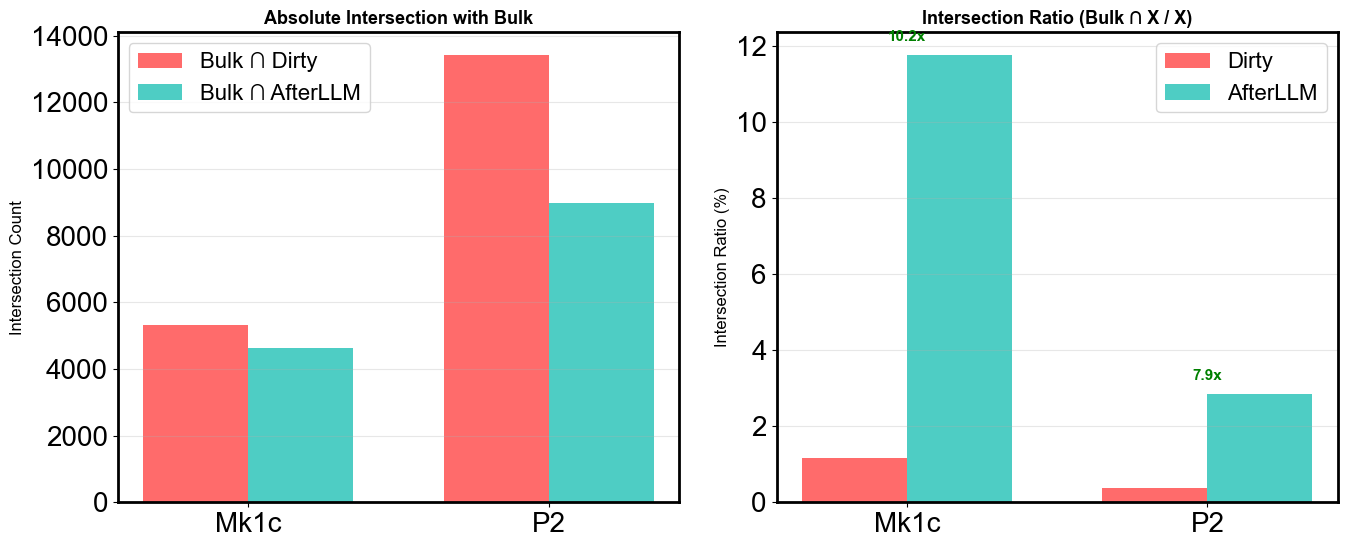

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Intersection Counts
x = np.arange(len(datasets))
width = 0.35

ax1.bar(x - width / 2, [5330, 13426], width, label="Bulk ∩ Dirty", color="#FF6B6B")
ax1.bar(x + width / 2, [4616, 8987], width, label="Bulk ∩ AfterLLM", color="#4ECDC4")
ax1.set_ylabel("Intersection Count", fontsize=12)
ax1.set_title("Absolute Intersection with Bulk", fontsize=13, fontweight="bold")
ax1.set_xticks(x)
ax1.set_xticklabels(datasets)
ax1.legend()
ax1.grid(axis="y", alpha=0.3)

# Plot 2: Intersection Ratios with Fold-Change
ax2.bar(x - width / 2, dirty_ratio, width, label="Dirty", color="#FF6B6B")
ax2.bar(x + width / 2, afterllm_ratio, width, label="AfterLLM", color="#4ECDC4")
ax2.set_ylabel("Intersection Ratio (%)", fontsize=12)
ax2.set_title("Intersection Ratio (Bulk ∩ X / X)", fontsize=13, fontweight="bold")
ax2.set_xticks(x)
ax2.set_xticklabels(datasets)
ax2.legend()
ax2.grid(axis="y", alpha=0.3)

# Add fold-change annotations
for i, dataset in enumerate(datasets):
    fold_change = afterllm_ratio[i] / dirty_ratio[i]
    ax2.annotate(
        f"{fold_change:.1f}x",
        xy=(i, afterllm_ratio[i]),
        xytext=(0, 10),
        textcoords="offset points",
        ha="center",
        fontsize=11,
        fontweight="bold",
        color="green",
    )

plt.tight_layout()
plt.show()


Generating Mk1c plots...
Generating P2 plots...


/Users/ylk4626/miniforge3/envs/chimera/lib/python3.10/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/Users/ylk4626/miniforge3/envs/chimera/lib/python3.10/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we ar

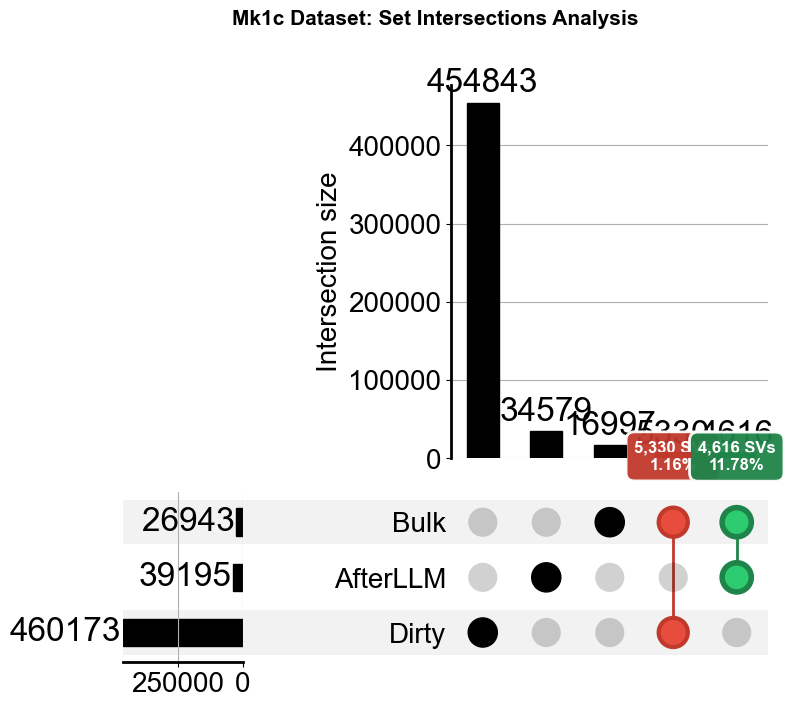

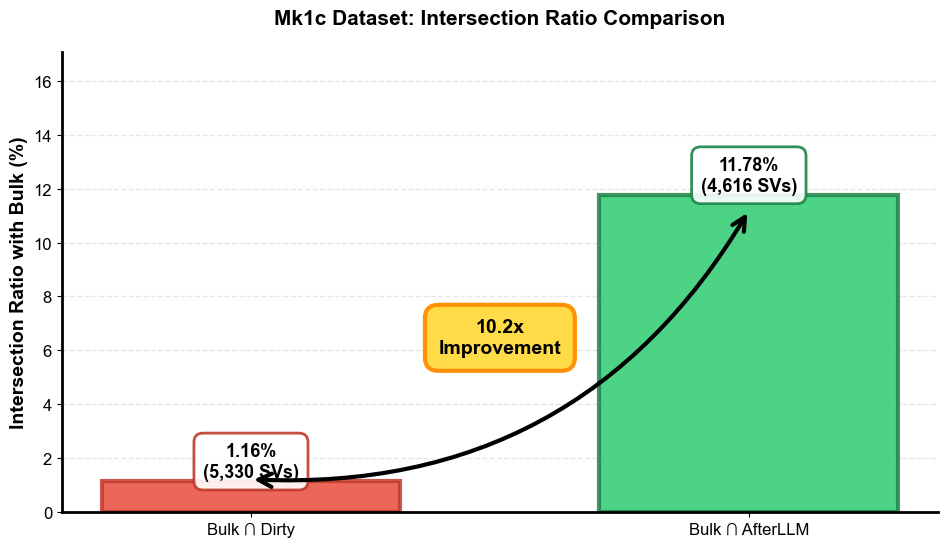

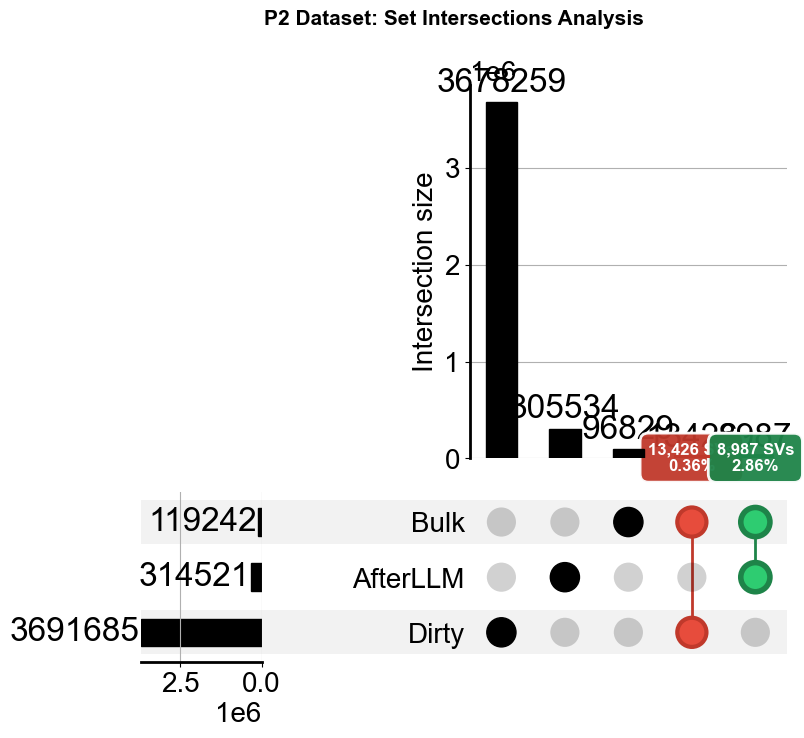

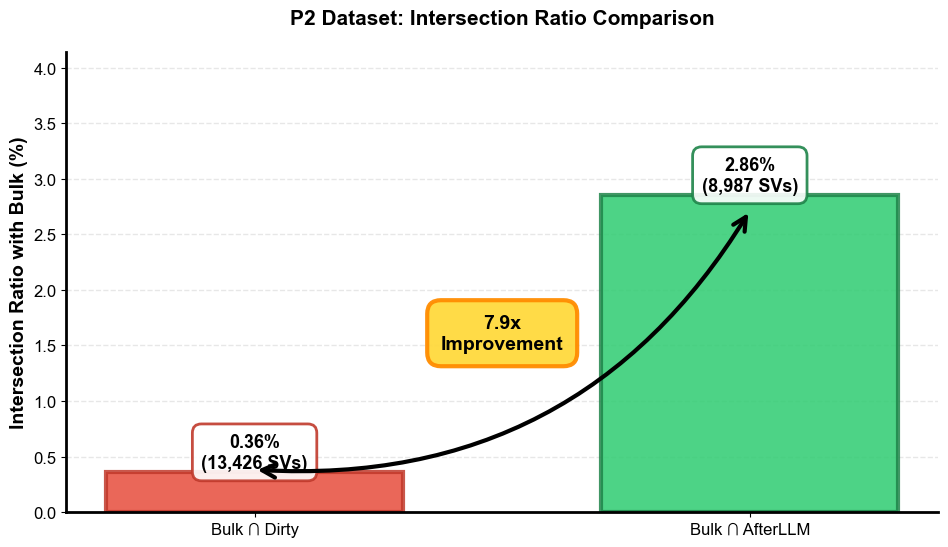

In [38]:
import matplotlib.pyplot as plt
from upsetplot import UpSet
import pandas as pd
import numpy as np


def create_all_plots_separately(name, bulk, dirty, afterllm, bd_int, ba_int):
    """Generate both UpSet and bar chart for a dataset"""

    # Calculate ratios
    dirty_ratio = bd_int / dirty * 100
    afterllm_ratio = ba_int / afterllm * 100
    improvement = afterllm_ratio / dirty_ratio

    # ========== UPSET PLOT ==========
    fig_upset = plt.figure(figsize=(16, 6))

    data = pd.Series(
        [bulk - bd_int - ba_int, dirty - bd_int, afterllm - ba_int, bd_int, ba_int],
        index=pd.MultiIndex.from_tuples(
            [
                (True, False, False),
                (False, True, False),
                (False, False, True),
                (True, True, False),
                (True, False, True),
            ],
            names=["Bulk", "Dirty", "AfterLLM"],
        ),
    )

    upset = UpSet(data, show_counts=True, element_size=60, sort_by="cardinality")

    upset.style_subsets(
        present=["Bulk", "AfterLLM"],
        absent="Dirty",
        facecolor="#2ECC71",
        edgecolor="#1E8449",
        linewidth=4,
    )
    upset.style_subsets(
        present=["Bulk", "Dirty"],
        absent="AfterLLM",
        facecolor="#E74C3C",
        edgecolor="#C0392B",
        linewidth=3,
    )

    upset.plot(fig=fig_upset)

    # Add annotations
    for ax in fig_upset.axes:
        if ax.get_ylabel() == "Intersection size":
            for patch in ax.patches:
                height = patch.get_height()
                x_pos = patch.get_x() + patch.get_width() / 2

                if abs(height - bd_int) < 1:
                    ax.text(
                        x_pos,
                        height / 2,
                        f"{int(height):,} SVs\n{dirty_ratio:.2f}%",
                        ha="center",
                        va="center",
                        fontsize=12,
                        fontweight="bold",
                        color="white",
                        bbox=dict(
                            boxstyle="round,pad=0.5",
                            facecolor="#C0392B",
                            edgecolor="white",
                            alpha=0.95,
                            linewidth=2,
                        ),
                    )

                elif abs(height - ba_int) < 1:
                    ax.text(
                        x_pos,
                        height / 2,
                        f"{int(height):,} SVs\n{afterllm_ratio:.2f}%",
                        ha="center",
                        va="center",
                        fontsize=12,
                        fontweight="bold",
                        color="white",
                        bbox=dict(
                            boxstyle="round,pad=0.5",
                            facecolor="#1E8449",
                            edgecolor="white",
                            alpha=0.95,
                            linewidth=2,
                        ),
                    )

    plt.suptitle(
        f"{name} Dataset: Set Intersections Analysis",
        fontsize=15,
        fontweight="bold",
        y=0.98,
    )
    plt.tight_layout()

    # ========== BAR CHART ==========
    fig_bar, ax_bar = plt.subplots(figsize=(10, 6))

    categories = ["Bulk ∩ Dirty", "Bulk ∩ AfterLLM"]
    ratios = [dirty_ratio, afterllm_ratio]
    colors = ["#E74C3C", "#2ECC71"]
    edge_colors = ["#C0392B", "#1E8449"]

    bars = ax_bar.bar(
        categories,
        ratios,
        color=colors,
        edgecolor=edge_colors,
        linewidth=3,
        width=0.6,
        alpha=0.85,
    )

    ax_bar.set_ylabel(
        "Intersection Ratio with Bulk (%)", fontsize=14, fontweight="bold"
    )
    ax_bar.set_title(
        f"{name} Dataset: Intersection Ratio Comparison",
        fontsize=15,
        fontweight="bold",
        pad=20,
    )
    ax_bar.grid(axis="y", alpha=0.3, linestyle="--", linewidth=1)
    ax_bar.set_ylim(0, max(ratios) * 1.45)
    ax_bar.tick_params(axis="both", labelsize=12)
    ax_bar.set_axisbelow(True)

    # Value labels
    for i, (bar, ratio, count) in enumerate(zip(bars, ratios, [bd_int, ba_int])):
        height = bar.get_height()
        ax_bar.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f"{ratio:.2f}%\n({count:,} SVs)",
            ha="center",
            va="bottom",
            fontsize=13,
            fontweight="bold",
            bbox=dict(
                boxstyle="round,pad=0.5",
                facecolor="white",
                edgecolor=edge_colors[i],
                alpha=0.9,
                linewidth=2,
            ),
        )

    # Improvement annotation
    y_mid = (dirty_ratio + afterllm_ratio) / 2
    ax_bar.annotate(
        "",
        xy=(1, afterllm_ratio * 0.95),
        xytext=(0, dirty_ratio * 1.05),
        arrowprops=dict(
            arrowstyle="<->", color="black", lw=3, connectionstyle="arc3,rad=0.3"
        ),
    )

    ax_bar.text(
        0.5,
        y_mid,
        f"{improvement:.1f}x\nImprovement",
        ha="center",
        va="center",
        fontsize=14,
        fontweight="bold",
        bbox=dict(
            boxstyle="round,pad=0.7",
            facecolor="#FFD93D",
            edgecolor="#FF8C00",
            alpha=0.95,
            linewidth=3,
        ),
    )
    sns.despine()

    plt.tight_layout()

    return fig_upset, fig_bar


# ===== Generate All Plots =====
print("Generating Mk1c plots...")
fig_mk1c_upset, fig_mk1c_bar = create_all_plots_separately(
    "Mk1c", 26943, 460173, 39195, 5330, 4616
)
# plt.show()

print("Generating P2 plots...")
fig_p2_upset, fig_p2_bar = create_all_plots_separately(
    "P2", 119242, 3691685, 314521, 13426, 8987
)
# plt.show()

# # ===== Save All Plots =====
fig_mk1c_upset.savefig("mk1c_intersection_upset.pdf", dpi=300, bbox_inches="tight")
fig_mk1c_bar.savefig("mk1c_intersection_bar.pdf", dpi=300, bbox_inches="tight")
fig_p2_upset.savefig("p2_intersection_upset.pdf", dpi=300, bbox_inches="tight")
fig_p2_bar.savefig("p2_intersection_bar.pdf", dpi=300, bbox_inches="tight")


Mk1c - Number of axes: 4
Axis 0: xlabel='', ylabel=''
Axis 1: xlabel='', ylabel=''
Axis 2: xlabel='', ylabel=''
Axis 3: xlabel='', ylabel='Intersection size'
Found intersection axis at index 3


/Users/ylk4626/miniforge3/envs/chimera/lib/python3.10/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/Users/ylk4626/miniforge3/envs/chimera/lib/python3.10/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we ar

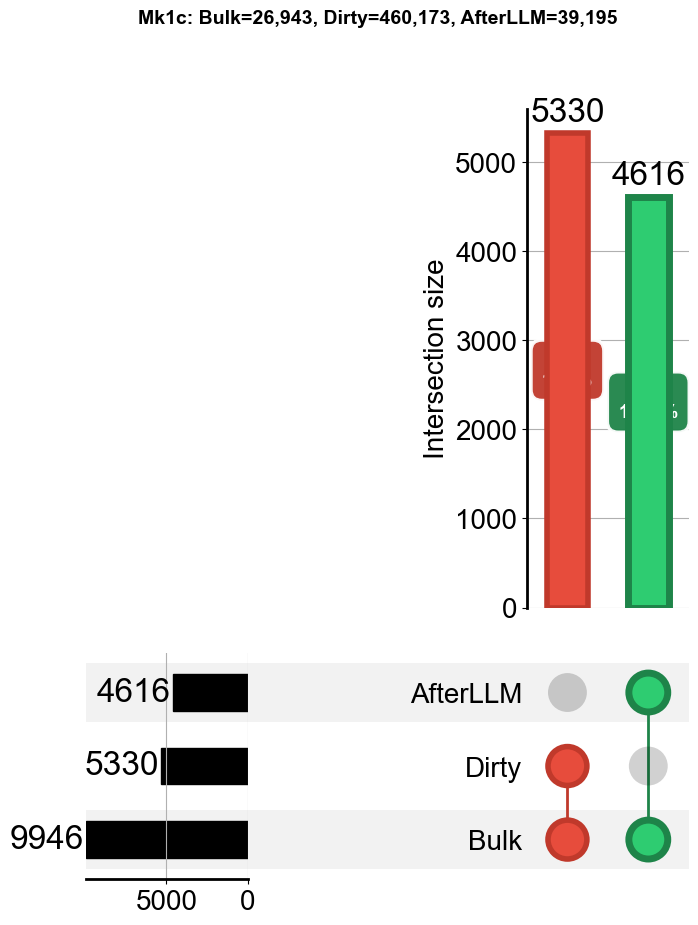

/Users/ylk4626/miniforge3/envs/chimera/lib/python3.10/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/Users/ylk4626/miniforge3/envs/chimera/lib/python3.10/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we ar


P2 - Number of axes: 4
Axis 0: xlabel='', ylabel=''
Axis 1: xlabel='', ylabel=''
Axis 2: xlabel='', ylabel=''
Axis 3: xlabel='', ylabel='Intersection size'
Found intersection axis at index 3


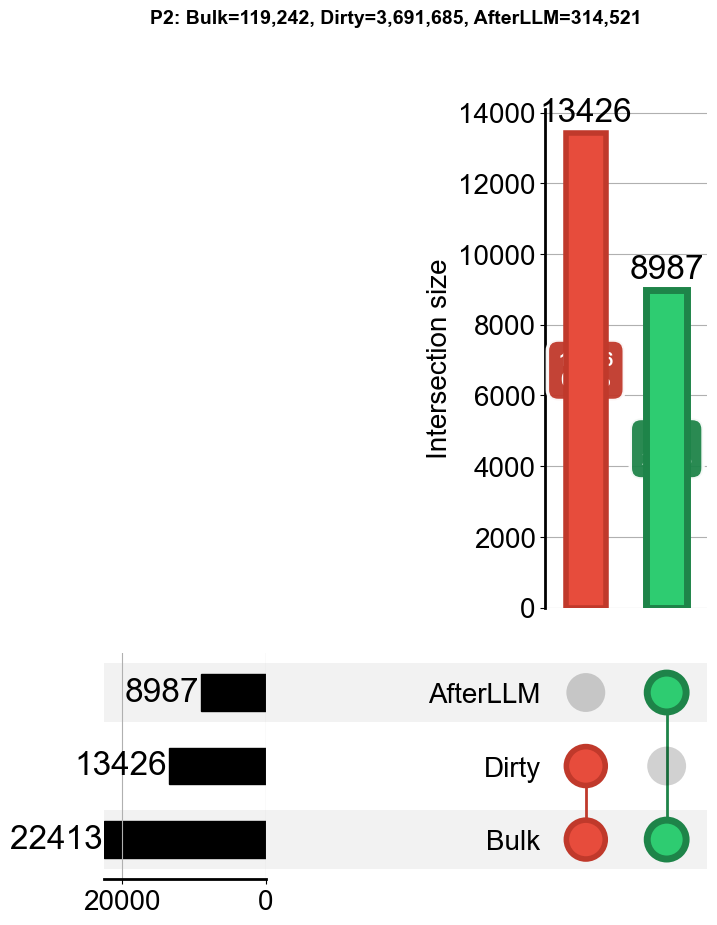

In [43]:
import matplotlib.pyplot as plt
from upsetplot import UpSet
import pandas as pd


def create_upset_with_manual_totals(
    name, bulk, dirty, afterllm, bd_int, ba_int, width=16, height=6
):
    """Create UpSet plot and manually add total annotations"""

    fig = plt.figure(figsize=(width, height))

    # Create data
    data = pd.Series(
        [bd_int, ba_int],
        index=pd.MultiIndex.from_tuples(
            [
                (True, True, False),  # Bulk ∩ Dirty
                (True, False, True),  # Bulk ∩ AfterLLM
            ],
            names=["Bulk", "Dirty", "AfterLLM"],
        ),
    )

    # Create UpSet plot
    upset = UpSet(data, show_counts=True, element_size=80, sort_by="cardinality")

    upset.style_subsets(
        present=["Bulk", "AfterLLM"],
        absent="Dirty",
        facecolor="#2ECC71",
        edgecolor="#1E8449",
        linewidth=5,
    )
    upset.style_subsets(
        present=["Bulk", "Dirty"],
        absent="AfterLLM",
        facecolor="#E74C3C",
        edgecolor="#C0392B",
        linewidth=4,
    )

    upset.plot(fig=fig)

    # Calculate ratios
    dirty_ratio = bd_int / dirty * 100
    afterllm_ratio = ba_int / afterllm * 100
    improvement = afterllm_ratio / dirty_ratio

    # Debugging: print all axes info
    print(f"\n{name} - Number of axes:", len(fig.axes))
    for i, ax in enumerate(fig.axes):
        print(f"Axis {i}: xlabel='{ax.get_xlabel()}', ylabel='{ax.get_ylabel()}'")

    # Try to find and annotate axes
    for i, ax in enumerate(fig.axes):
        ylabel = ax.get_ylabel() if hasattr(ax, "get_ylabel") else ""
        xlabel = ax.get_xlabel() if hasattr(ax, "get_xlabel") else ""

        # Intersection bars (usually has ylabel 'Intersection size')
        if "intersection" in ylabel.lower():
            print(f"Found intersection axis at index {i}")
            patches = ax.patches

            for patch in patches:
                height = patch.get_height()
                x_pos = patch.get_x() + patch.get_width() / 2

                if abs(height - bd_int) < 1:
                    ax.text(
                        x_pos,
                        height / 2,
                        f"{int(height):,}\n{dirty_ratio:.2f}%",
                        ha="center",
                        va="center",
                        fontsize=13,
                        fontweight="bold",
                        color="white",
                        bbox=dict(
                            boxstyle="round,pad=0.6",
                            facecolor="#C0392B",
                            edgecolor="white",
                            alpha=0.95,
                            linewidth=2.5,
                        ),
                    )

                elif abs(height - ba_int) < 1:
                    ax.text(
                        x_pos,
                        height / 2,
                        f"{int(height):,}\n{afterllm_ratio:.2f}%",
                        ha="center",
                        va="center",
                        fontsize=13,
                        fontweight="bold",
                        color="white",
                        bbox=dict(
                            boxstyle="round,pad=0.6",
                            facecolor="#1E8449",
                            edgecolor="white",
                            alpha=0.95,
                            linewidth=2.5,
                        ),
                    )

        # Set size bars (horizontal bars) - try multiple conditions
        if "size" in xlabel.lower() or (
            len(ax.patches) == 3 and ax.get_xlim()[1] > 100
        ):
            print(f"Found set size axis at index {i}")
            patches = ax.patches
            print(f"  Number of patches: {len(patches)}")

            totals = [bulk, dirty, afterllm]
            set_names = ["Bulk", "Dirty", "AfterLLM"]

            for j, patch in enumerate(patches):
                if j < len(totals):
                    width_val = patch.get_width()
                    y_pos = patch.get_y() + patch.get_height() / 2

                    print(f"  Patch {j}: width={width_val}, y_pos={y_pos}")

                    # Try placing text outside the bar
                    ax.text(
                        width_val * 1.05,
                        y_pos,
                        f"{totals[j]:,}",
                        ha="left",
                        va="center",
                        fontsize=12,
                        fontweight="bold",
                        color="#2C3E50",
                        bbox=dict(
                            boxstyle="round,pad=0.3",
                            facecolor="white",
                            edgecolor="gray",
                            alpha=0.8,
                        ),
                    )

    plt.suptitle(
        f"{name}: Bulk={bulk:,}, Dirty={dirty:,}, AfterLLM={afterllm:,}",
        fontsize=14,
        fontweight="bold",
        y=0.98,
    )

    plt.tight_layout()
    return fig


# Create plots with debugging
fig_mk1c = create_upset_with_manual_totals("Mk1c", 26943, 460173, 39195, 5330, 4616)
plt.show()

fig_p2 = create_upset_with_manual_totals("P2", 119242, 3691685, 314521, 13426, 8987)
plt.show()
